In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Convección no lineal: ecuación de Burgers invísida

El siguiente paso para tratar las ecuaciones de Navier-Stokes es la ecuación invísida de Buergers ya que presenta un comportamiento no lineal en un fenómeno de transporte.

La ecuación con la que trataremos es la siguiente

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x}=0$$

Discretizando la ecuación obtenemos

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_{i}^n-u_{i-1}^n}{\Delta x}=0$$

De donde

$$u_i^{n+1}=u_i^n - u_i^n \frac{\Delta t}{\Delta x} \left(u_{i}^n-u_{i-1}^n\right)$$

In [2]:
#Se importan las librerias necesarias
from numpy import *
from matplotlib.pyplot import *
from matplotlib import animation
from JSAnimation import IPython_display
%matplotlib inline

In [3]:
def avance_en_tiempo(u0, nt, nx, dt, dx, flag=False):
    u = u0
    if flag: hist=[]
    for n in range(nt):
        un = u.copy()
        if flag: hist.append(un)
        for i in range(1,nx):
            u[i] = un[i]-un[i]*(dt/dx)*(un[i]-un[i-1]) 
            
    if flag:
        return hist
    else:
        return u

A continuación ponemos las condiciones iniciales como una funcion escalon

$$
u_0(x) = 
    \begin{cases} 
    2 & : x \in (0.1,0.5)\\
    1 & : x \in (0,0.1)\bigcup(0.5,2)
  \end{cases}
$$

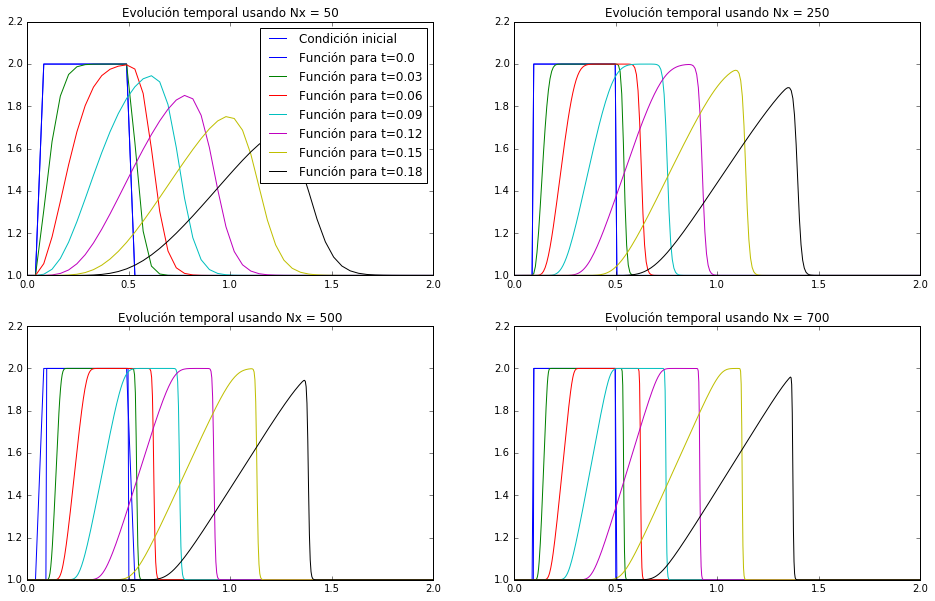

In [4]:
L = 2.          #Longitud de la malla
dt = 0.001       #Separacion temporal, Delta t
Nx1 = 50
Nx2 = 250
Nx3 = 500
Nx4 = 700

f, ((ax, bx), (cx, dx)) = subplots(2, 2, figsize=(16, 10))

#Condicion inicial primer grafico
dx1 = L/(Nx1-1.)
u01 = ones(Nx1)
u01[int(.1/dx1) : int(0.5/dx1+1.)] = 2

#Condicion inicial segundo grafico
dx2 = L/(Nx2-1.)
u02 = ones(Nx2)
u02[int(.1/dx2) : int(0.5/dx2+1.)] = 2

#Condicion inicial tercer grafico
dx3 = L/(Nx3-1.)
u03 = ones(Nx3)
u03[int(.1/dx3) : int(0.5/dx3+1.)] = 2

#Condicion inicial cuarto grafico
dx4 = L/(Nx4-1.)
u04 = ones(Nx4)
u04[int(.1/dx4) : int(0.5/dx4+1.)] = 2


ax.plot(linspace(0, L, Nx1), u01, label=u'Condición inicial', color='b')
bx.plot(linspace(0, L, Nx2), u02, label=u'Condición inicial', color='b')
cx.plot(linspace(0, L, Nx1), u01, label=u'Condición inicial', color='b')
dx.plot(linspace(0, L, Nx2), u02, label=u'Condición inicial', color='b')

for nt in range(0, 210, 30):
    ax.plot(linspace(0, L, Nx1), avance_en_tiempo(u01, nt, Nx1, dt, dx1),label=u'Función para t='+str(nt*dt))
    bx.plot(linspace(0, L, Nx2), avance_en_tiempo(u02, nt, Nx2, dt, dx2),label=u'Función para t='+str(nt*dt))
    cx.plot(linspace(0, L, Nx3), avance_en_tiempo(u03, nt, Nx3, dt, dx3),label=u'Función para t='+str(nt*dt))
    dx.plot(linspace(0, L, Nx4), avance_en_tiempo(u04, nt, Nx4, dt, dx4),label=u'Función para t='+str(nt*dt))
    
ax.set_title(u"Evolución temporal usando Nx = "+str(Nx1))
bx.set_title(u"Evolución temporal usando Nx = "+str(Nx2))
cx.set_title(u"Evolución temporal usando Nx = "+str(Nx3))
dx.set_title(u"Evolución temporal usando Nx = "+str(Nx4))
ax.legend()


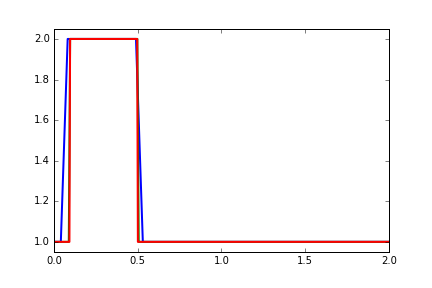
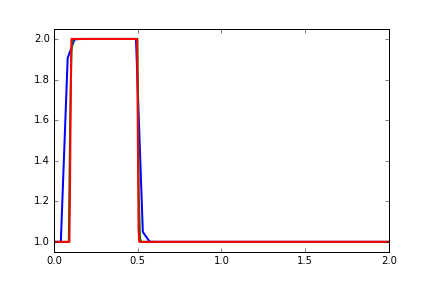
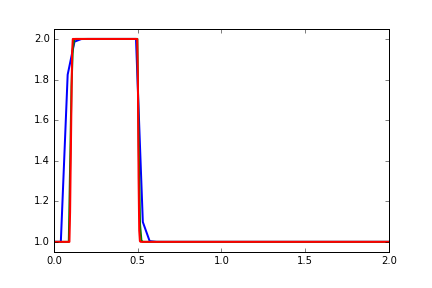
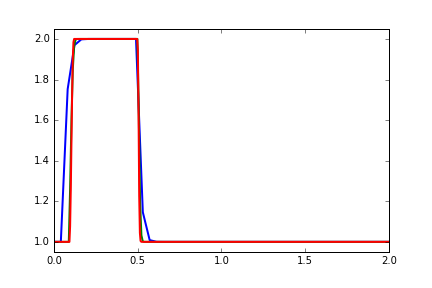
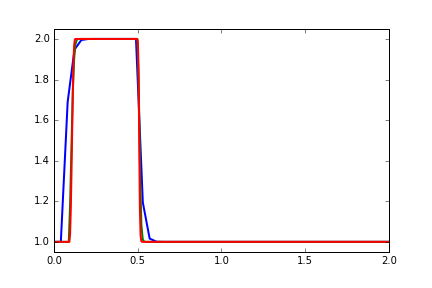
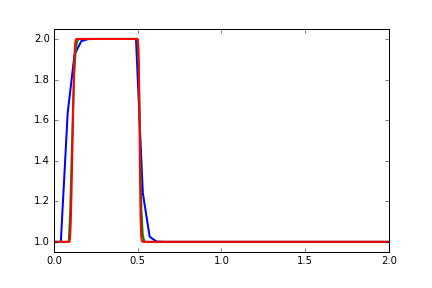
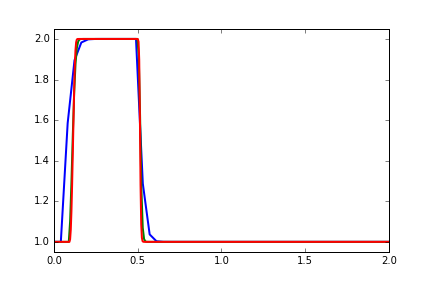
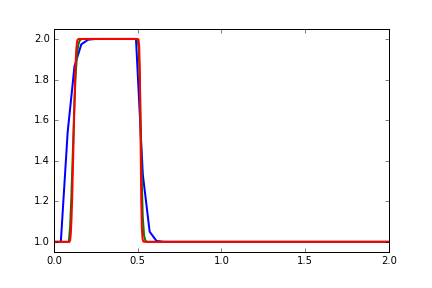
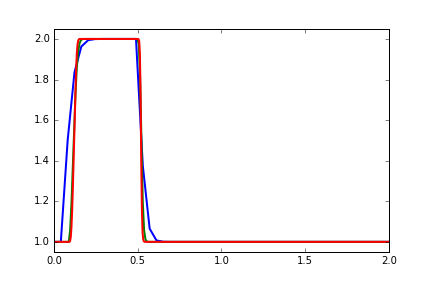
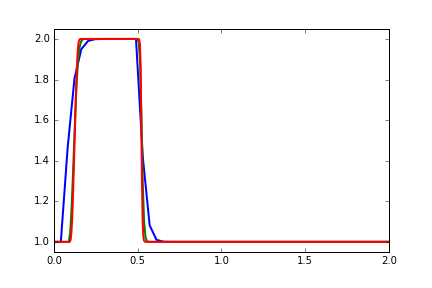
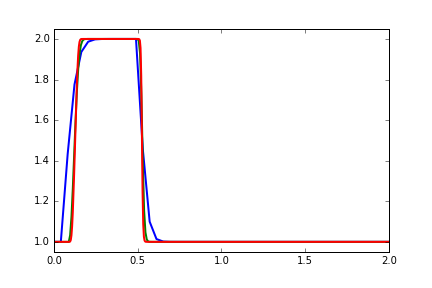
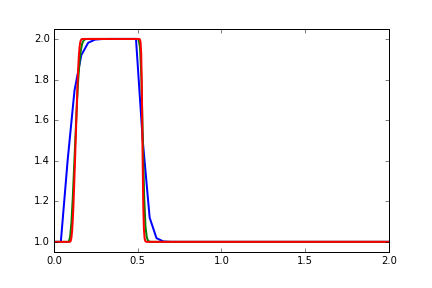
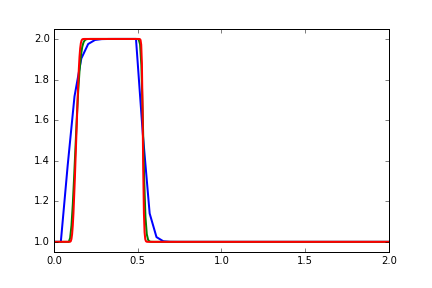
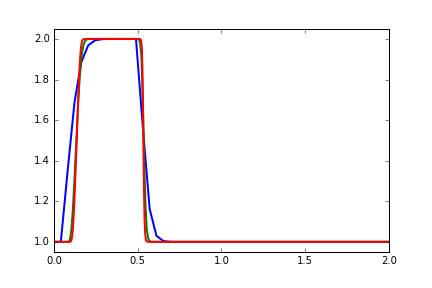
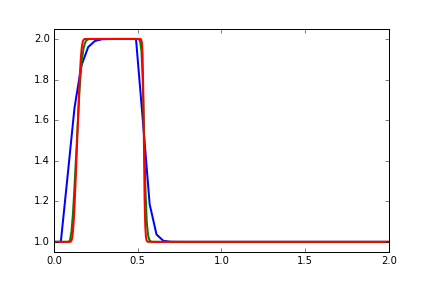
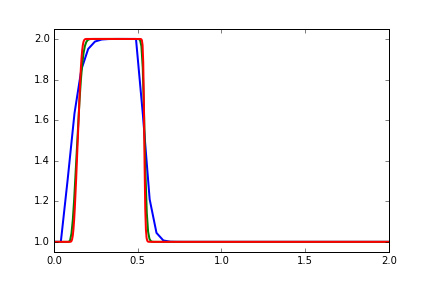
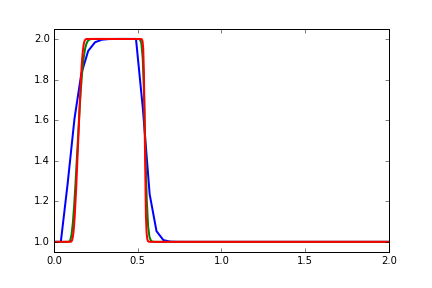
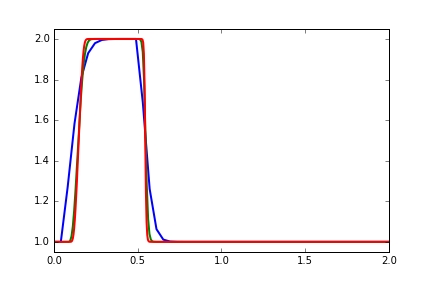
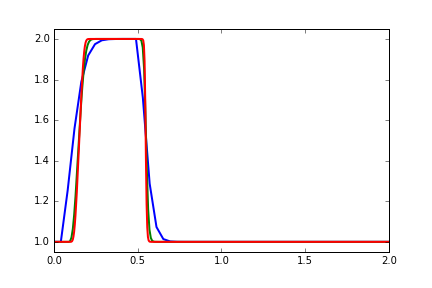
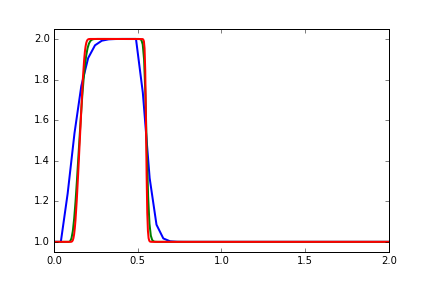
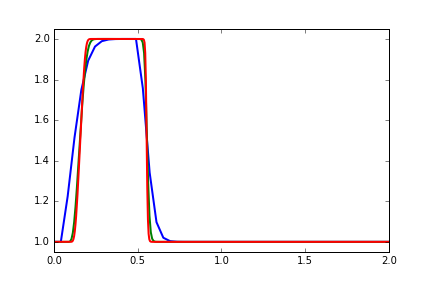
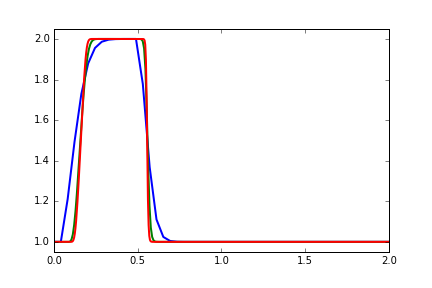
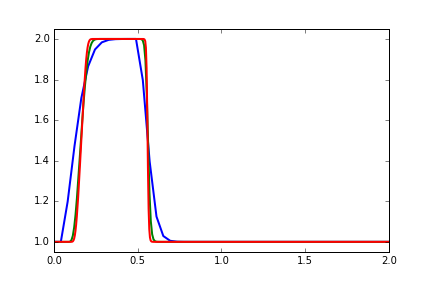
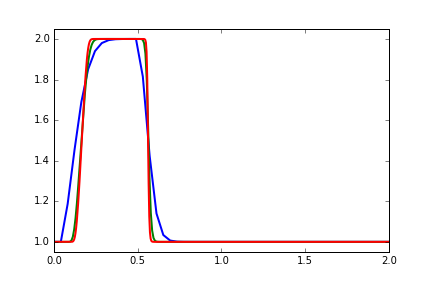
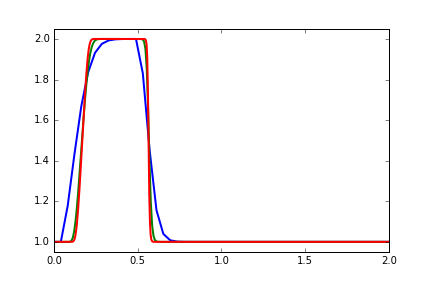
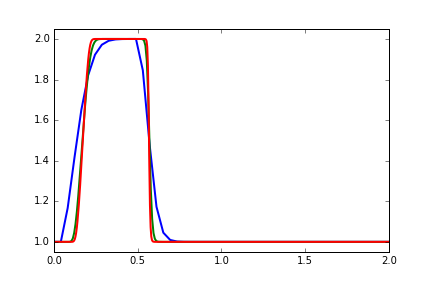
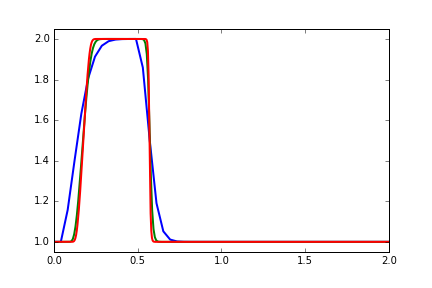
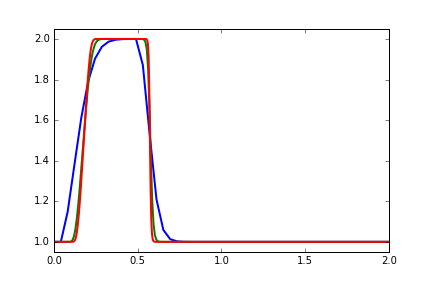
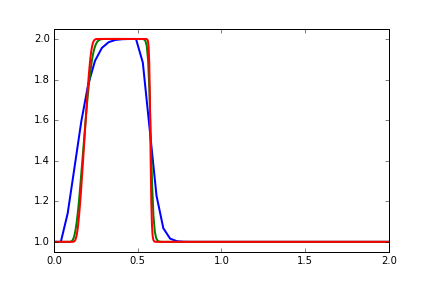
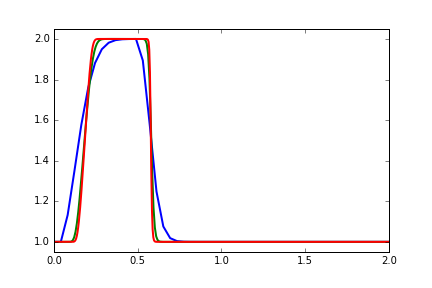
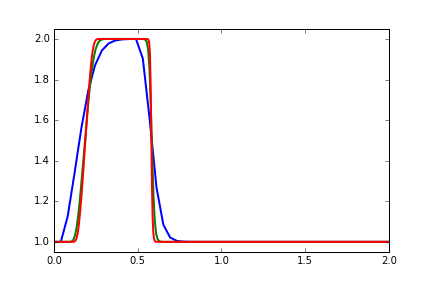
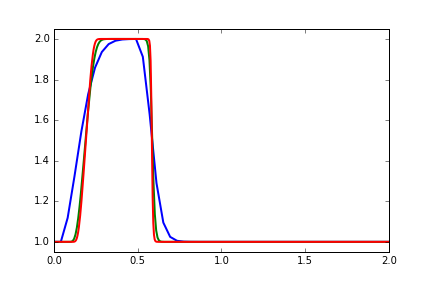
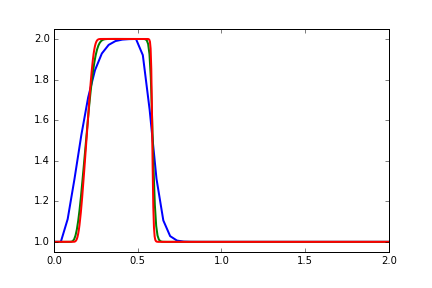
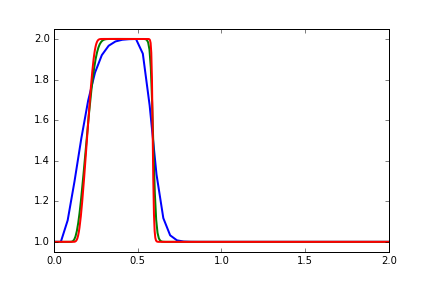
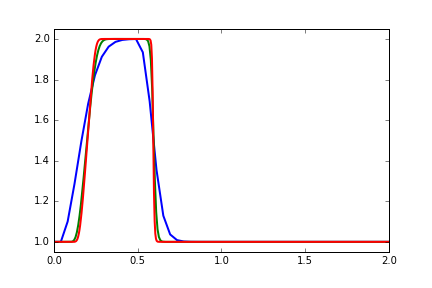
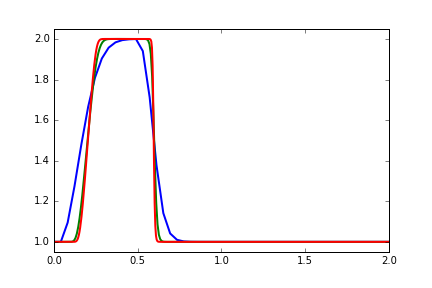
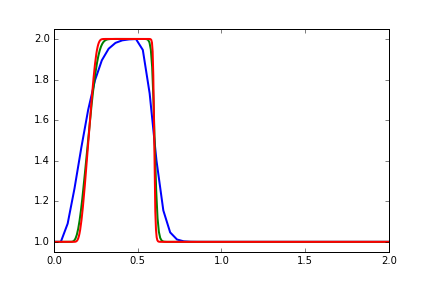
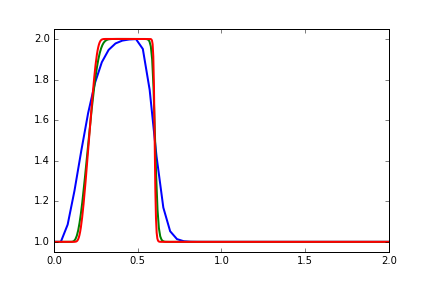
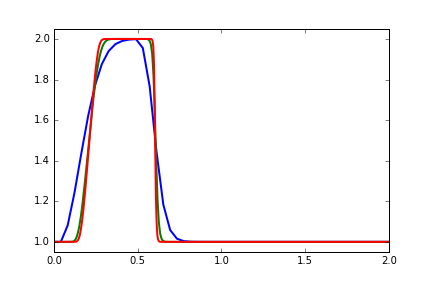
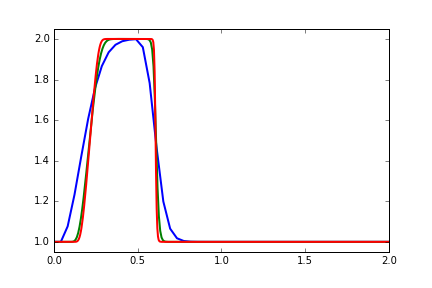
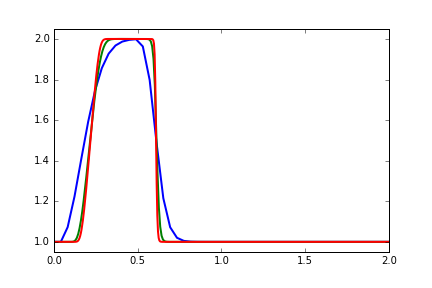
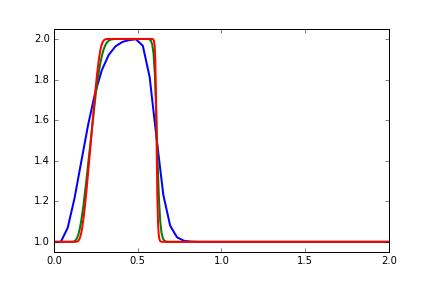
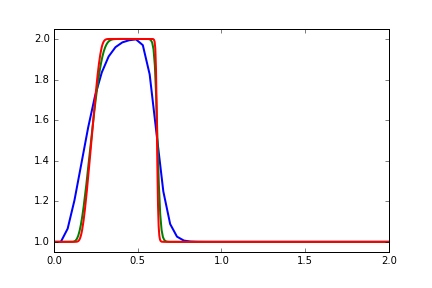
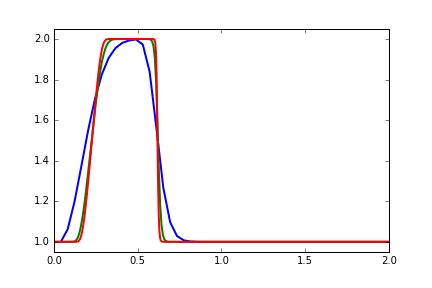
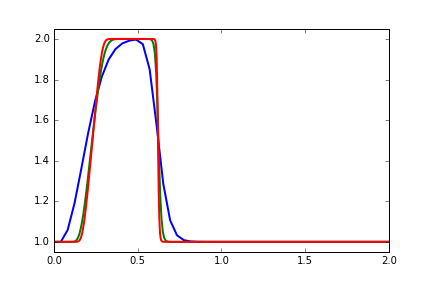
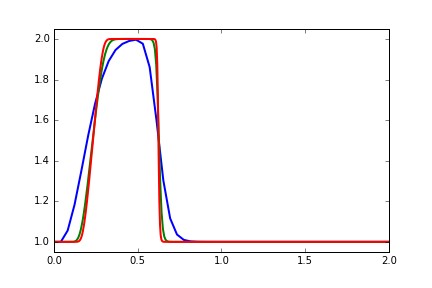
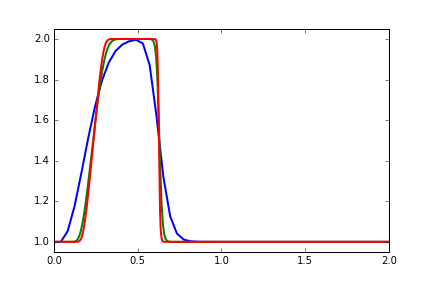
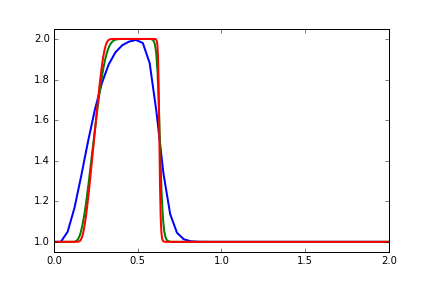
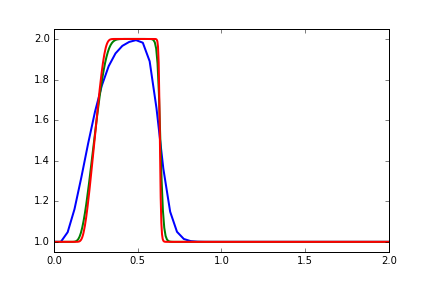
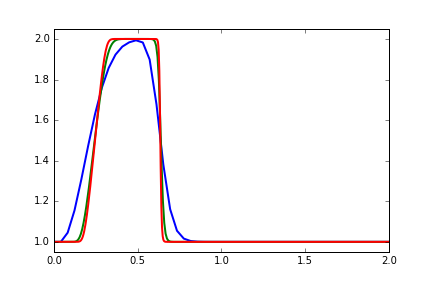
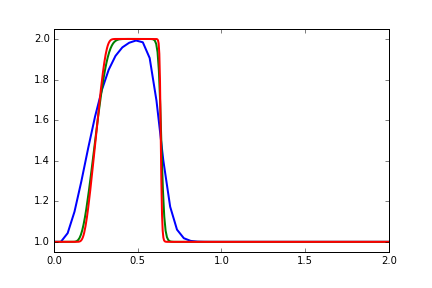
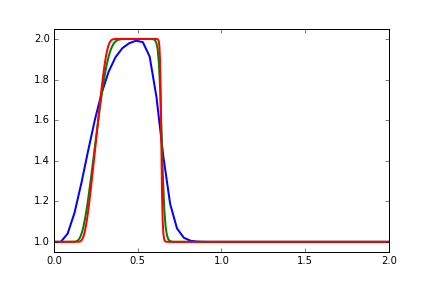
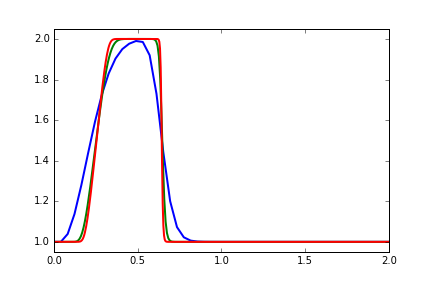
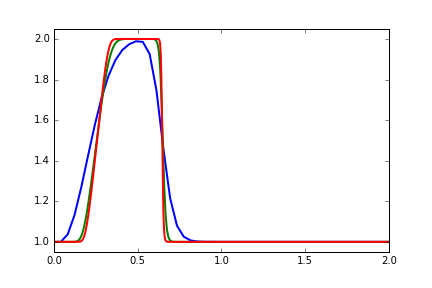
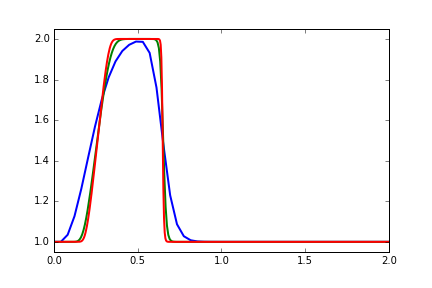
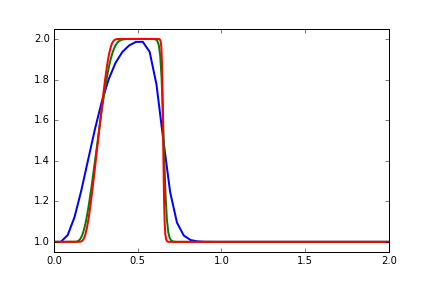
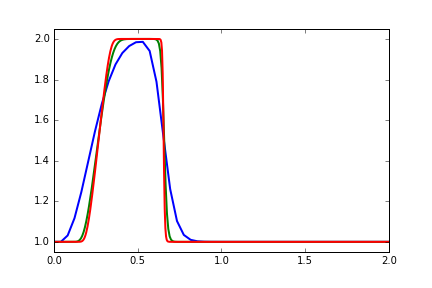
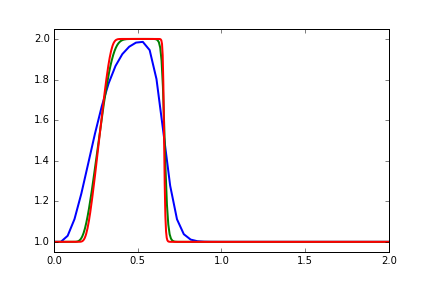
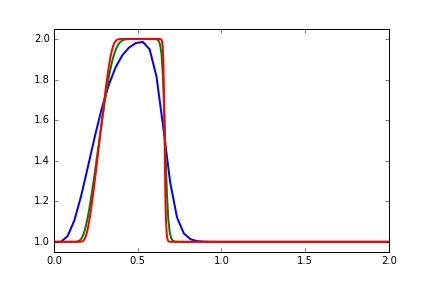
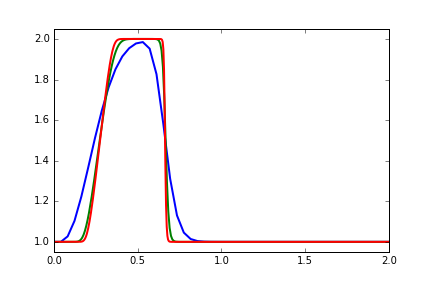
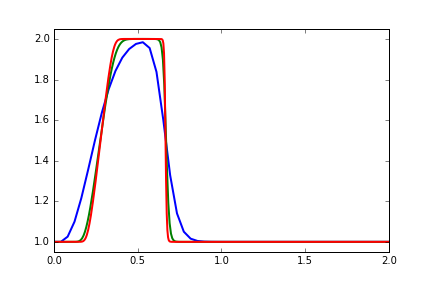
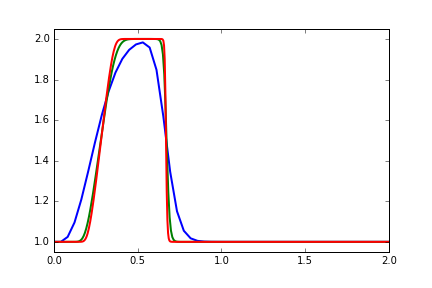
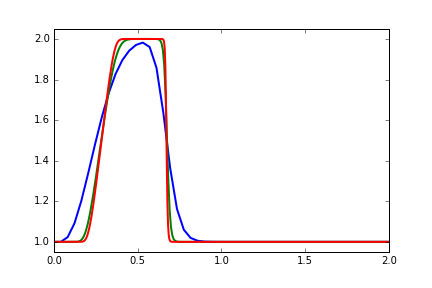
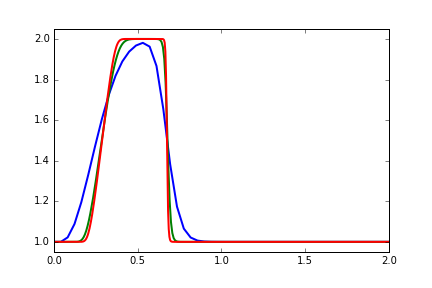
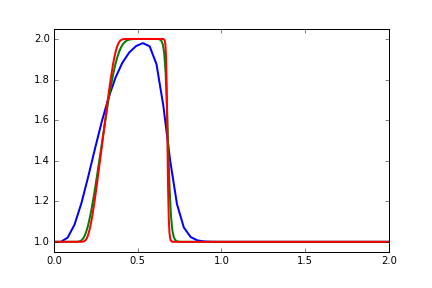
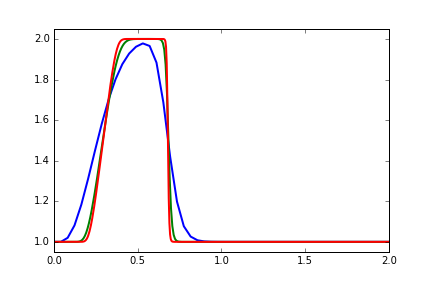
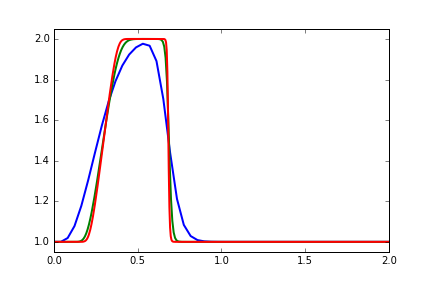
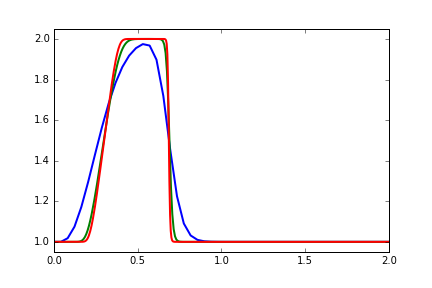
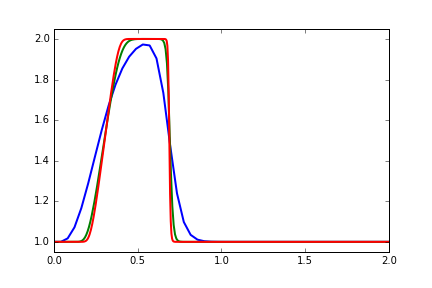
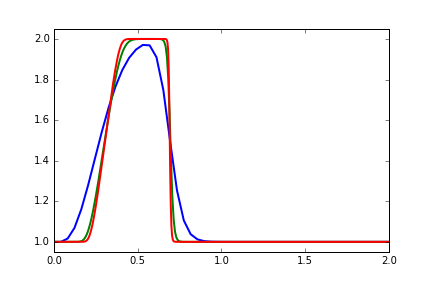
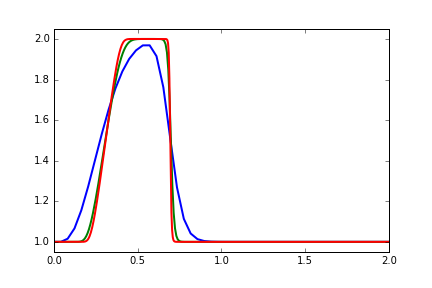
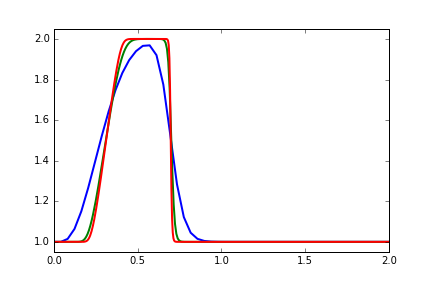
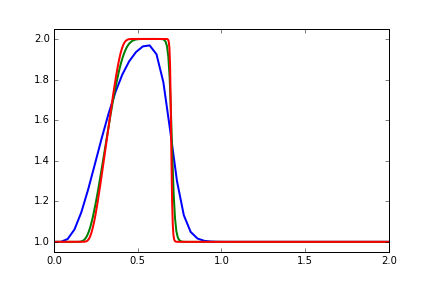
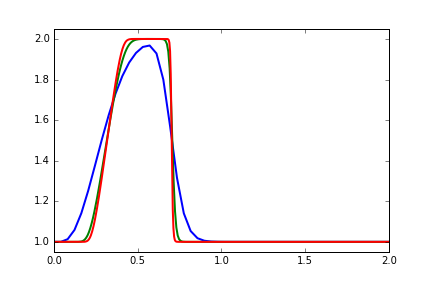
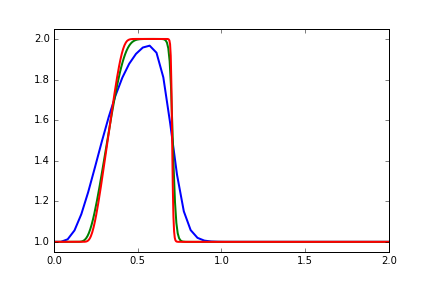
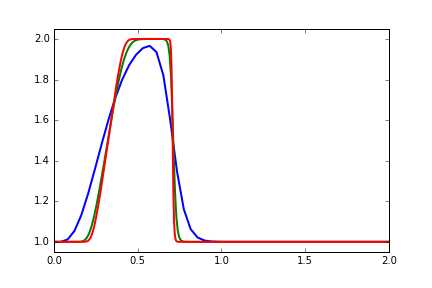
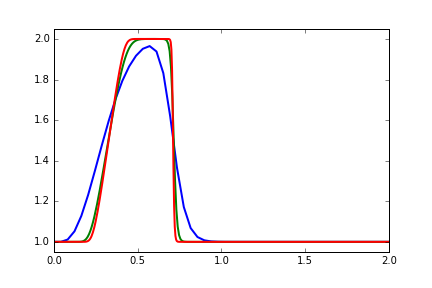
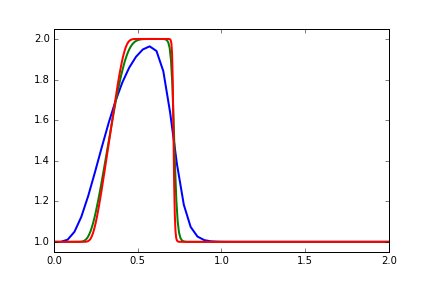
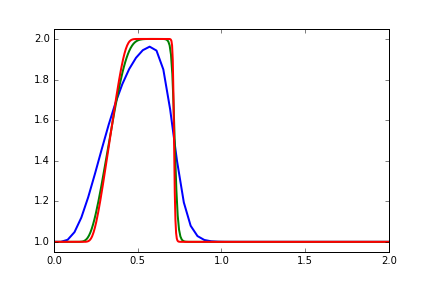
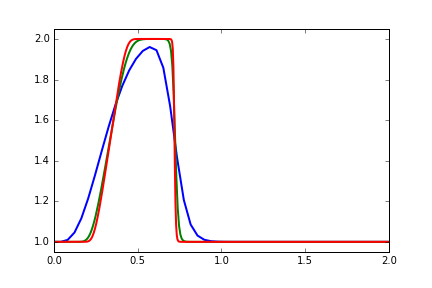
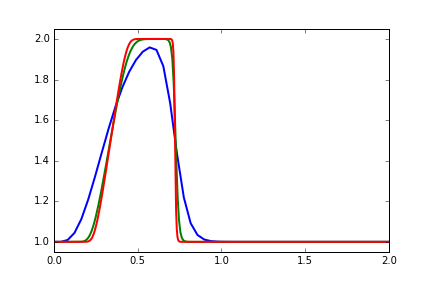
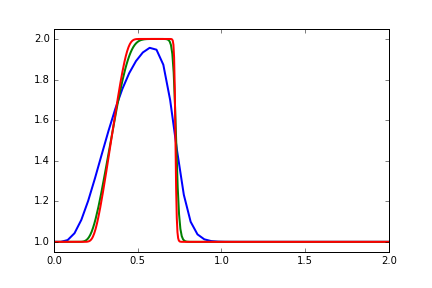
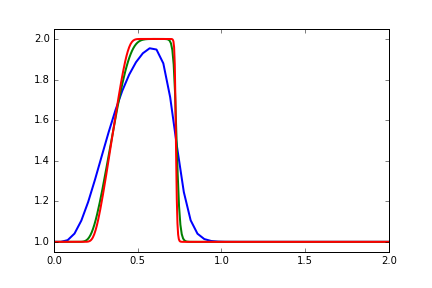
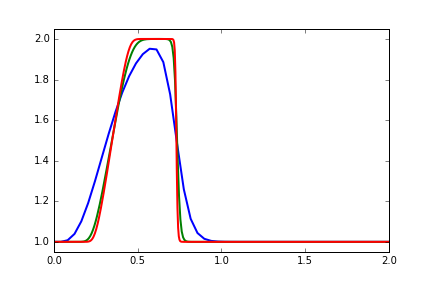
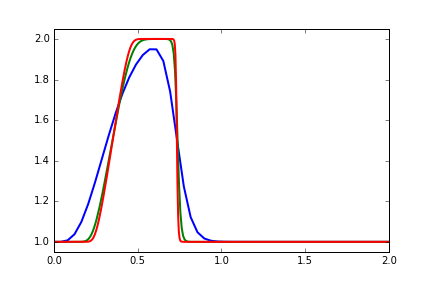
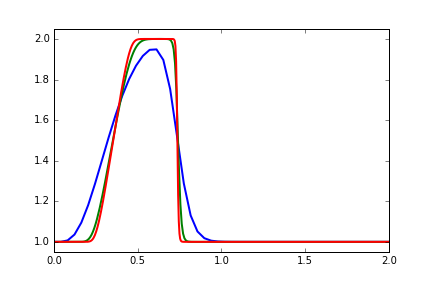
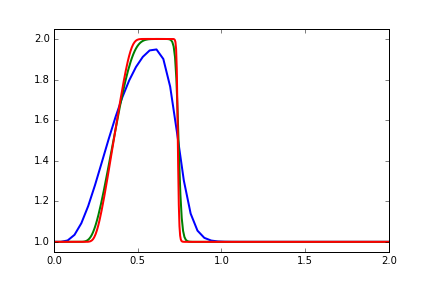
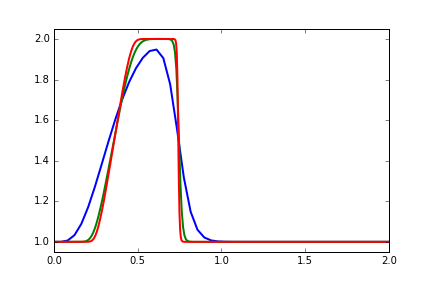
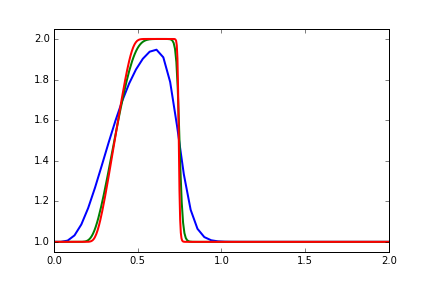
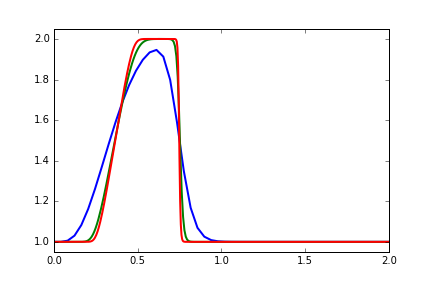
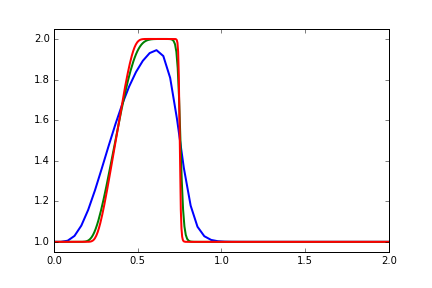
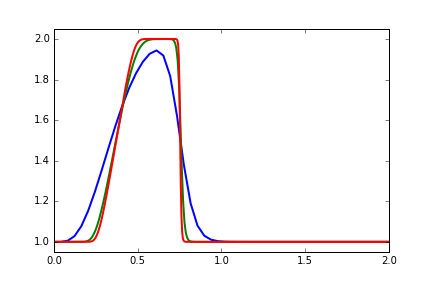
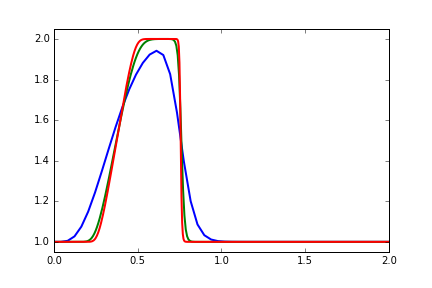
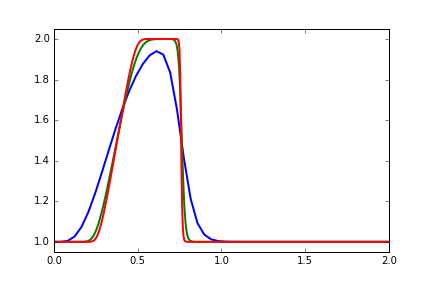
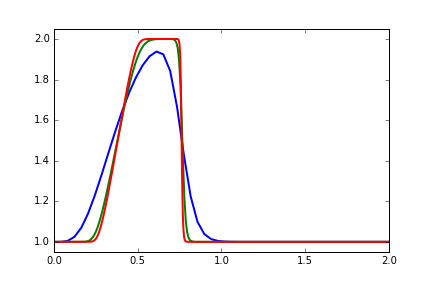
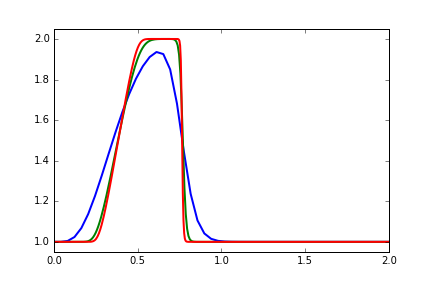
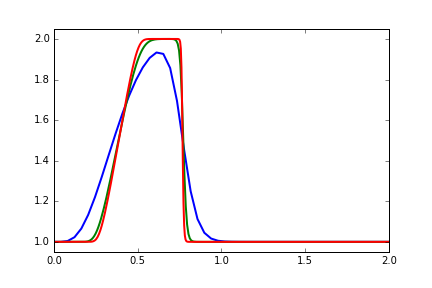
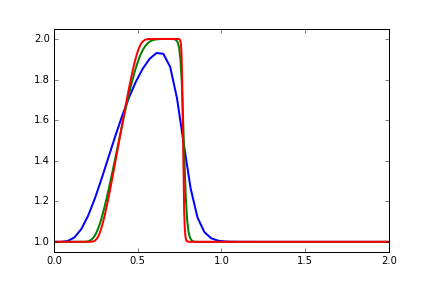
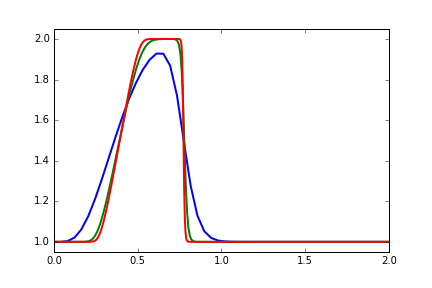
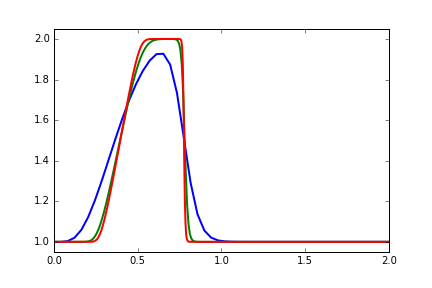
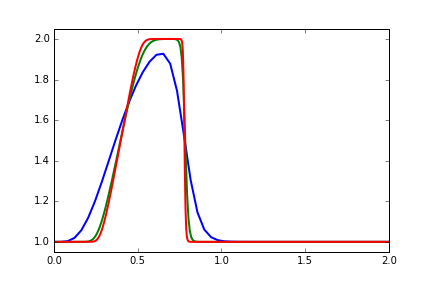
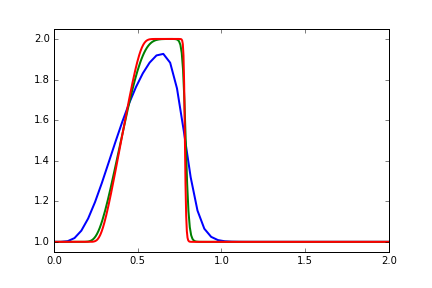
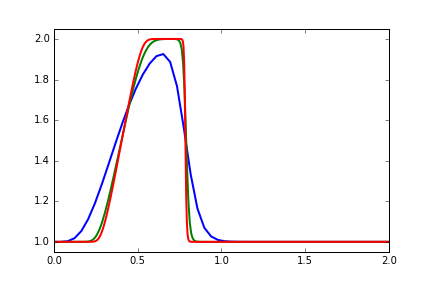
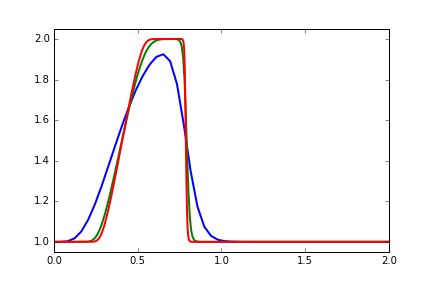
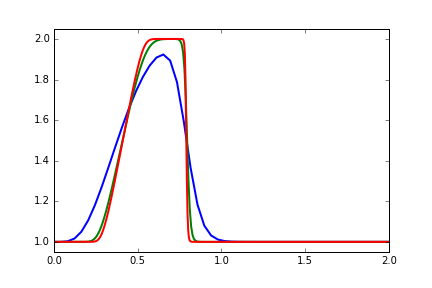
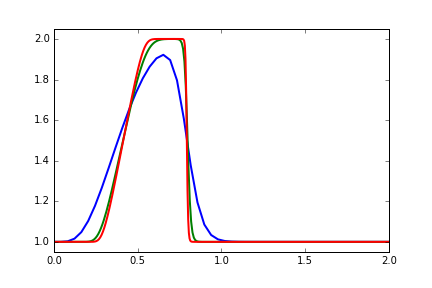
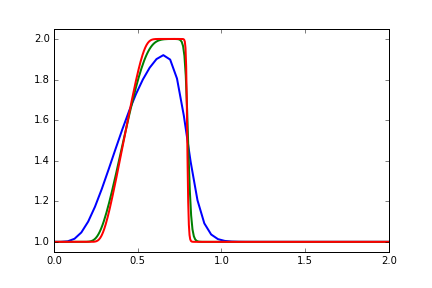
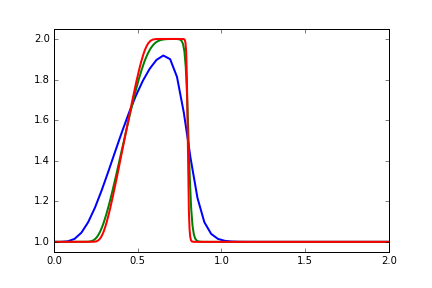
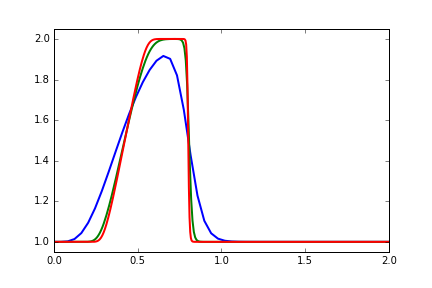
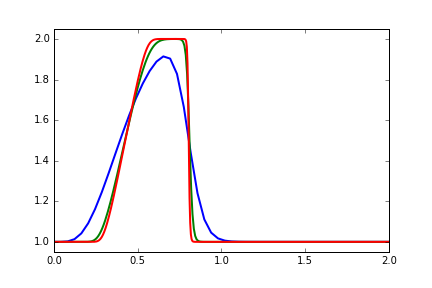
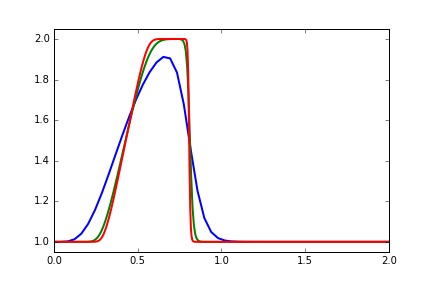
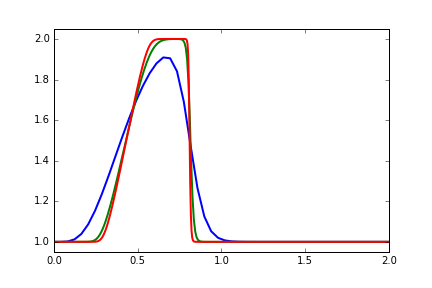
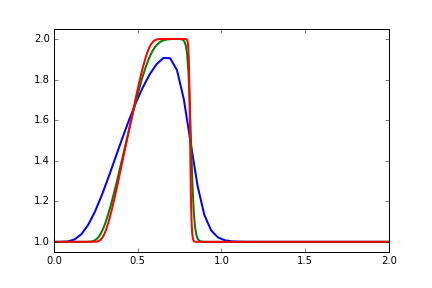
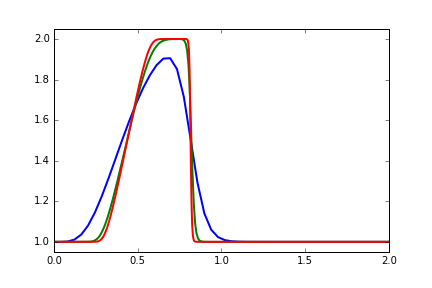
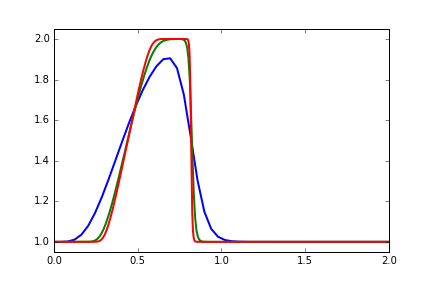
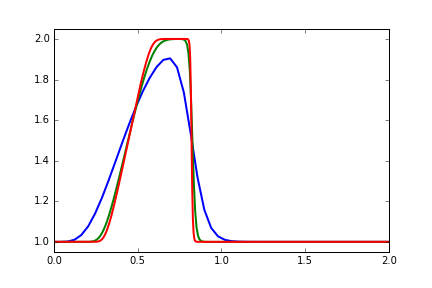
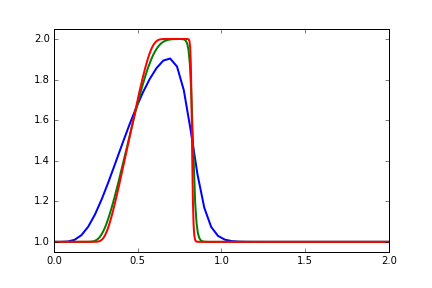
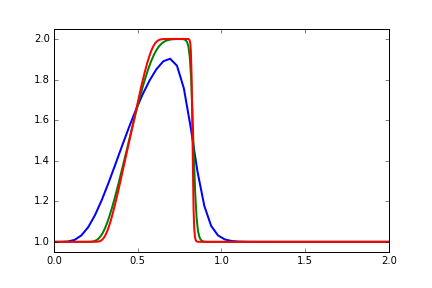
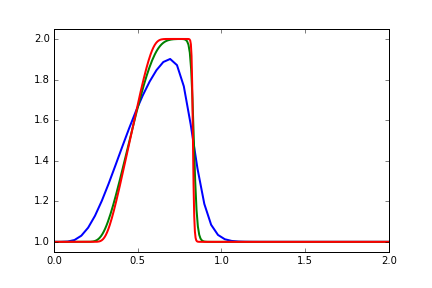
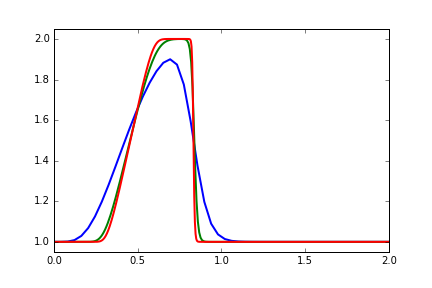
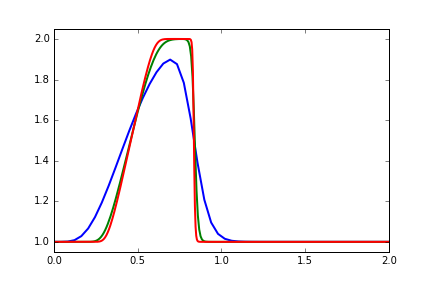
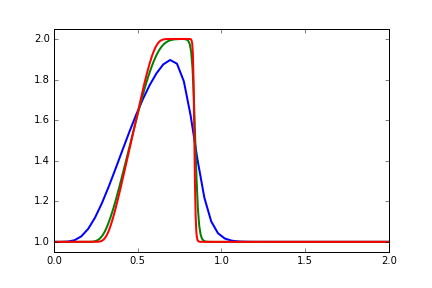
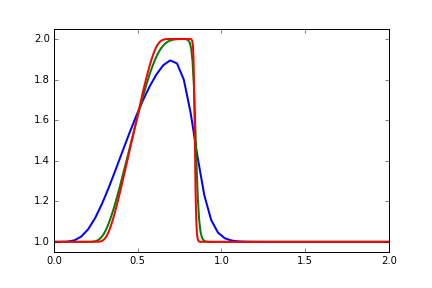
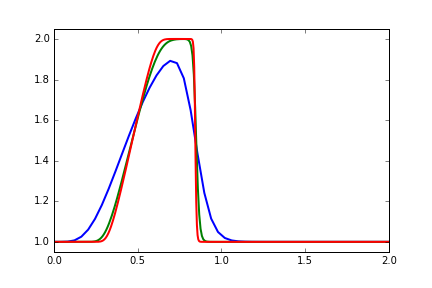
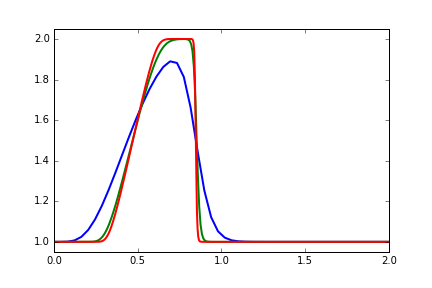
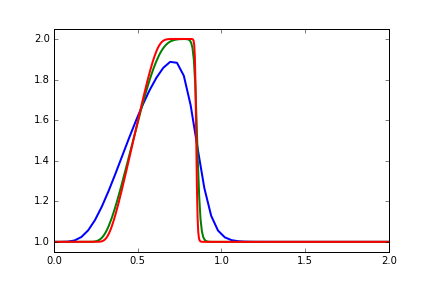
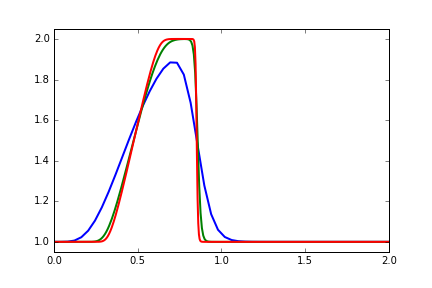
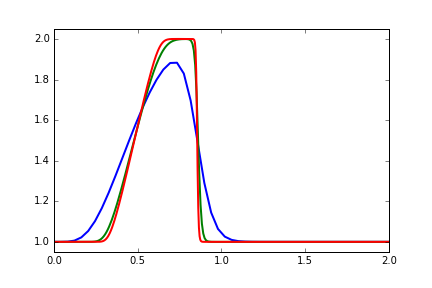
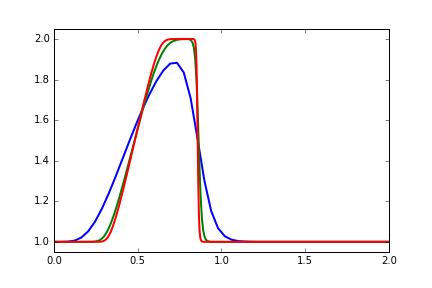
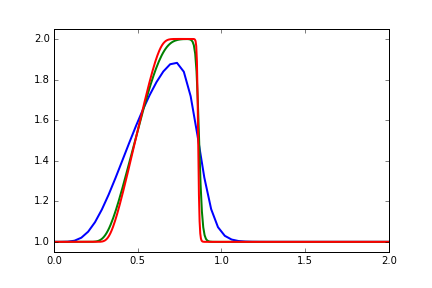
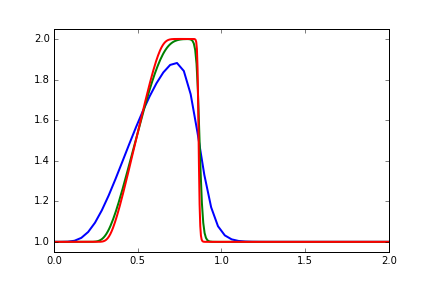
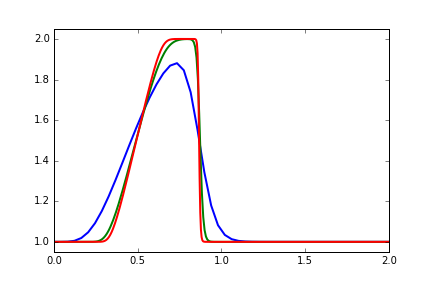
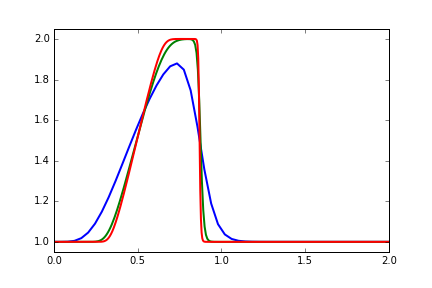
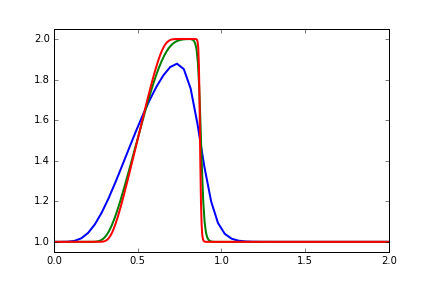
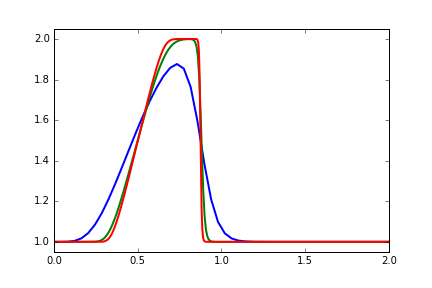
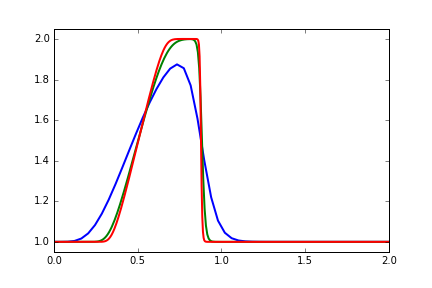
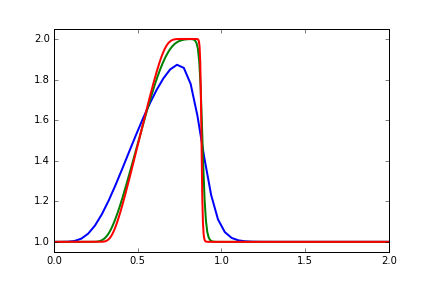
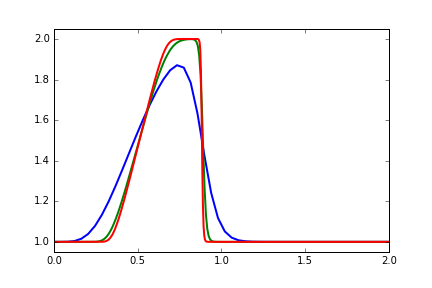
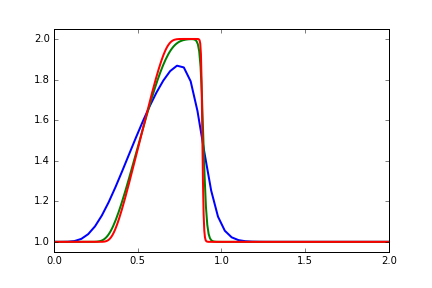
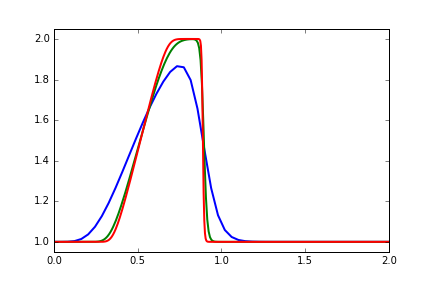
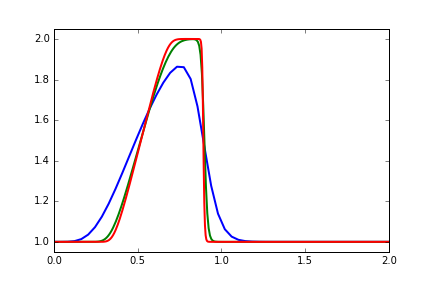
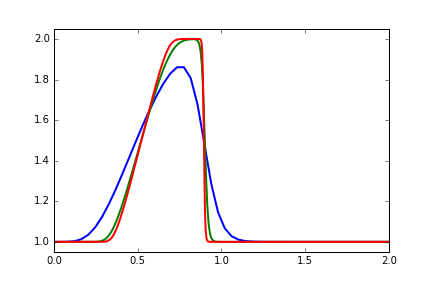
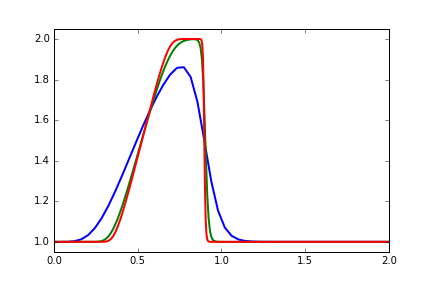
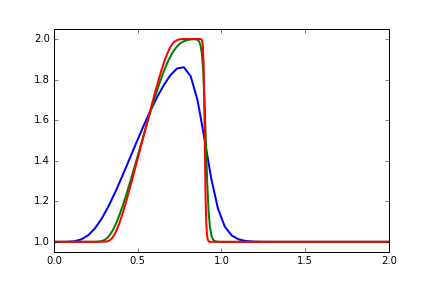
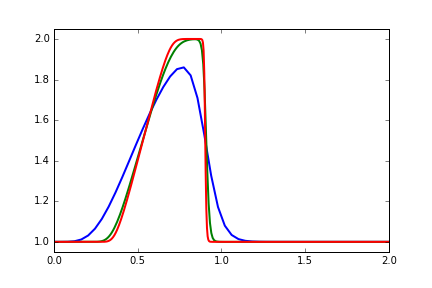
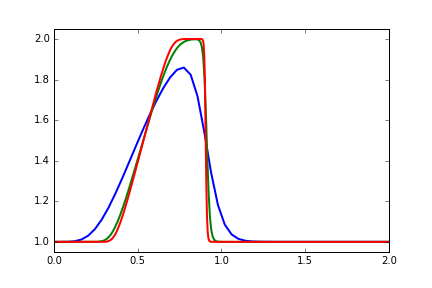
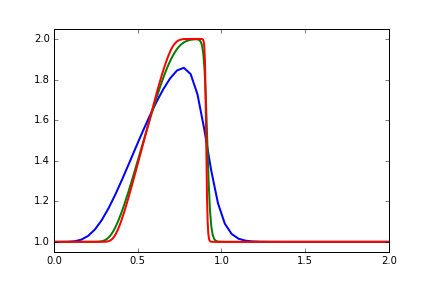
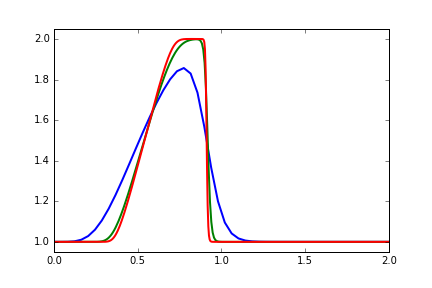
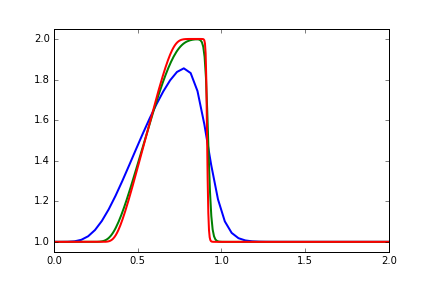
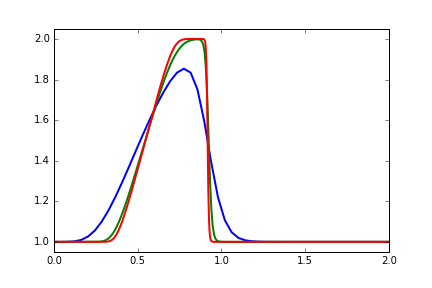
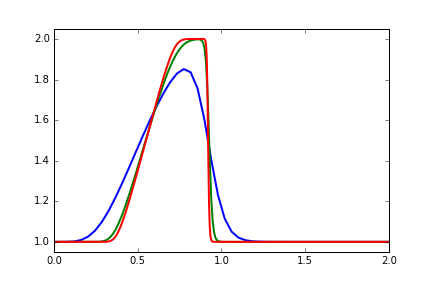
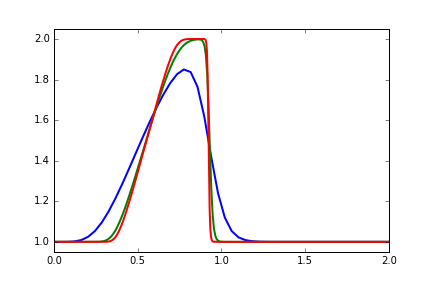
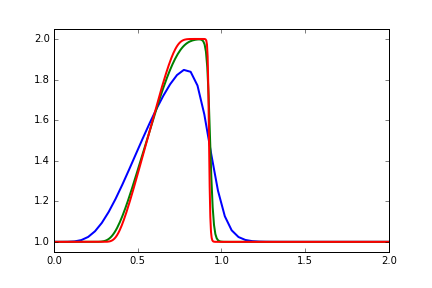
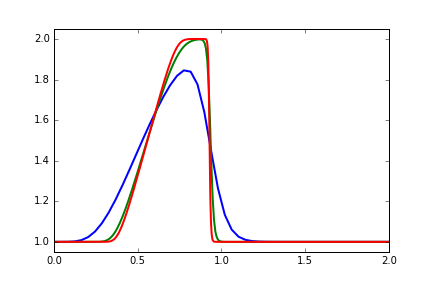
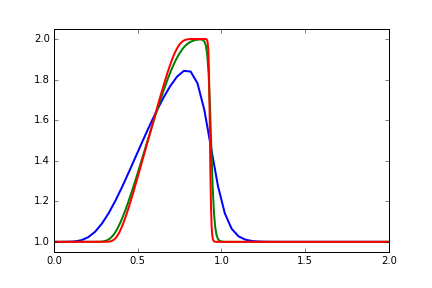
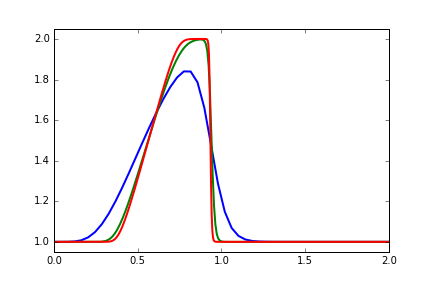
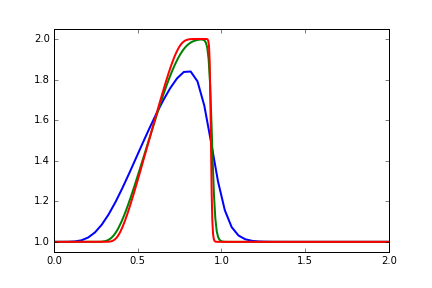
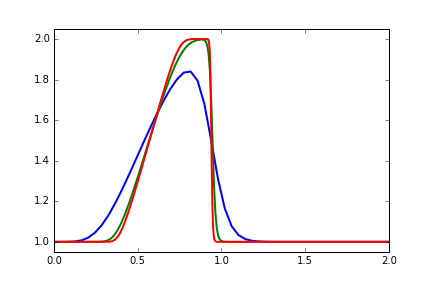
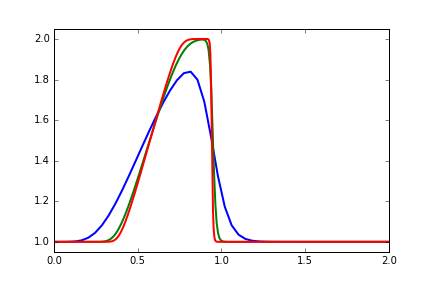
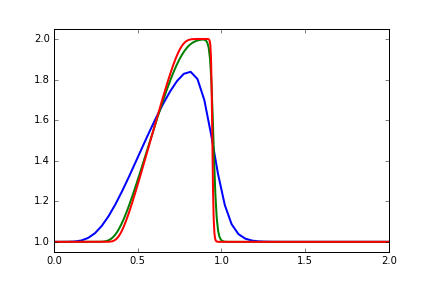
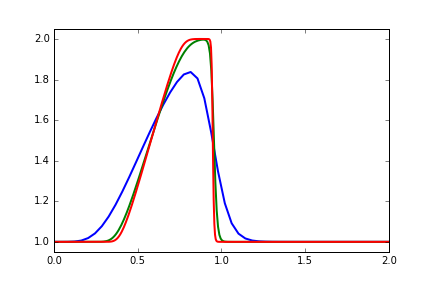
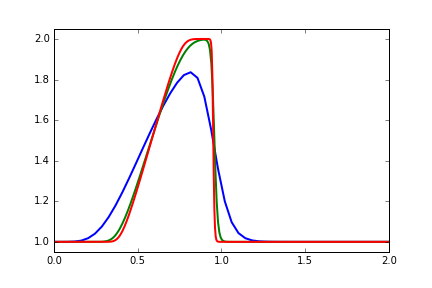
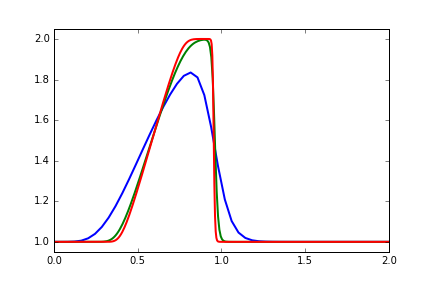
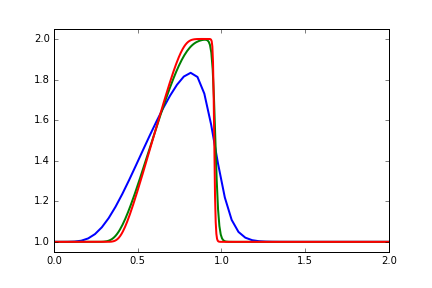
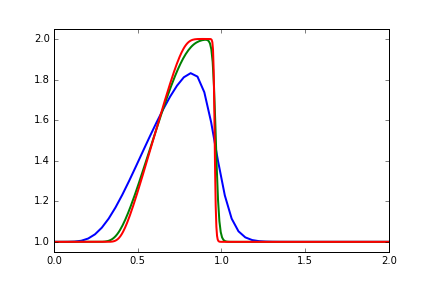
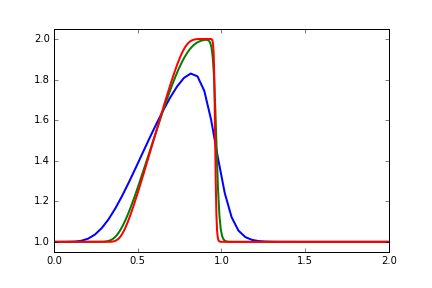
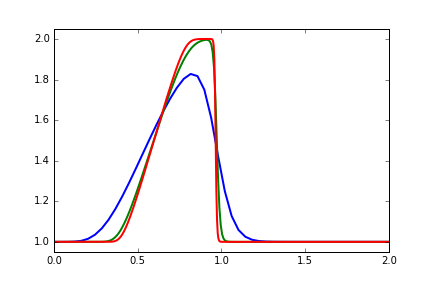
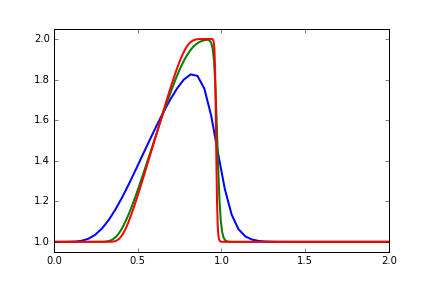
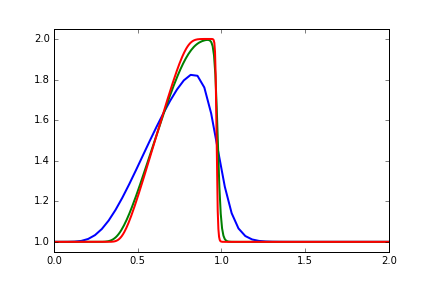
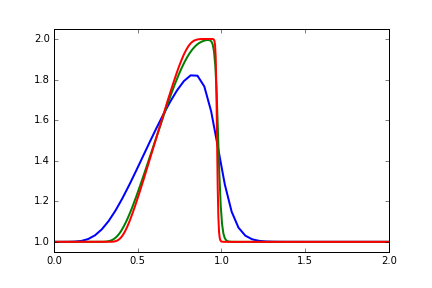
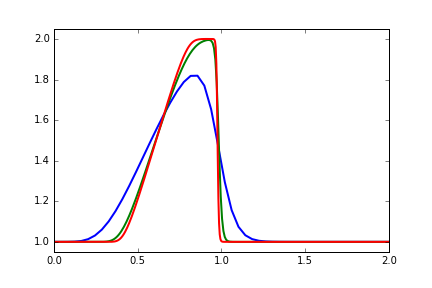
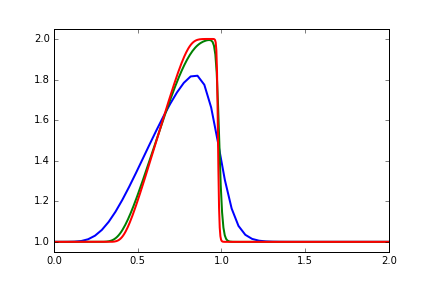
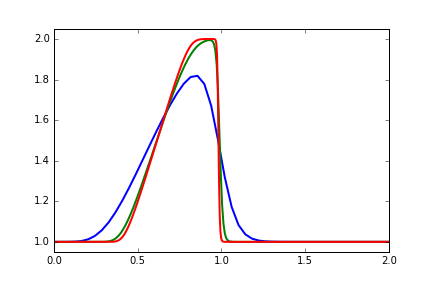
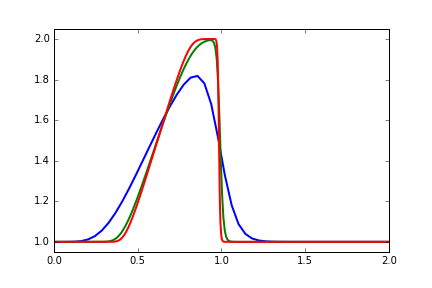
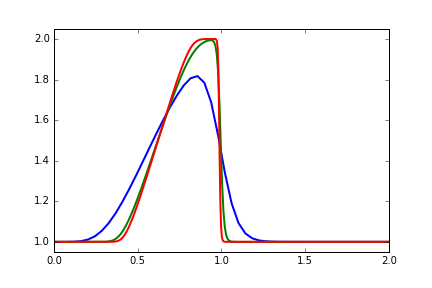
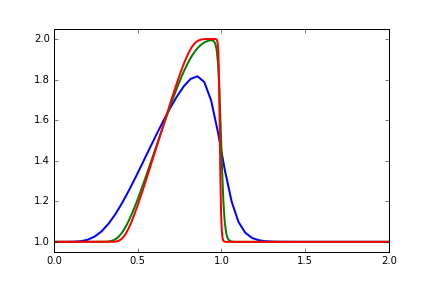
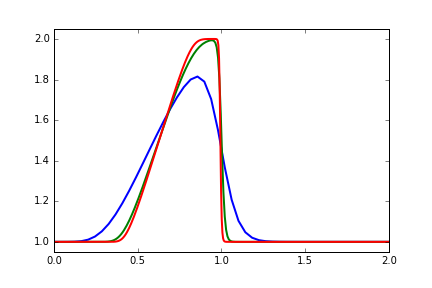
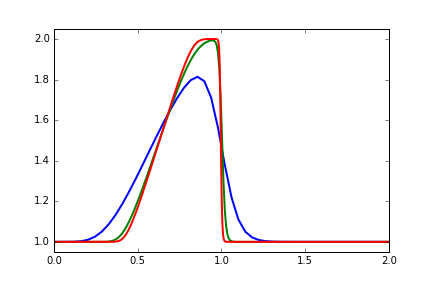
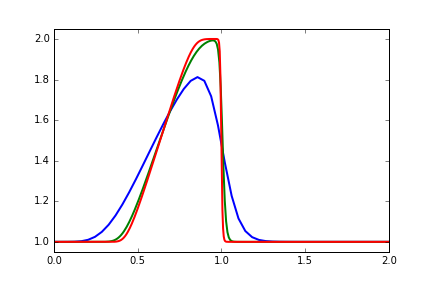
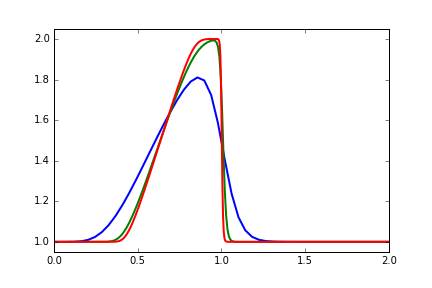
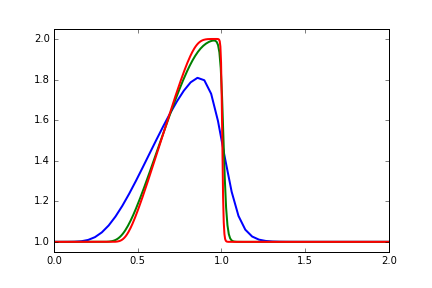
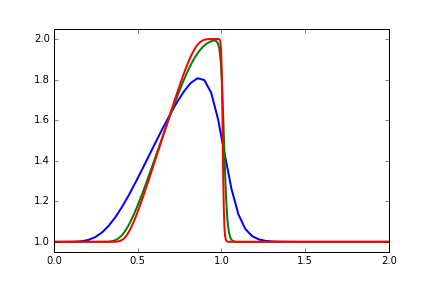
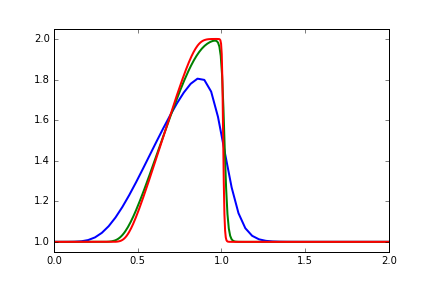
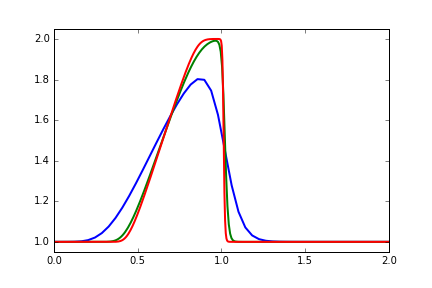
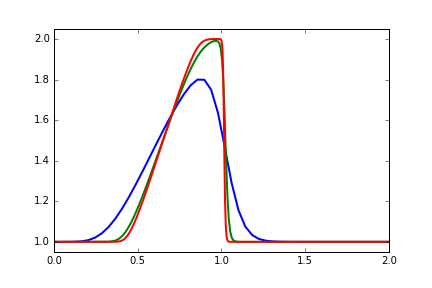
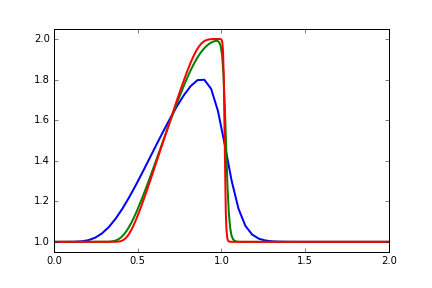
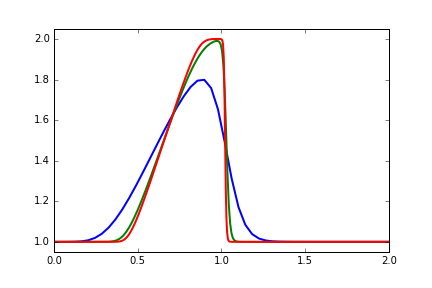
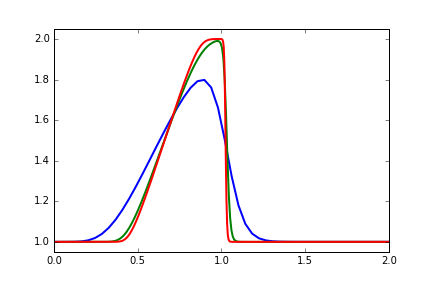
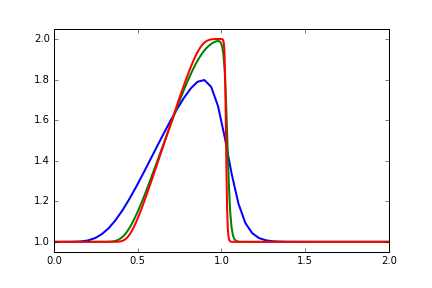
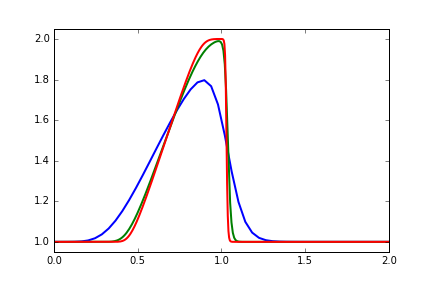
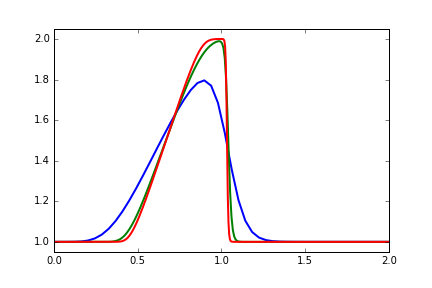
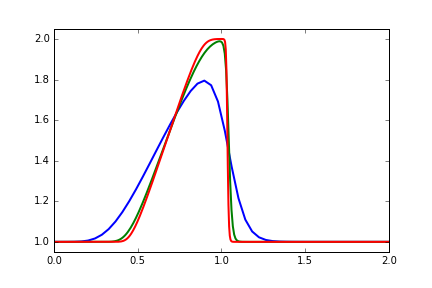
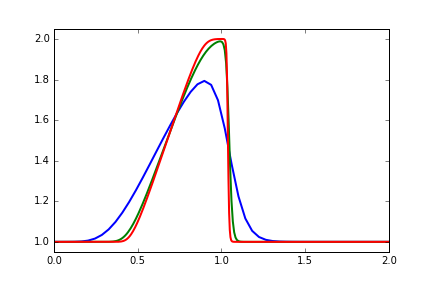
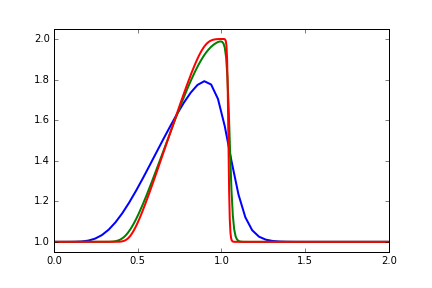
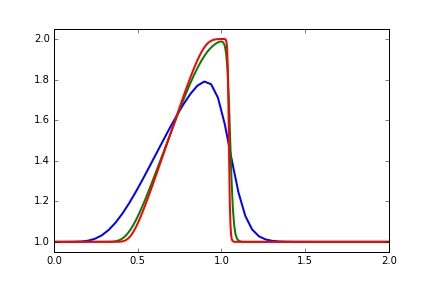
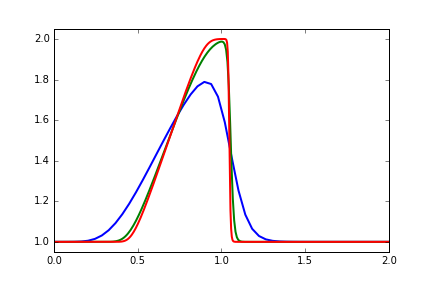
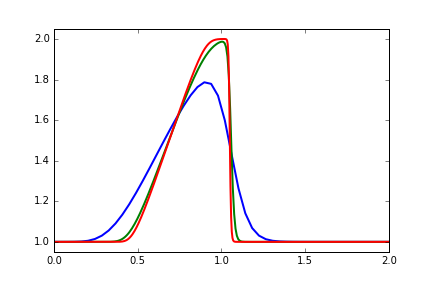
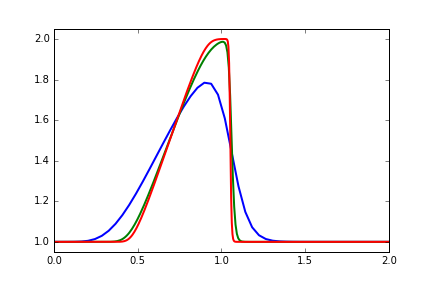
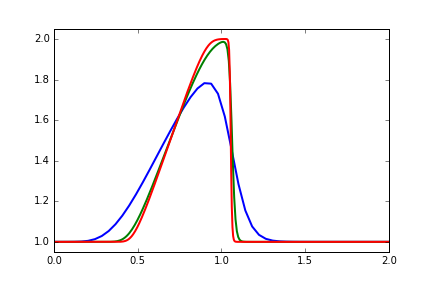
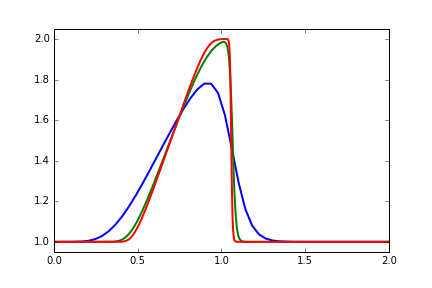
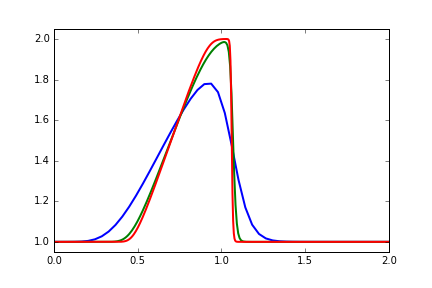
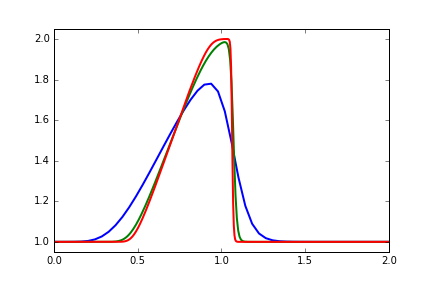
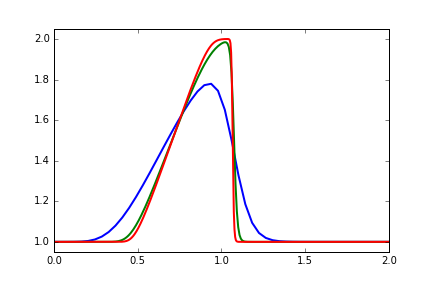
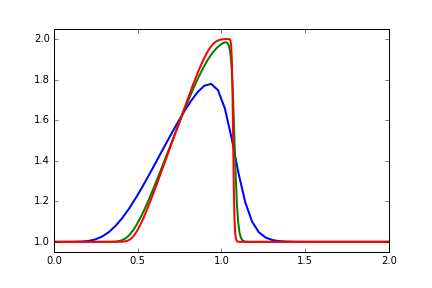
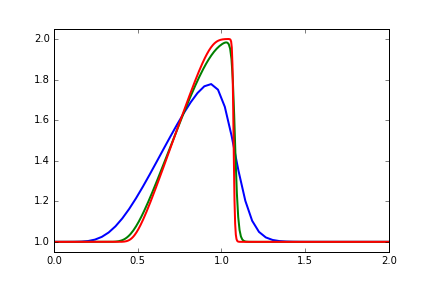
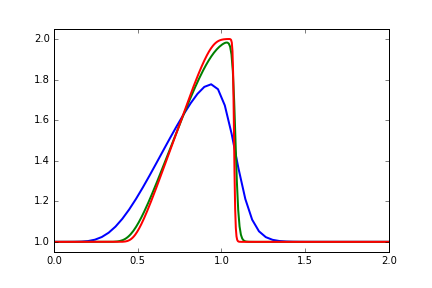
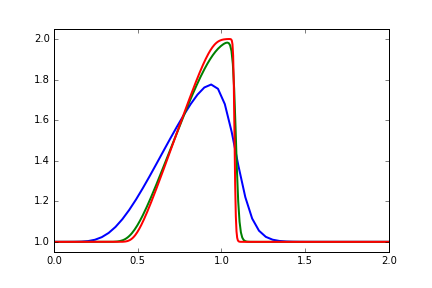
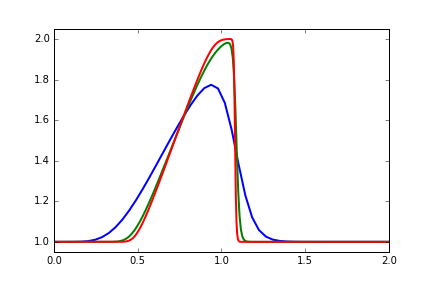
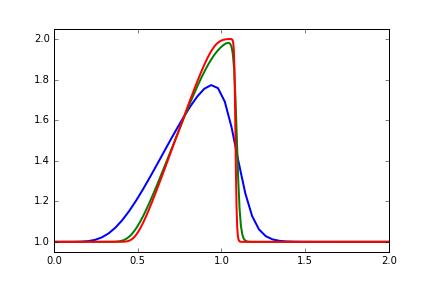
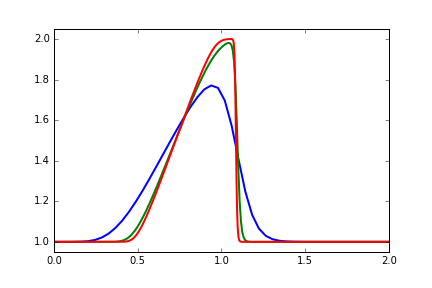
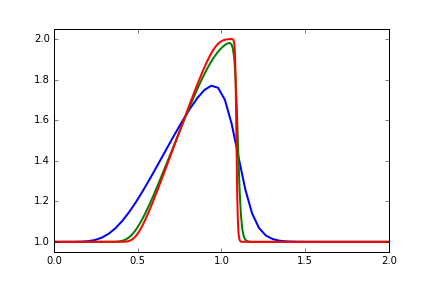
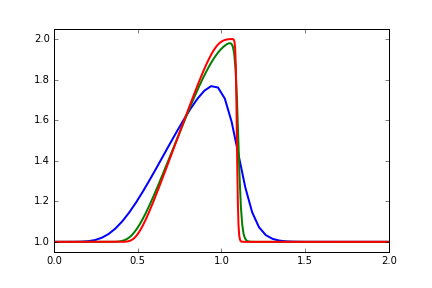
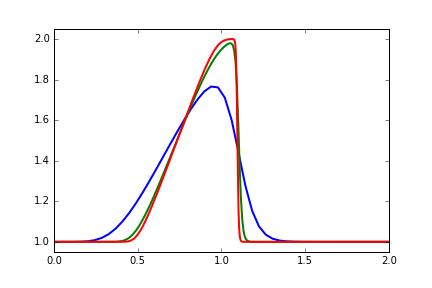
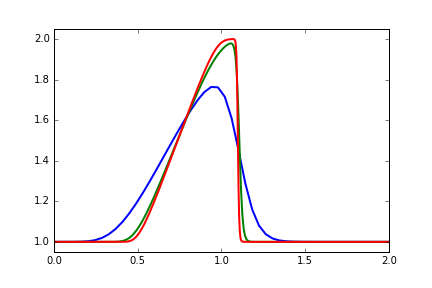
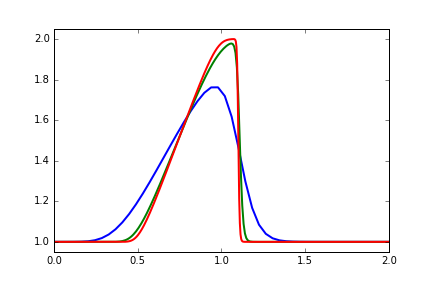
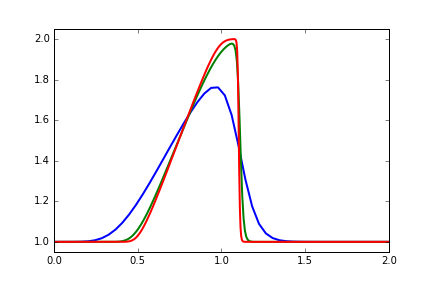
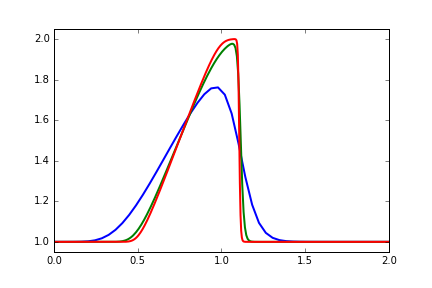
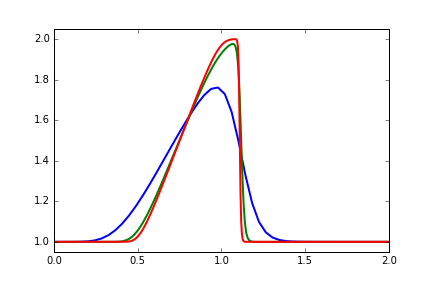
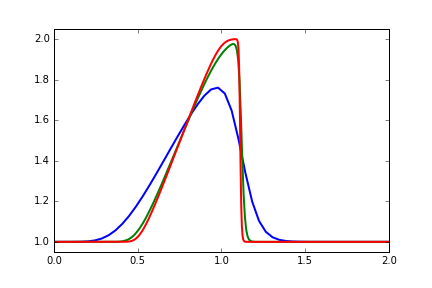
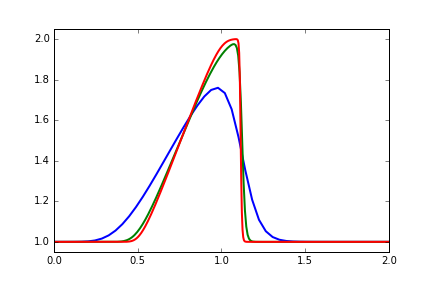
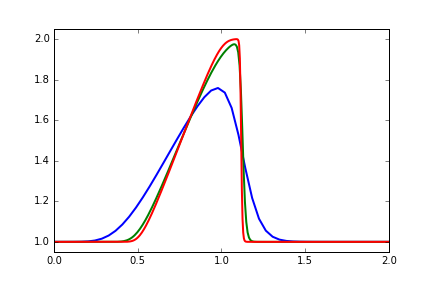
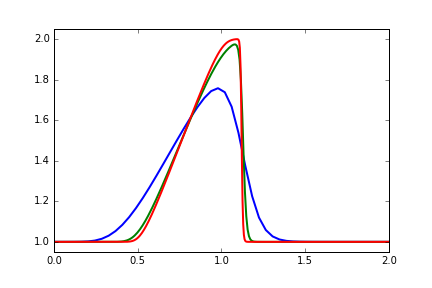
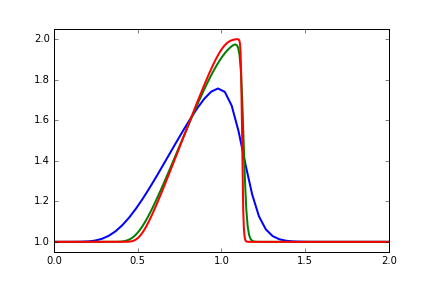
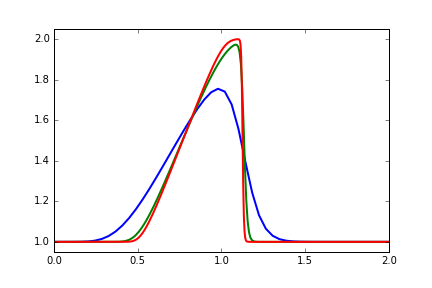
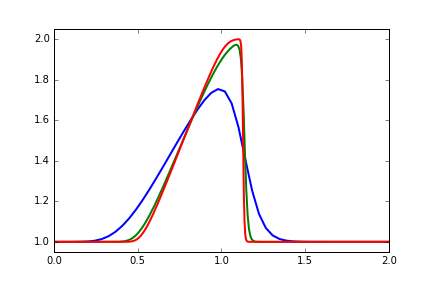
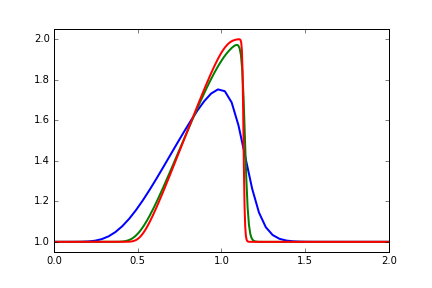
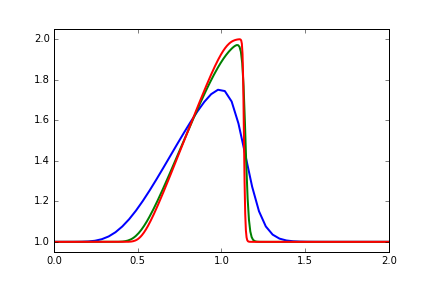
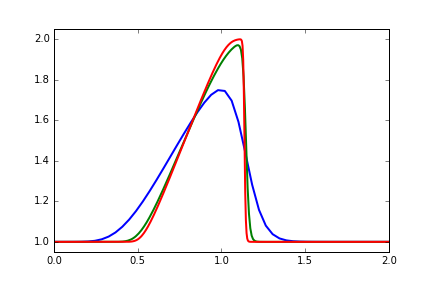
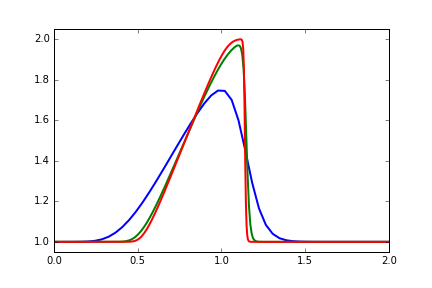
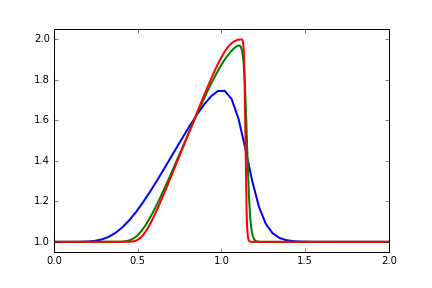
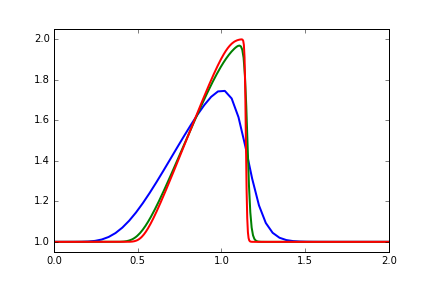
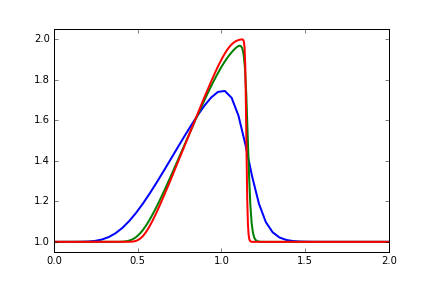
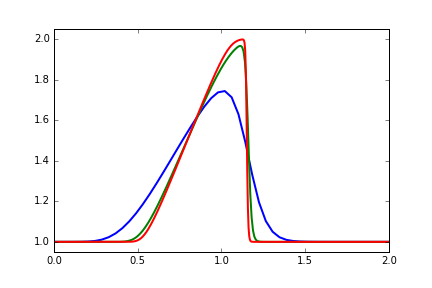
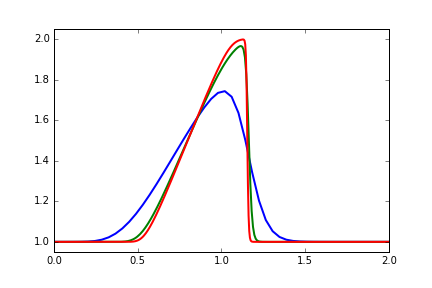
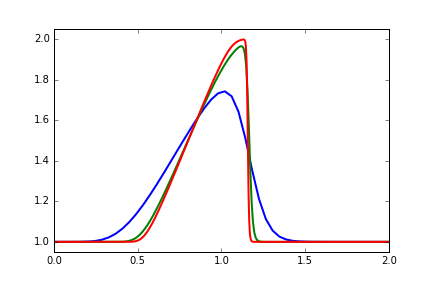
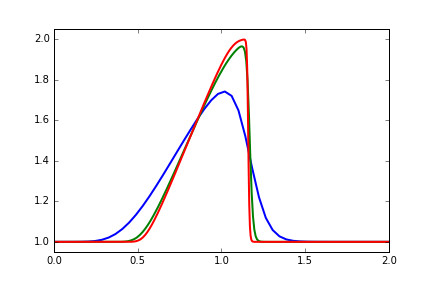
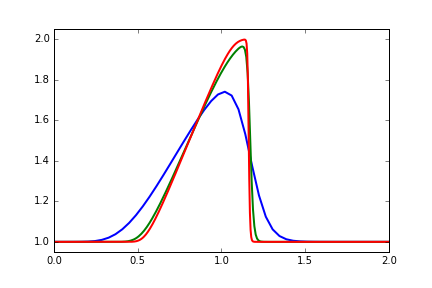
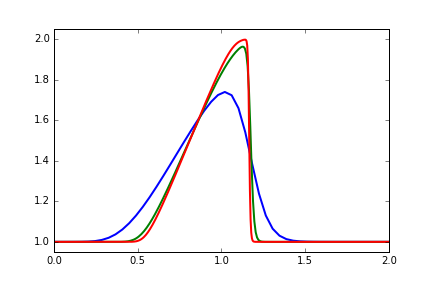
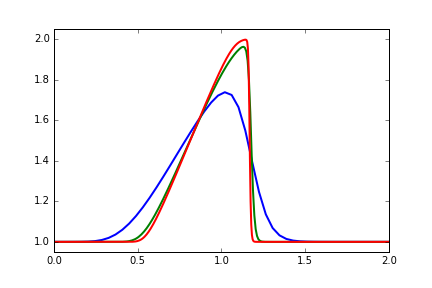
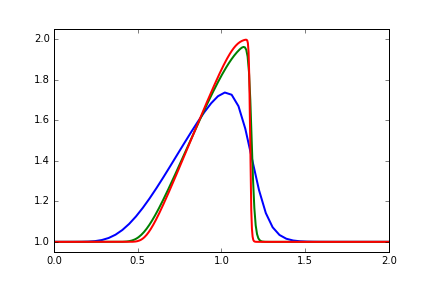
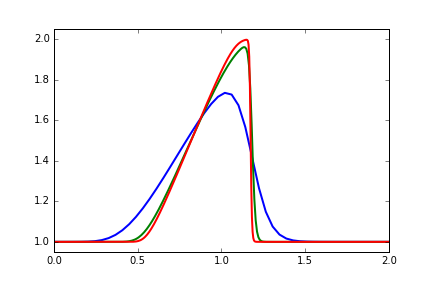
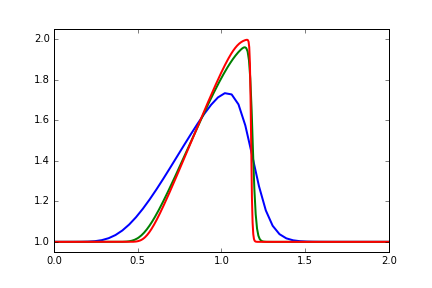
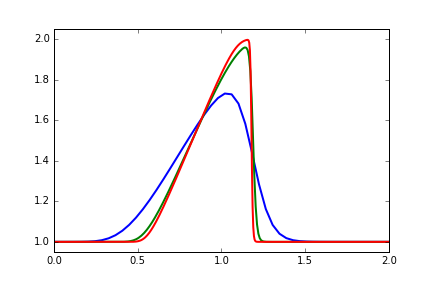
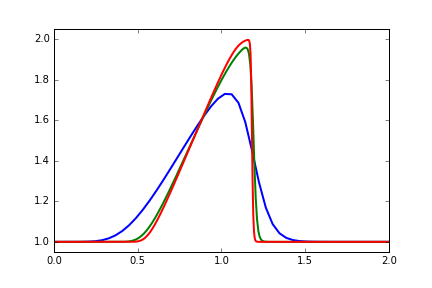
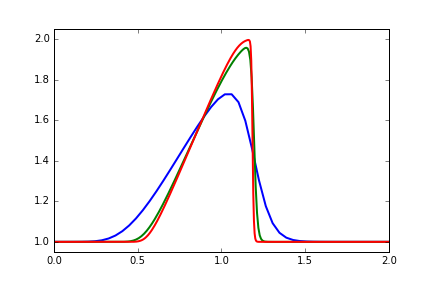
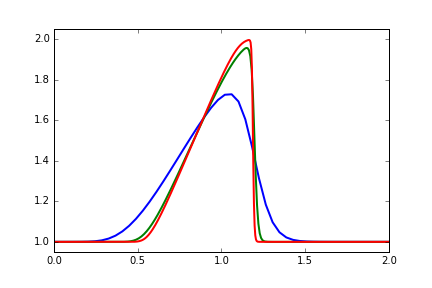
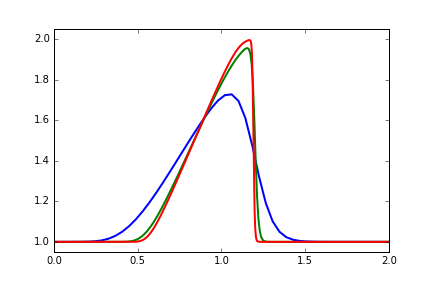
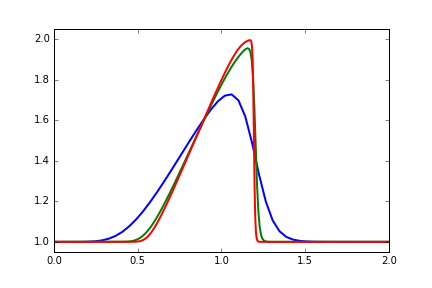
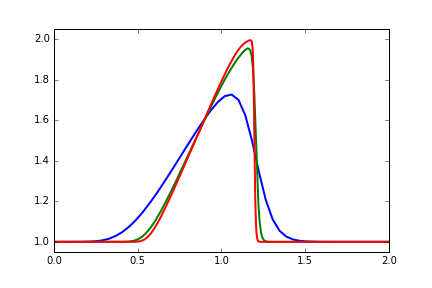
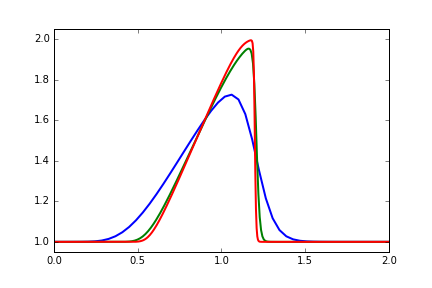
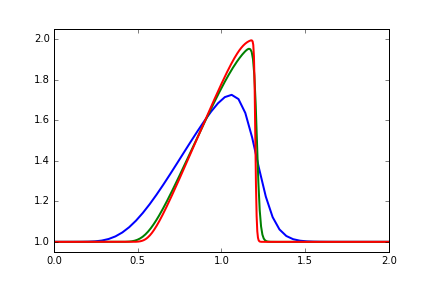
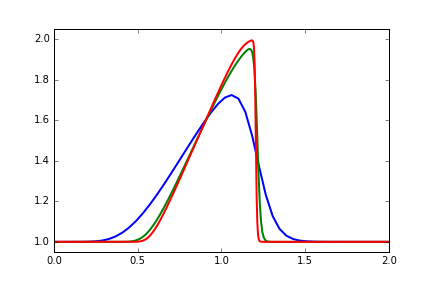
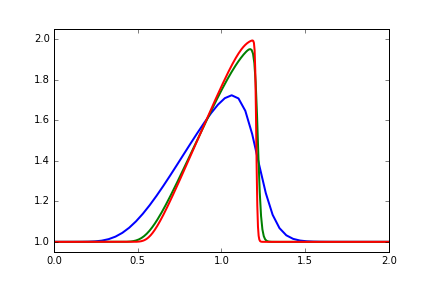
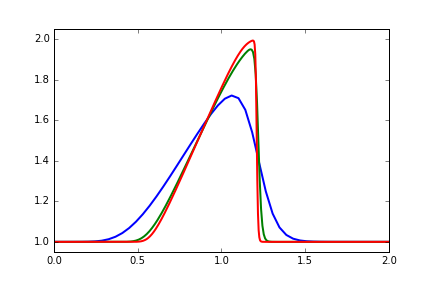
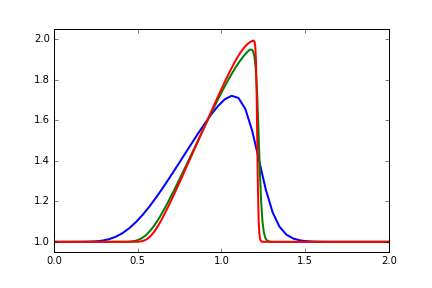
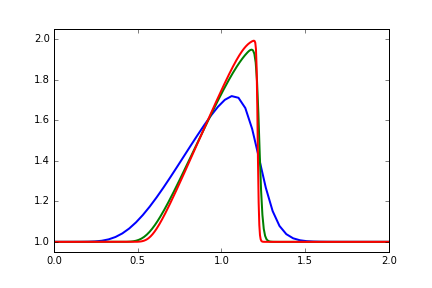
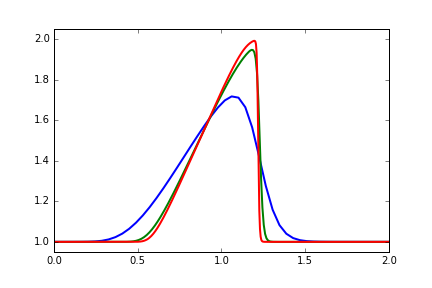
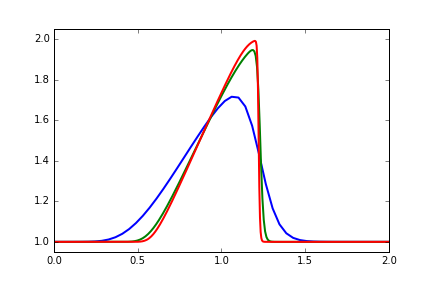
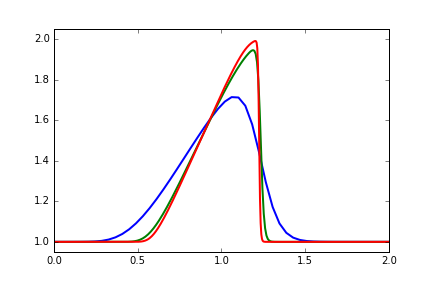
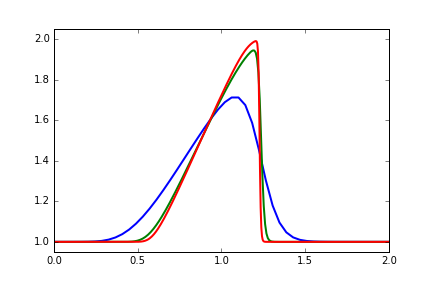
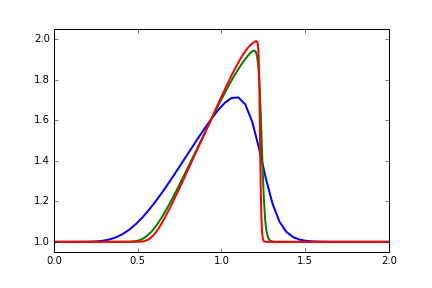
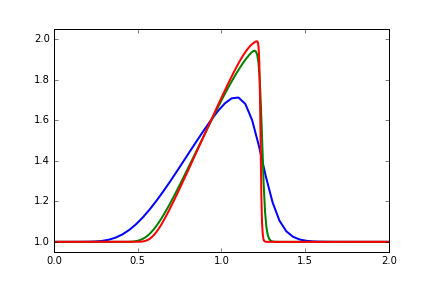
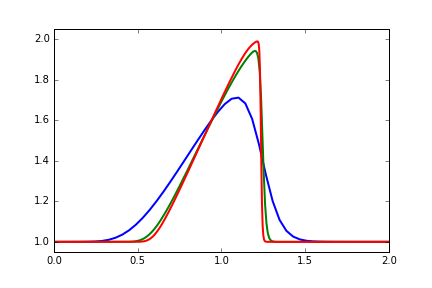
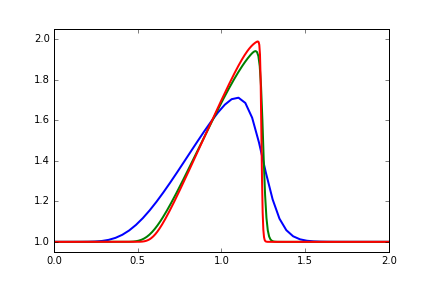
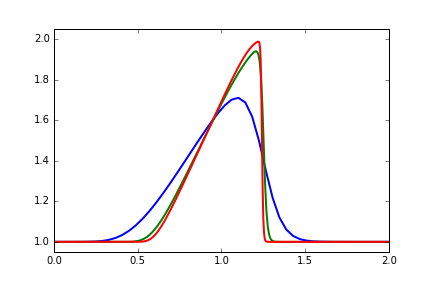
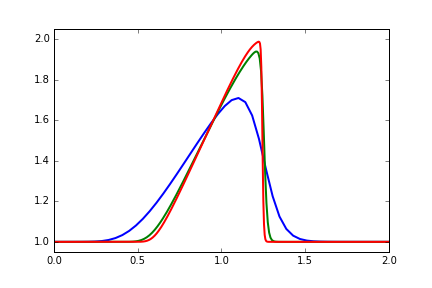
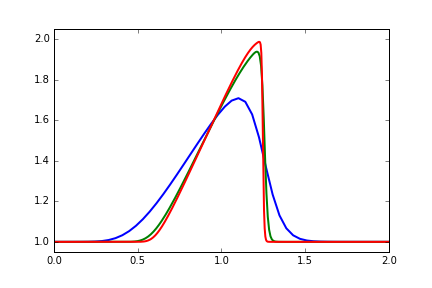
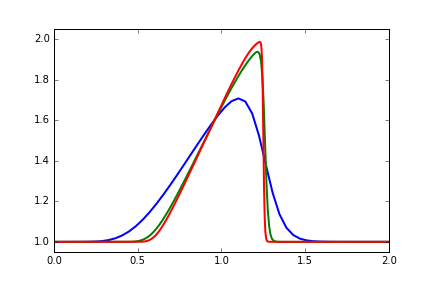
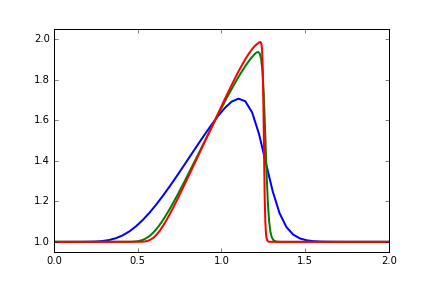
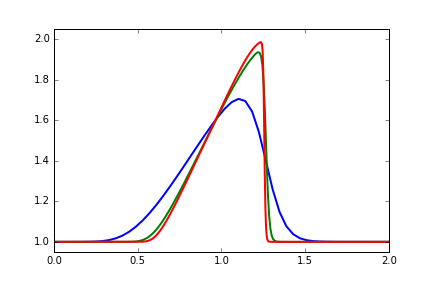
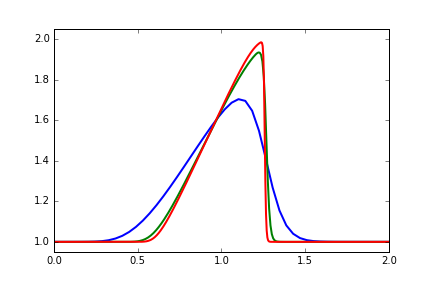
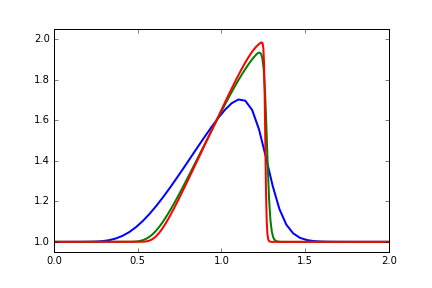
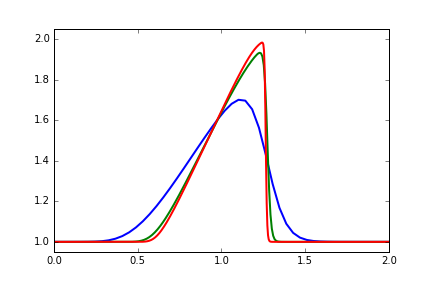
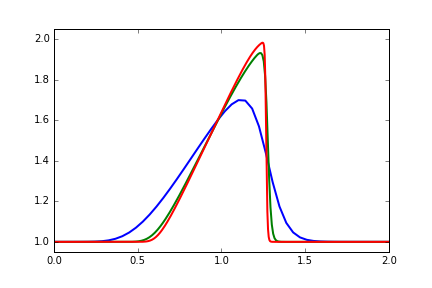
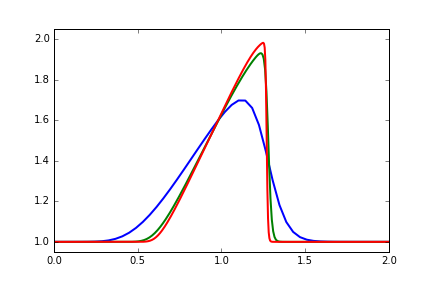
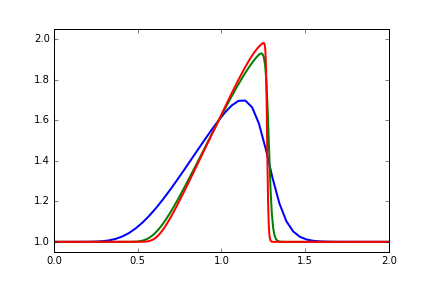
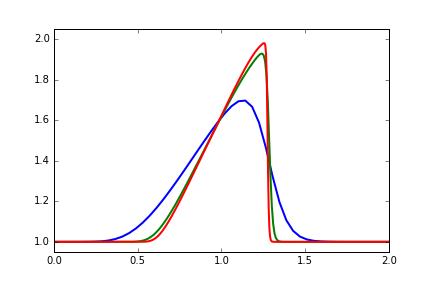
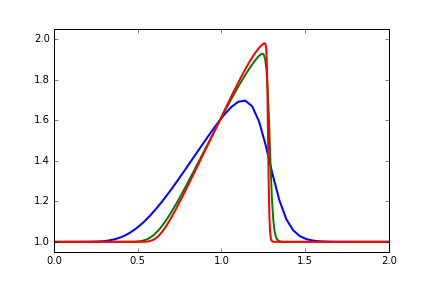
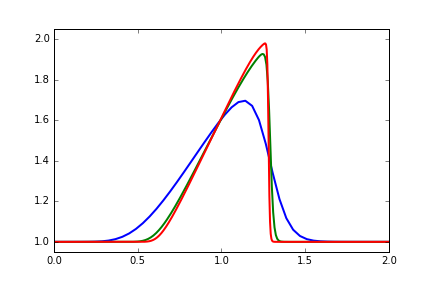
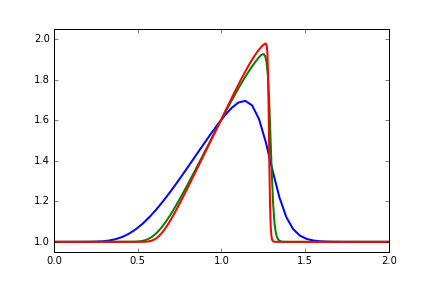
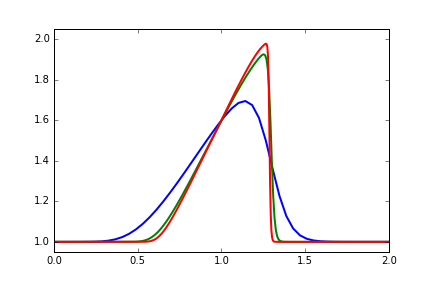
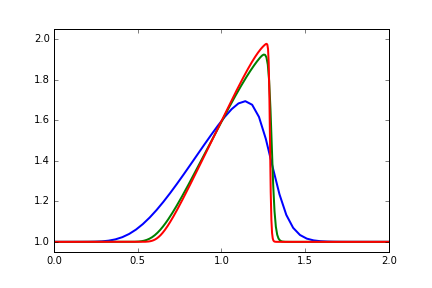
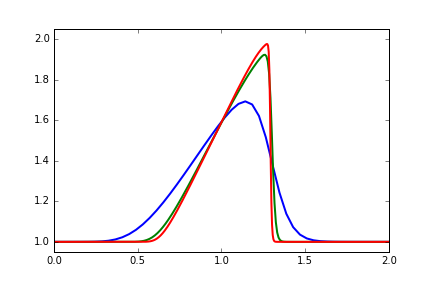
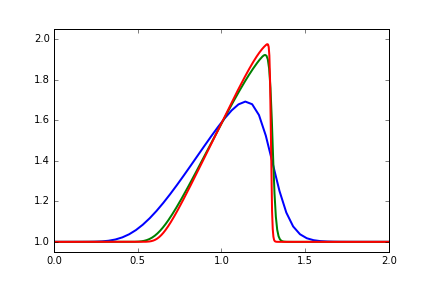
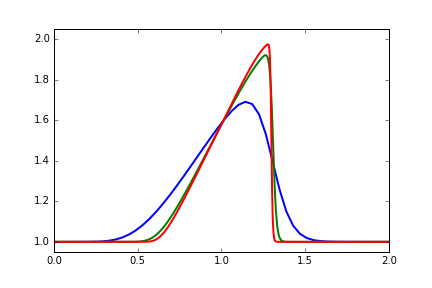
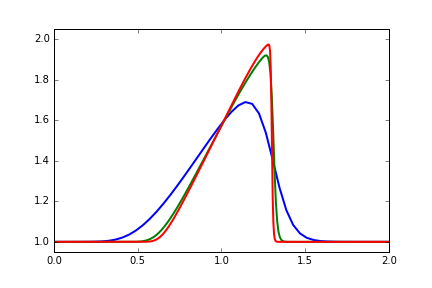
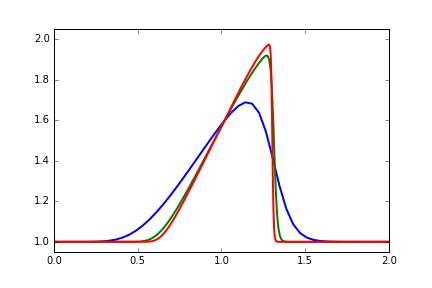
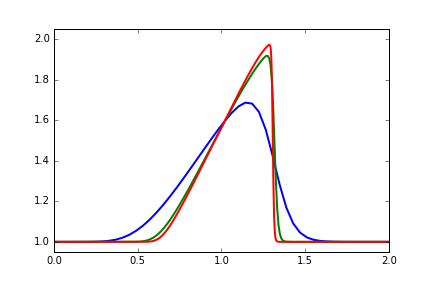
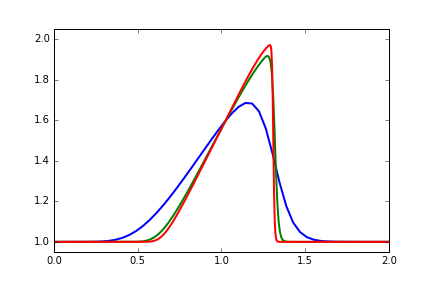
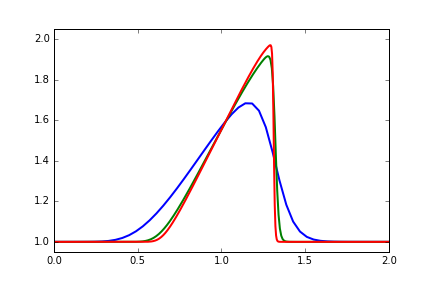
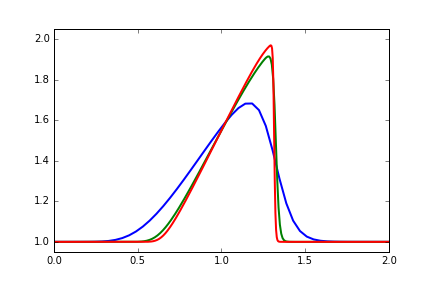
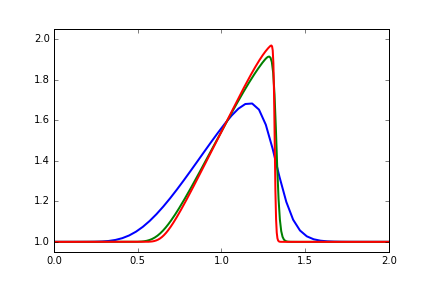
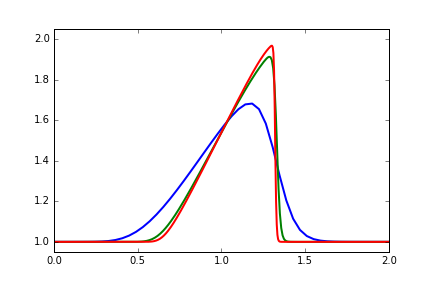
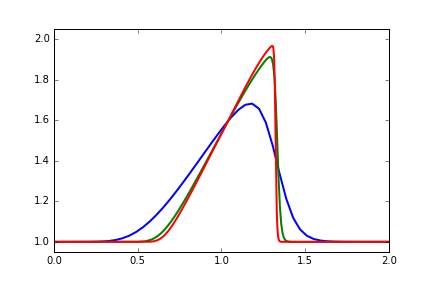
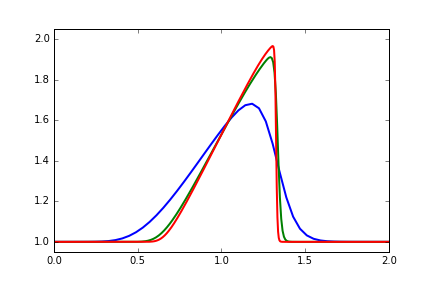
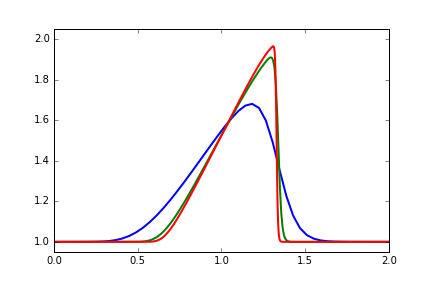
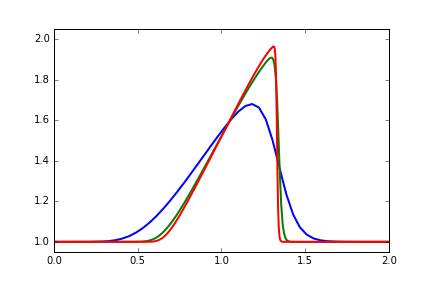
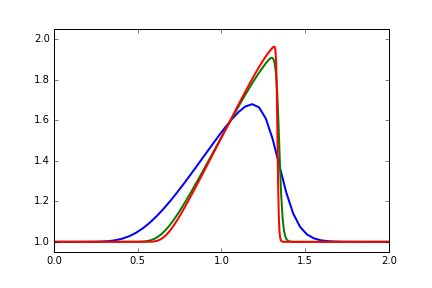
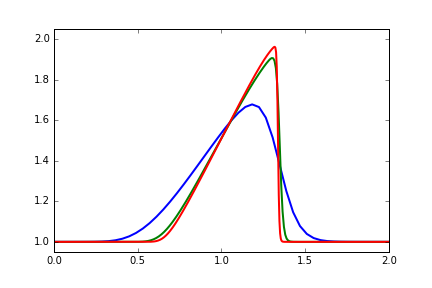
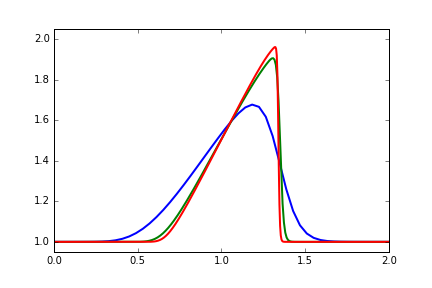
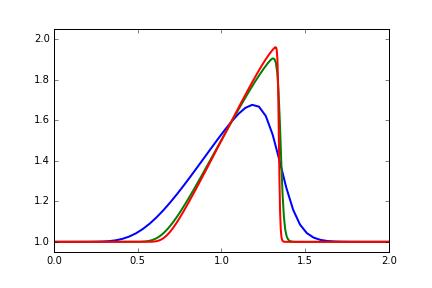
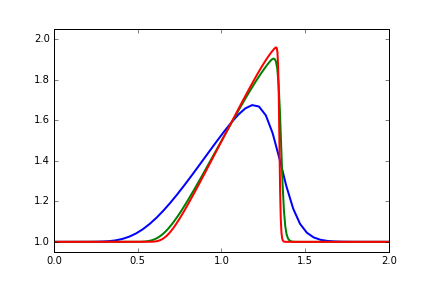
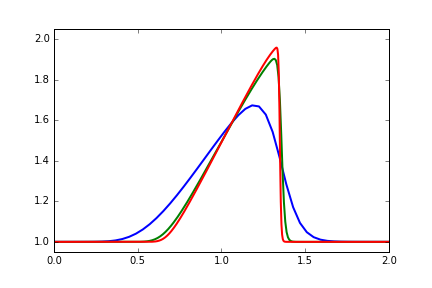
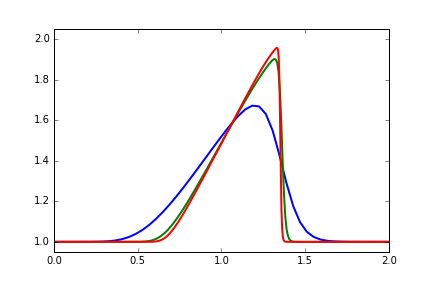
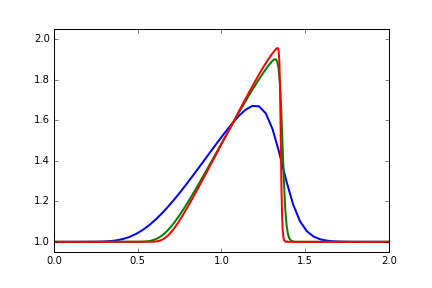
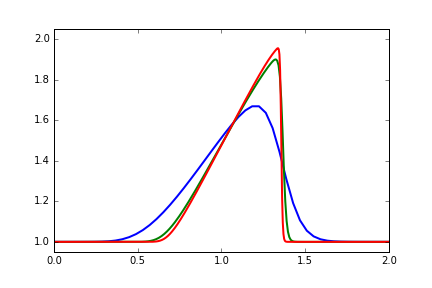
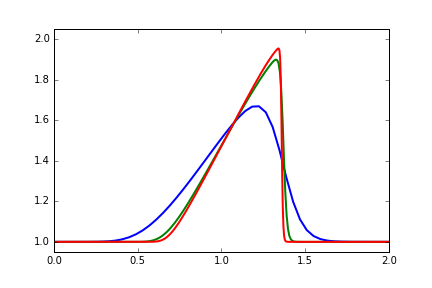
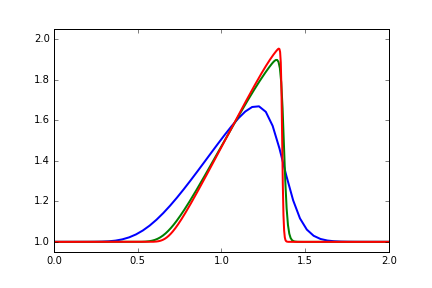
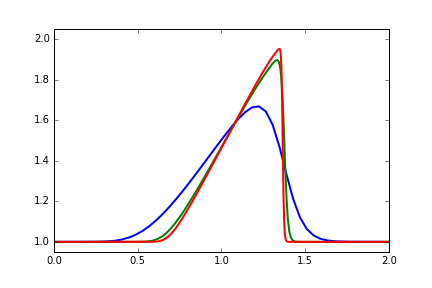
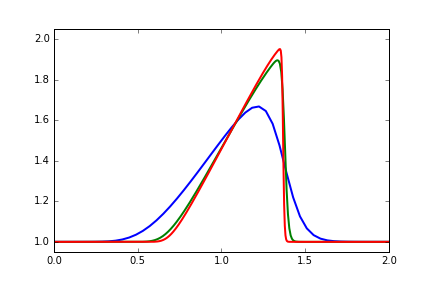
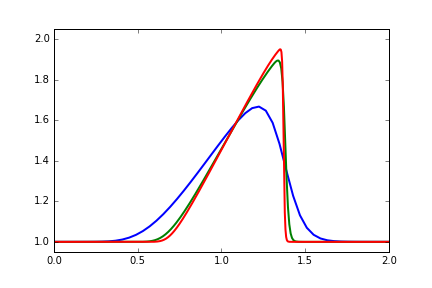
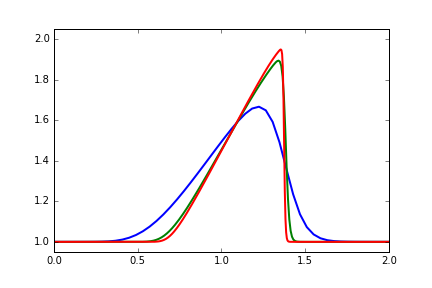
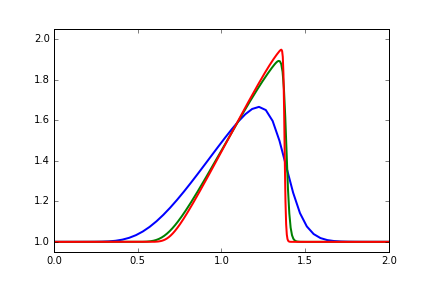
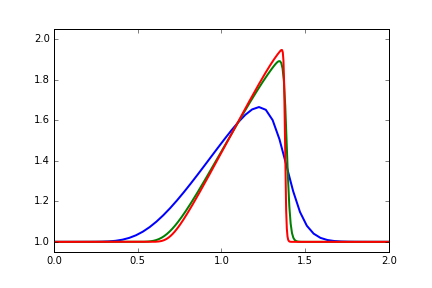
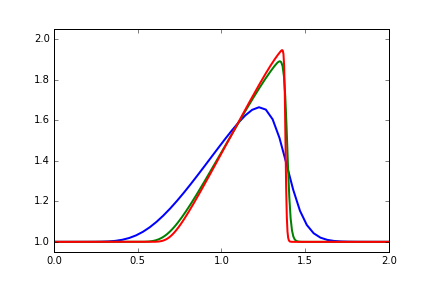
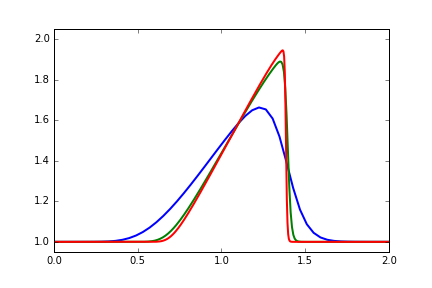
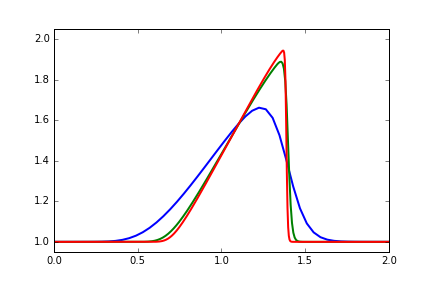
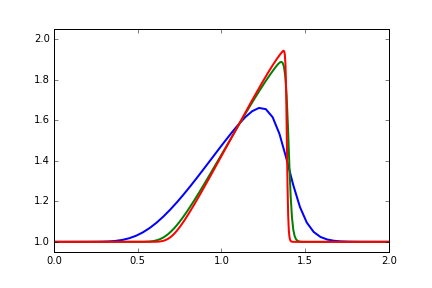
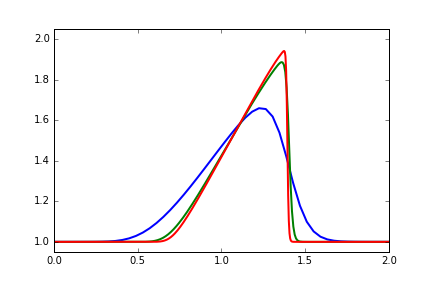
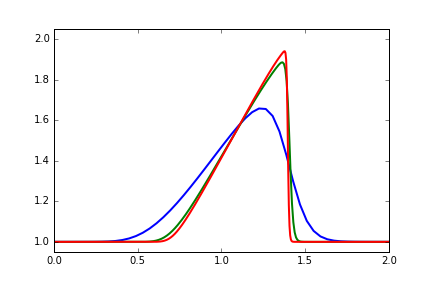
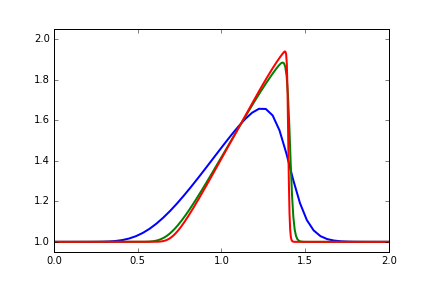
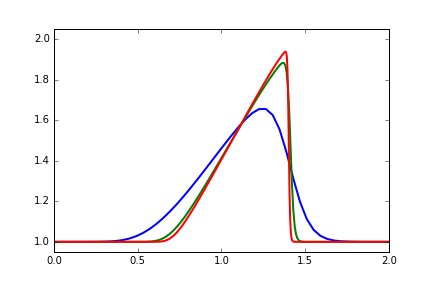
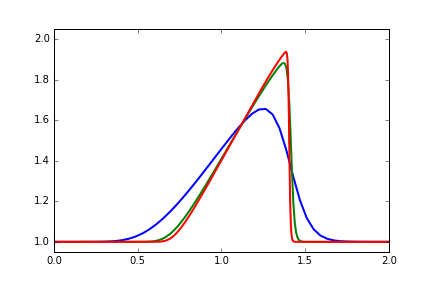
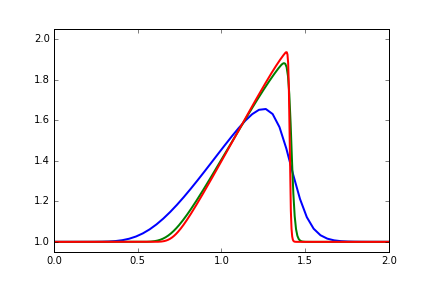
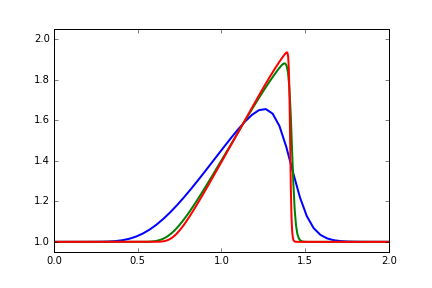
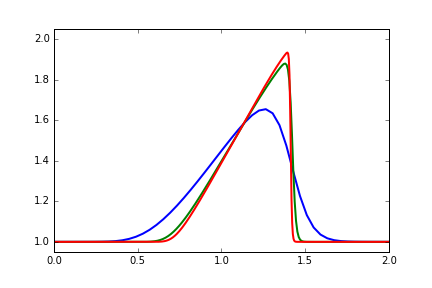
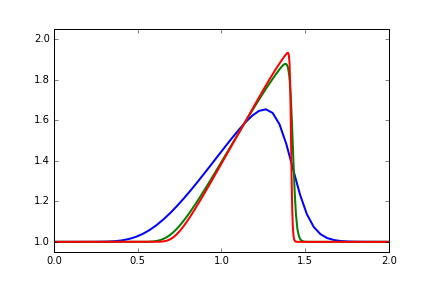
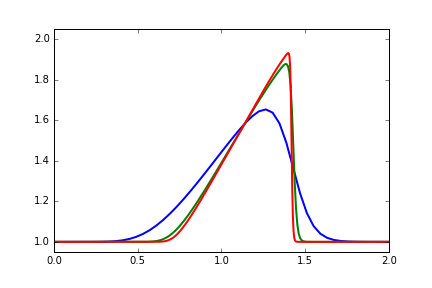
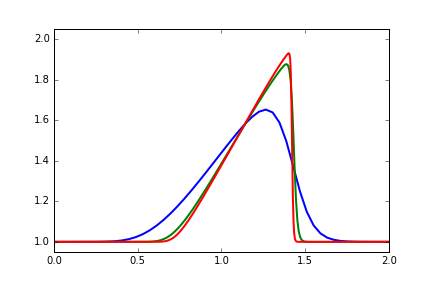
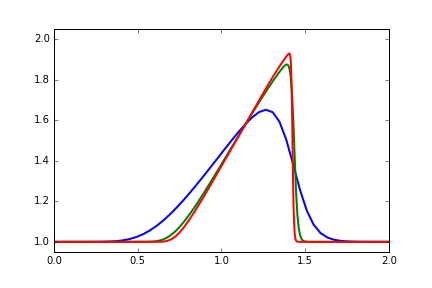
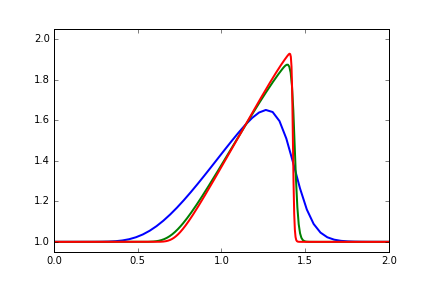
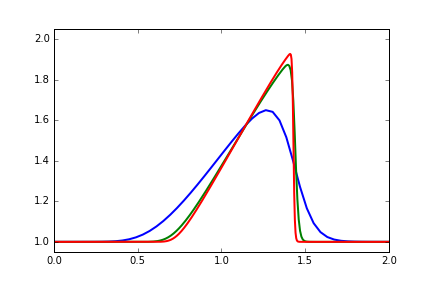
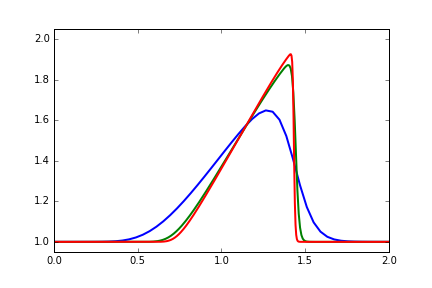
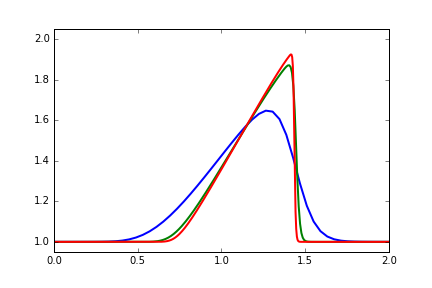
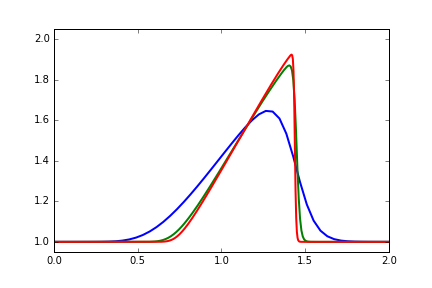
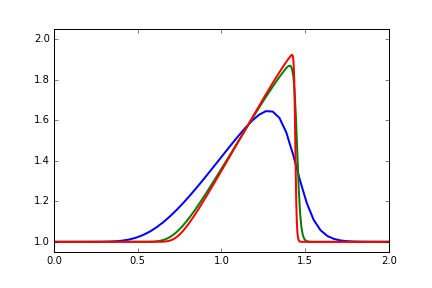
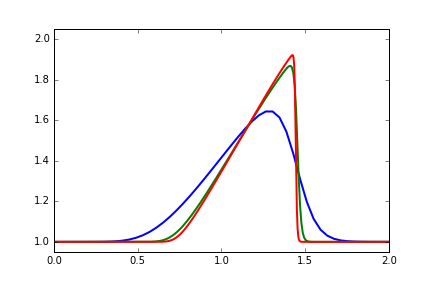
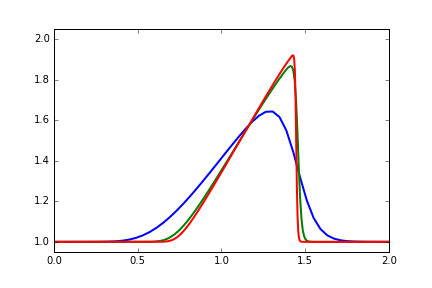
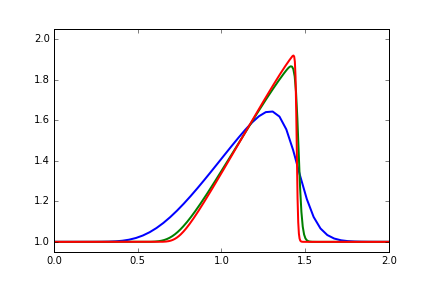
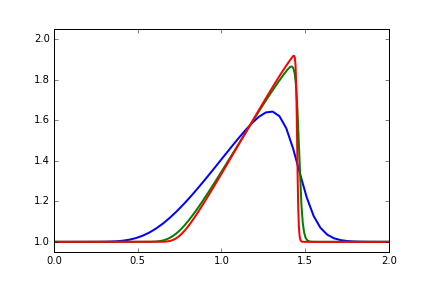
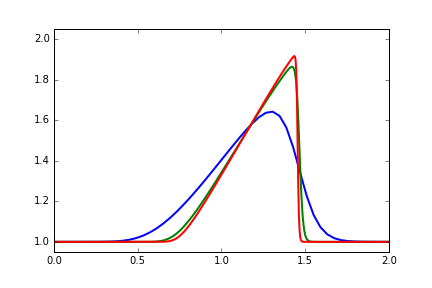
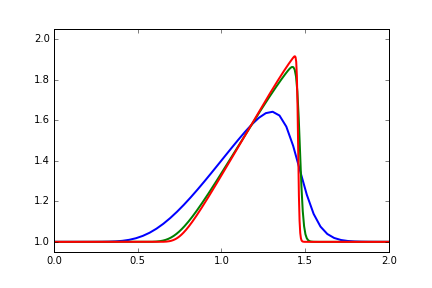
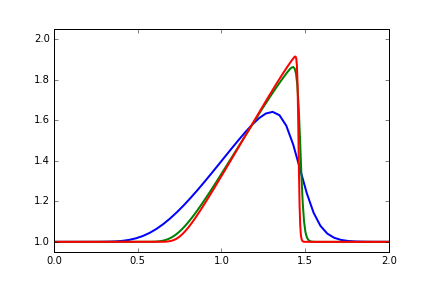
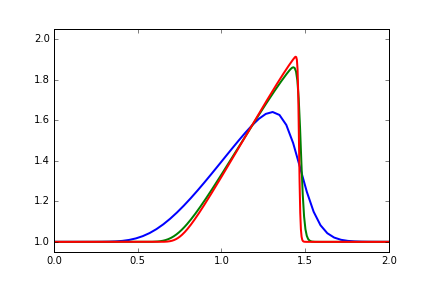
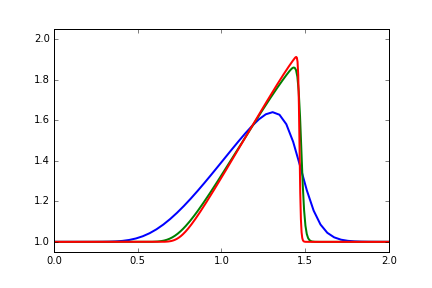
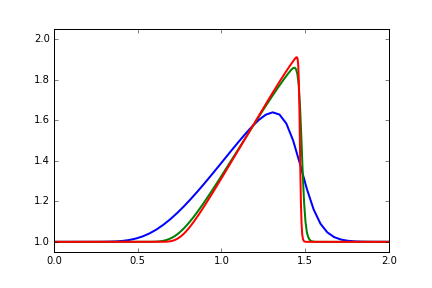
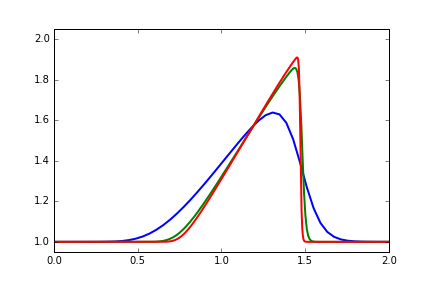
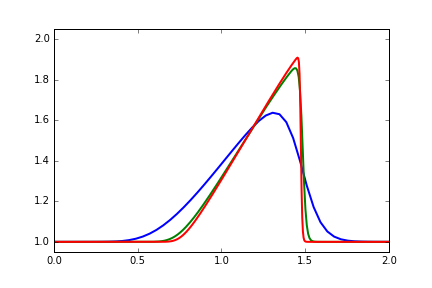
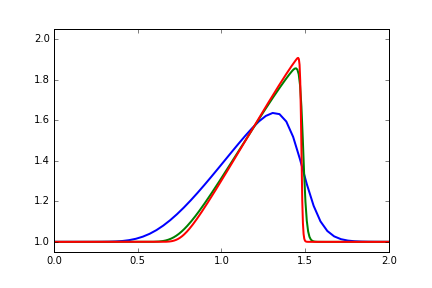
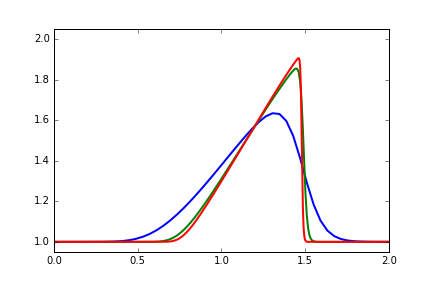
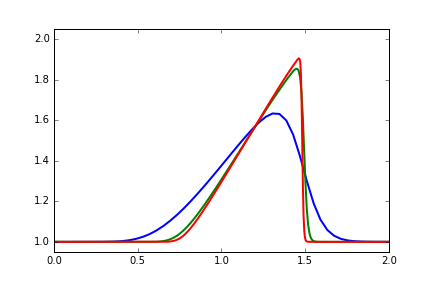
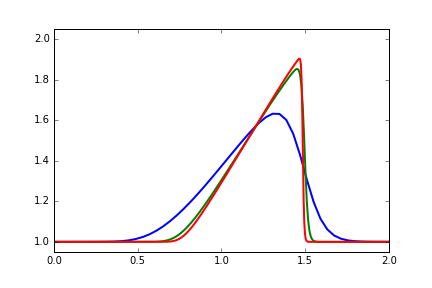
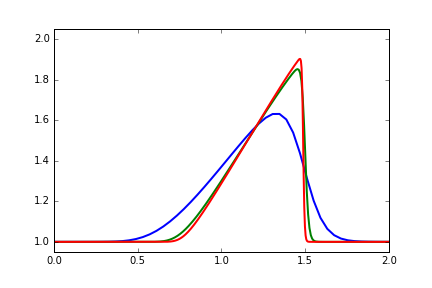
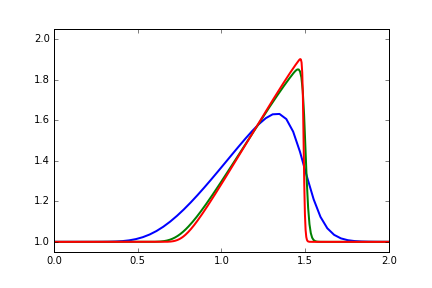
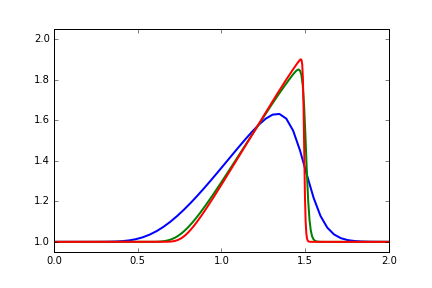
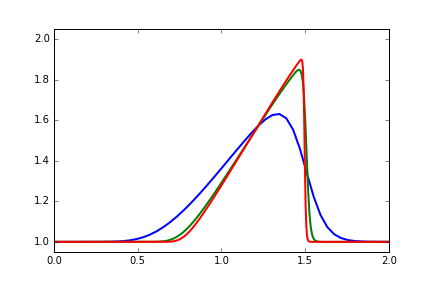
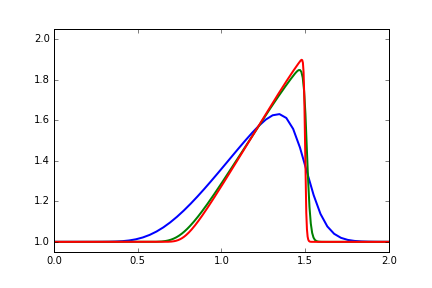
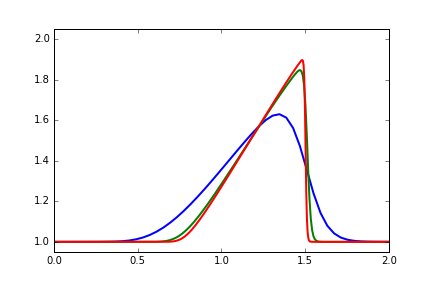
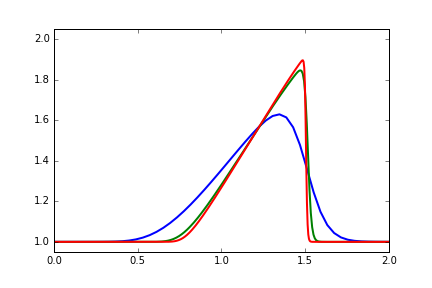
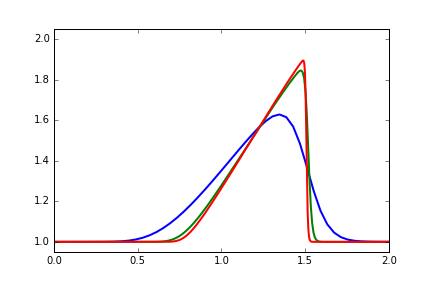
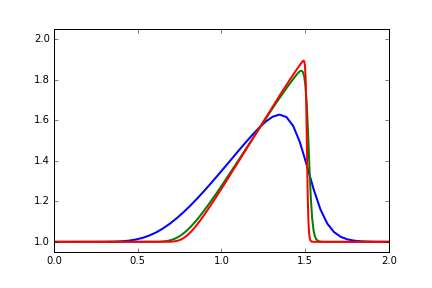
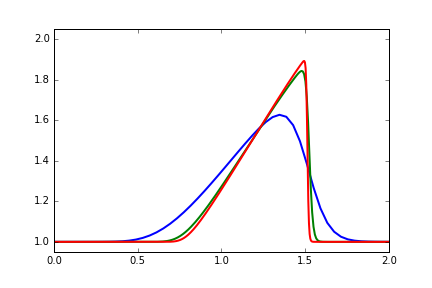
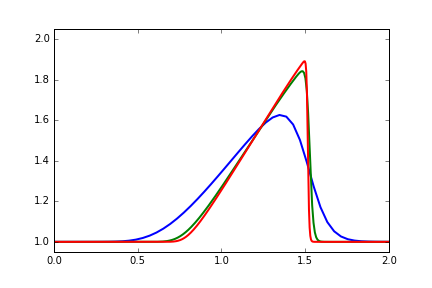
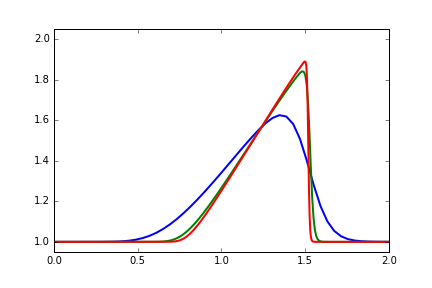
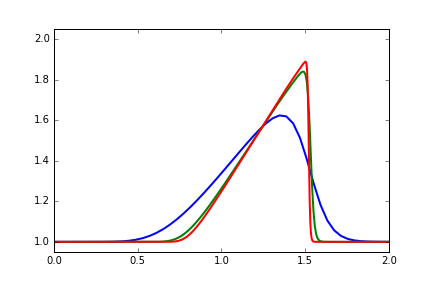
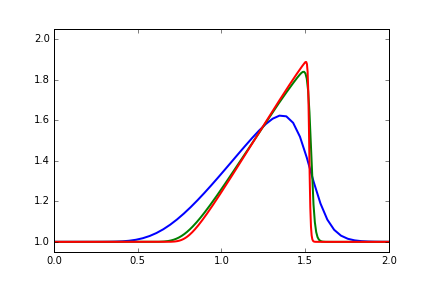
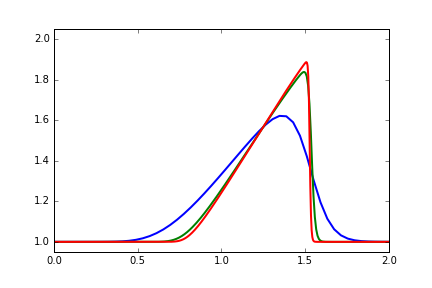
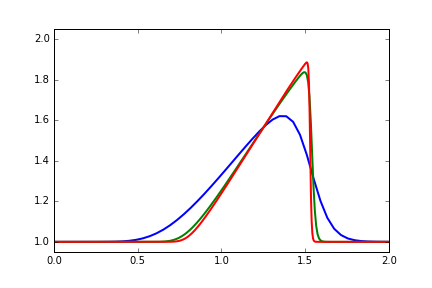
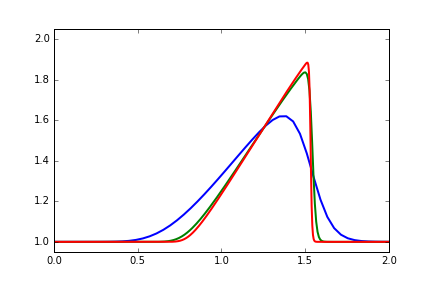
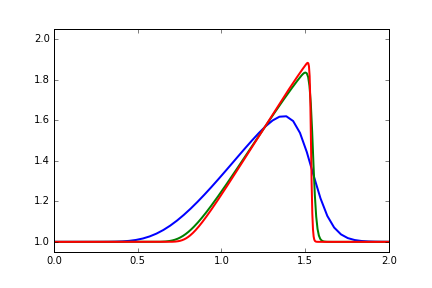
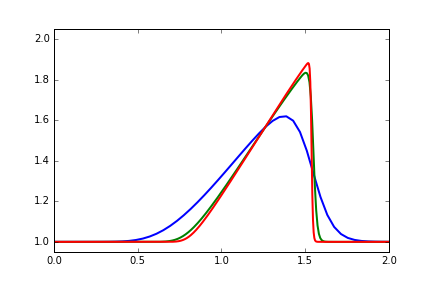
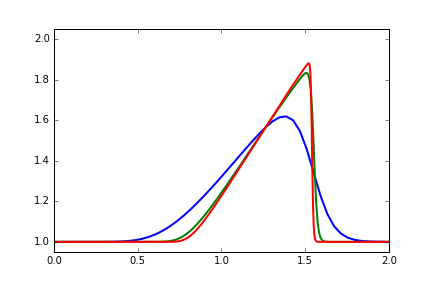
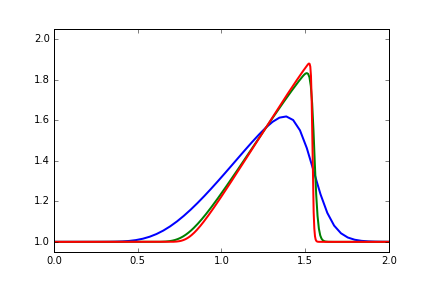
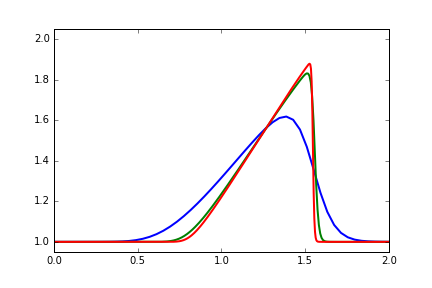
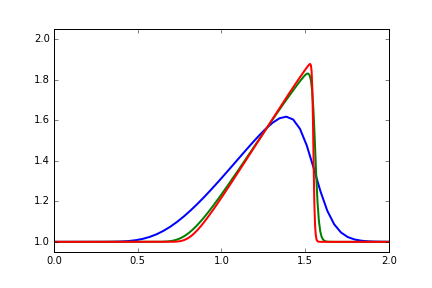
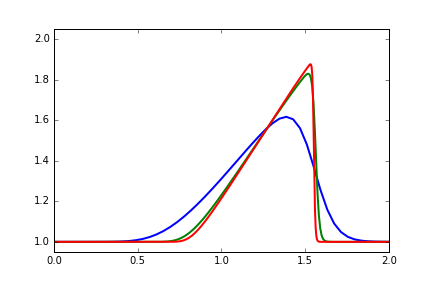
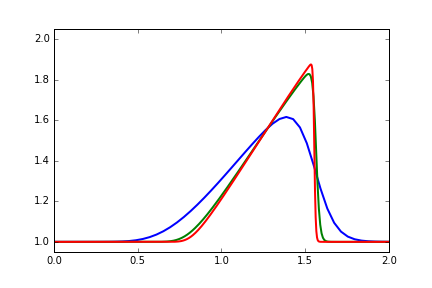
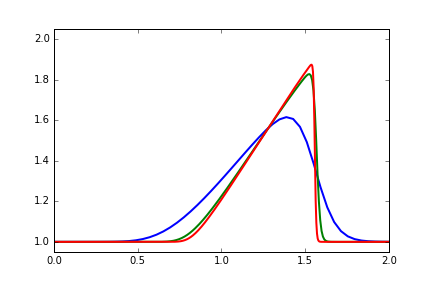
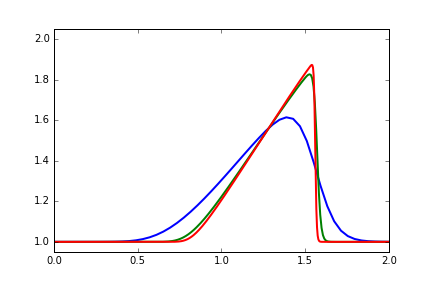
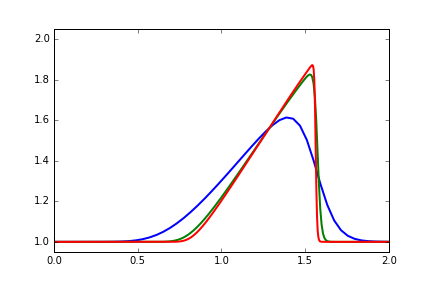
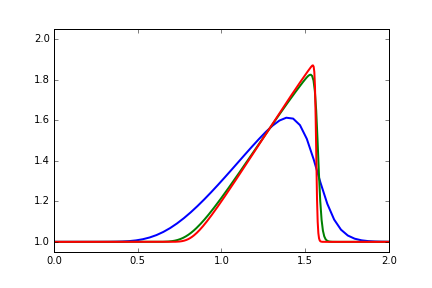
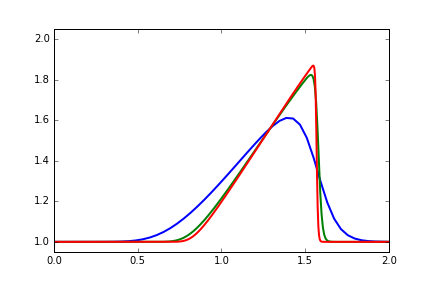
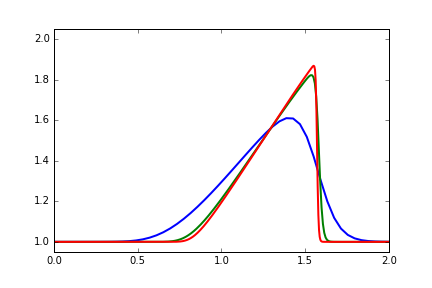
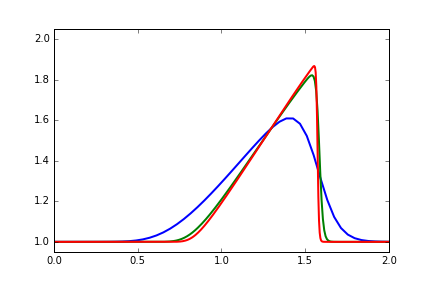
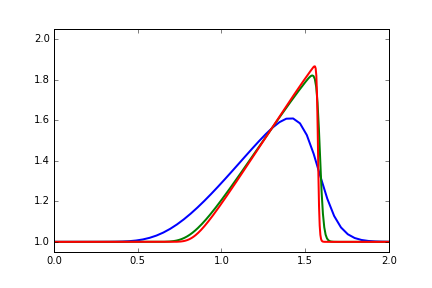
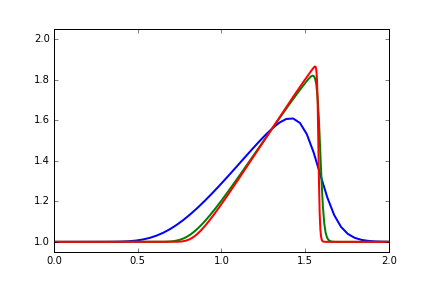
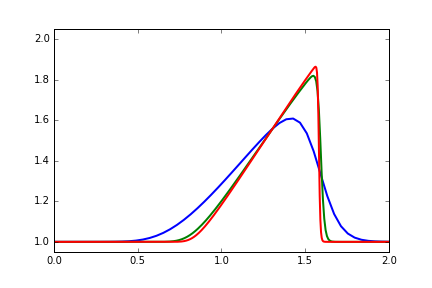
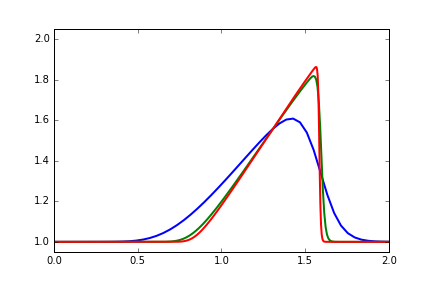
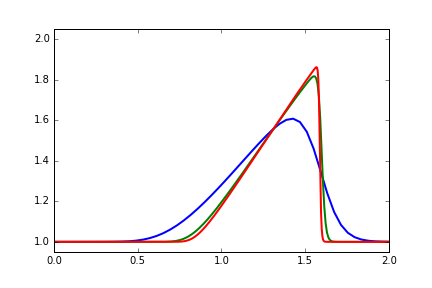
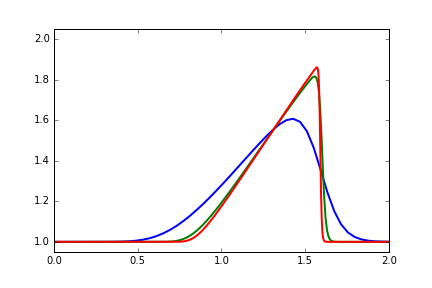
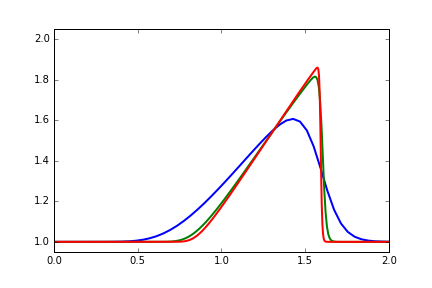
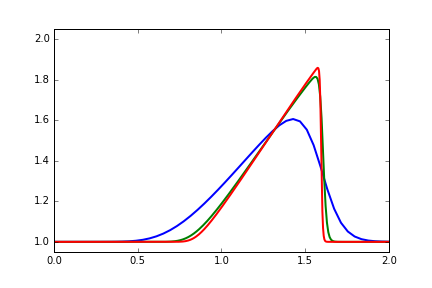
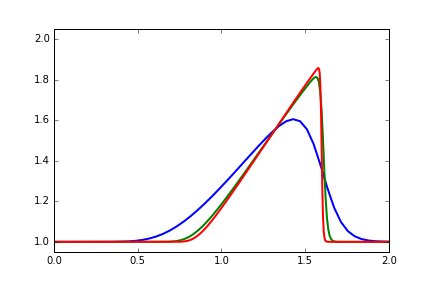
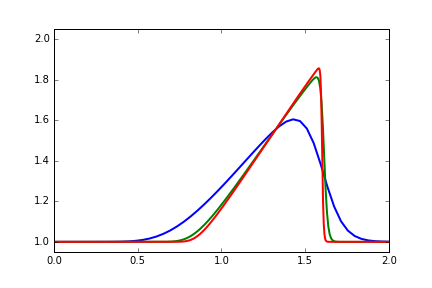
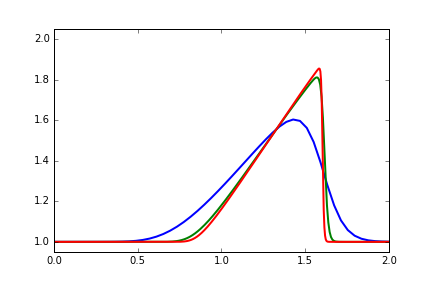
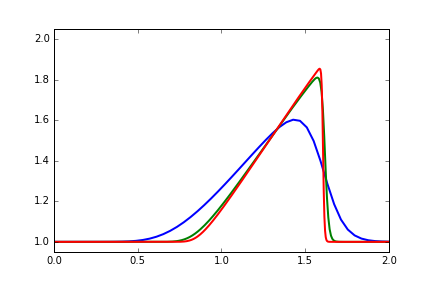
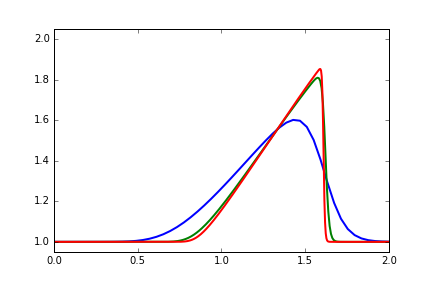
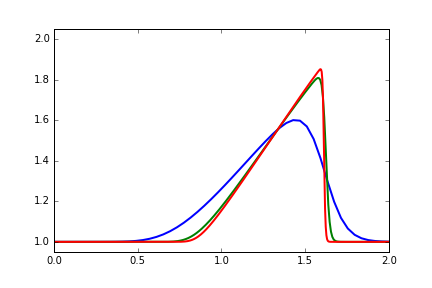
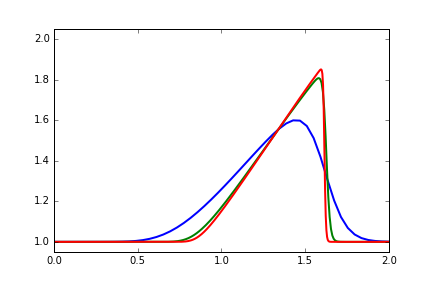
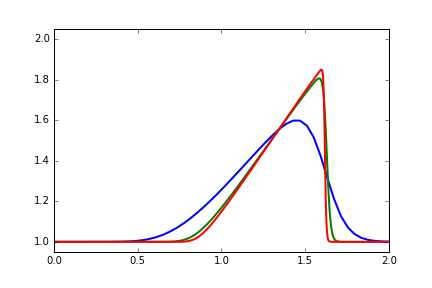
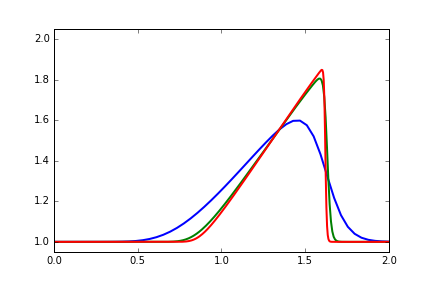
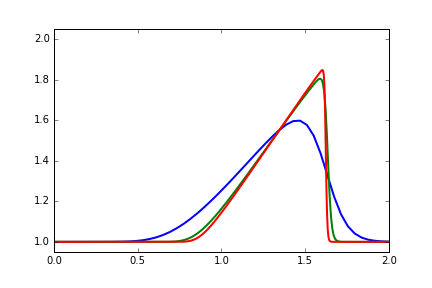
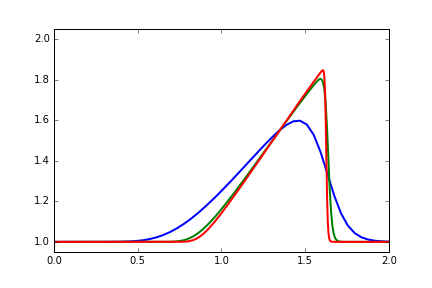
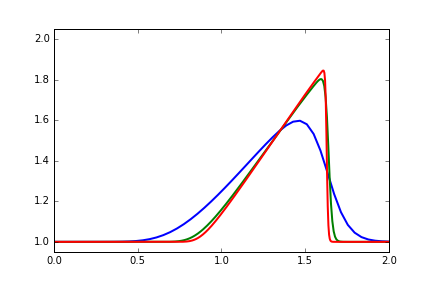
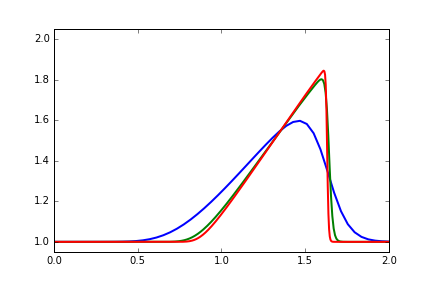
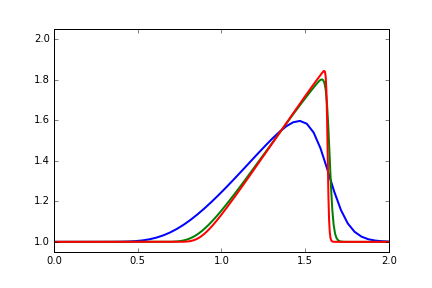
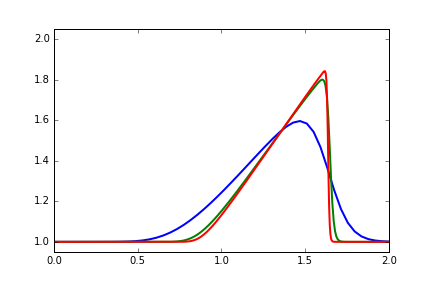
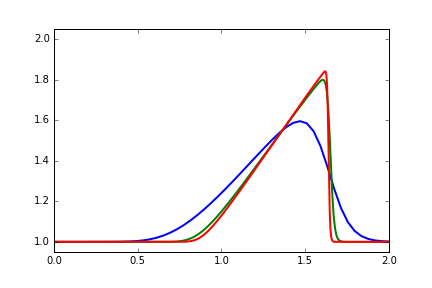
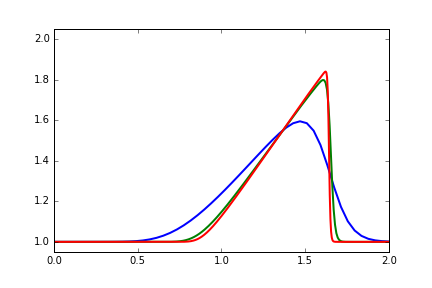
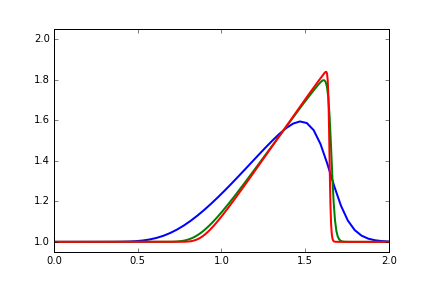
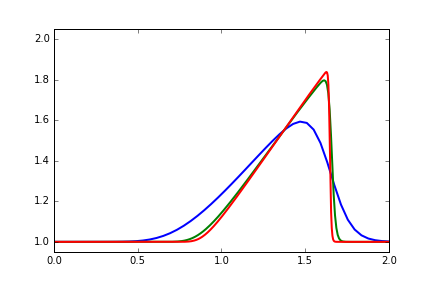
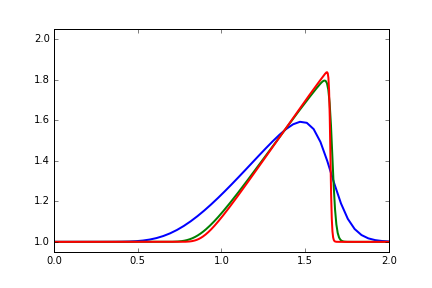
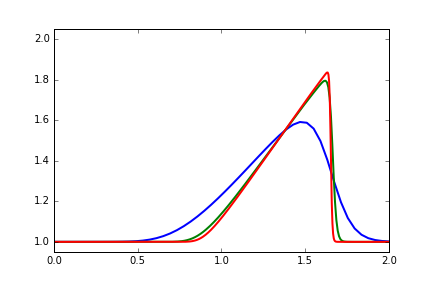
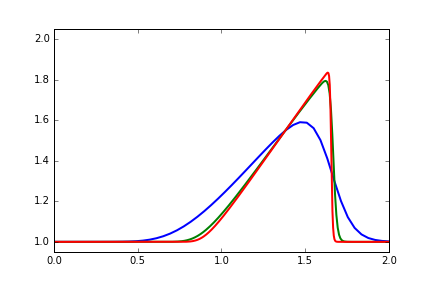
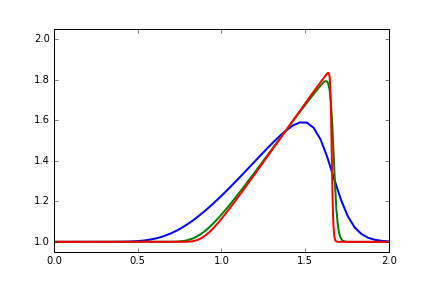
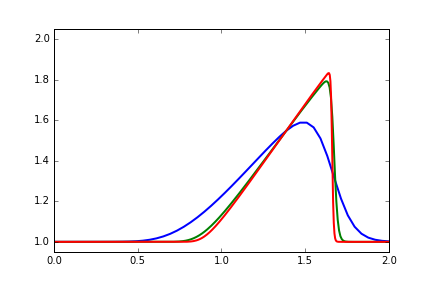
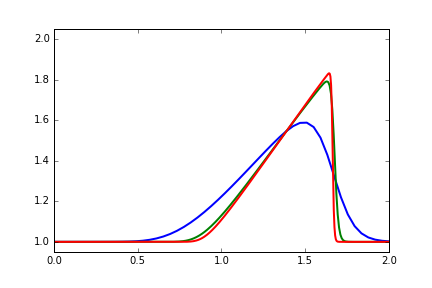
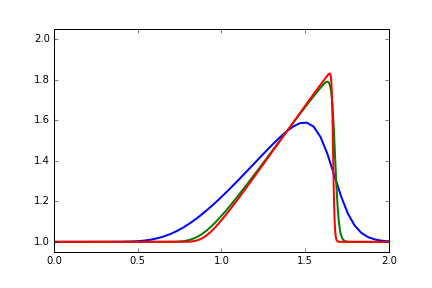
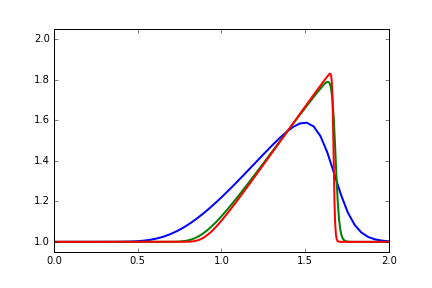
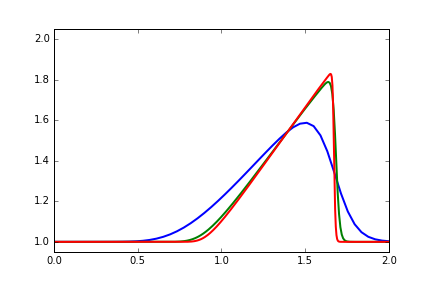
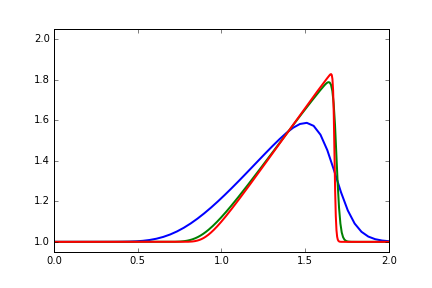
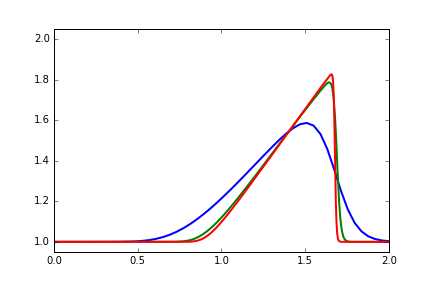
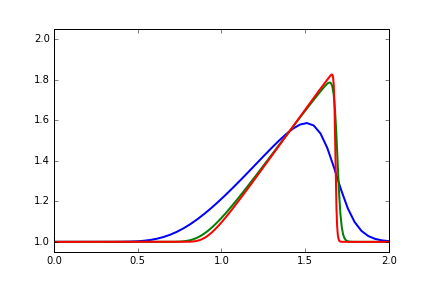
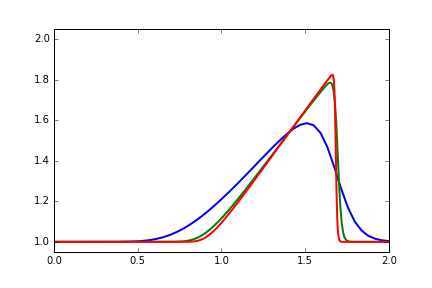
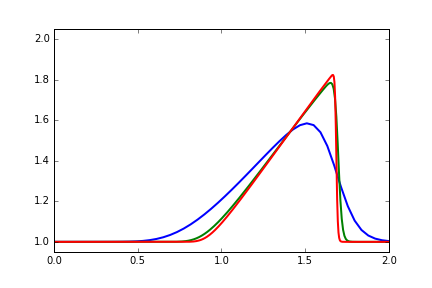
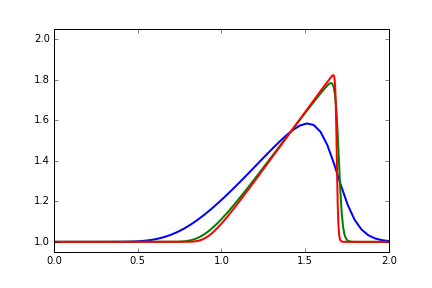
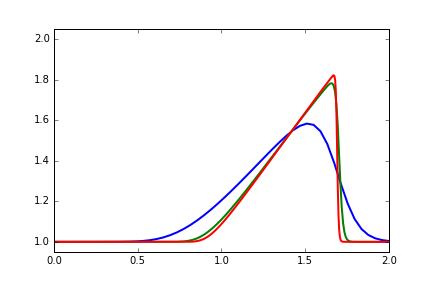
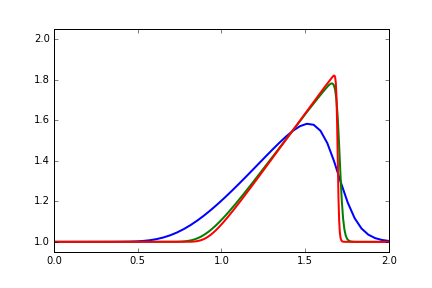
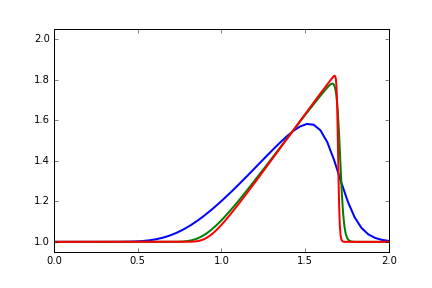
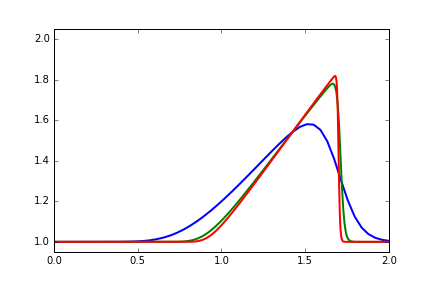
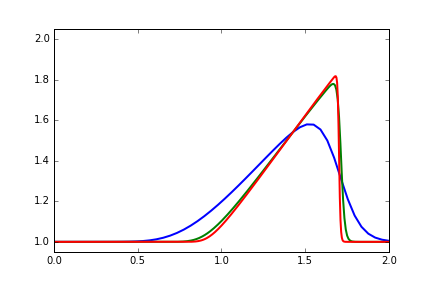
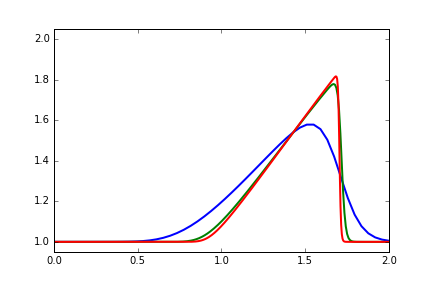
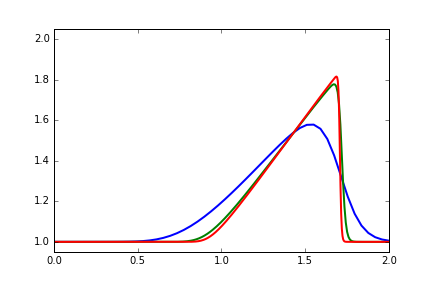
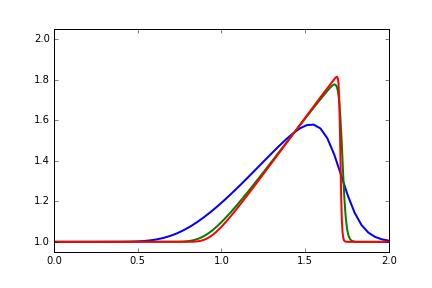
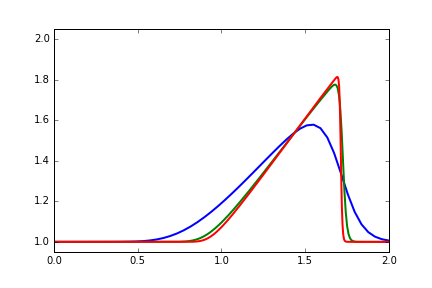
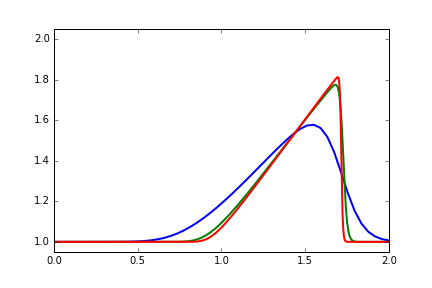
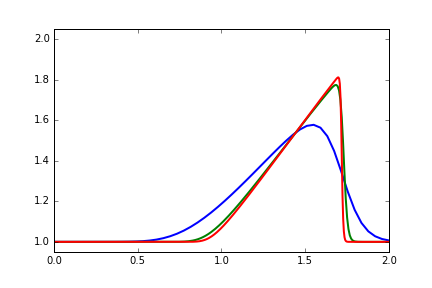
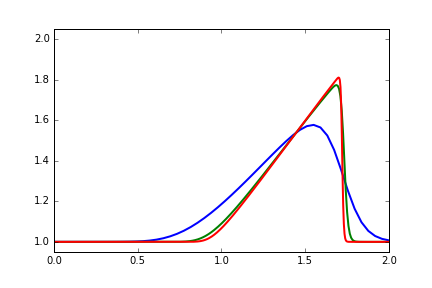
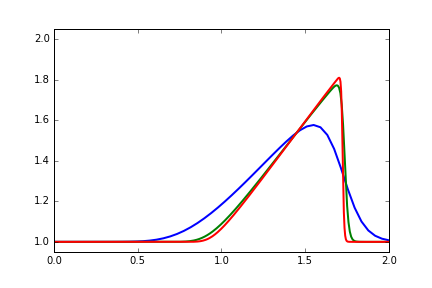
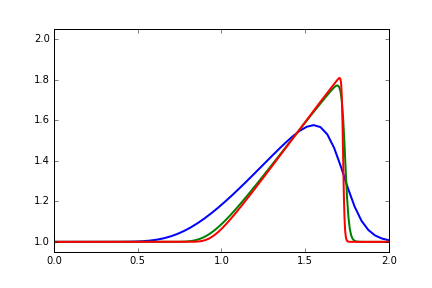
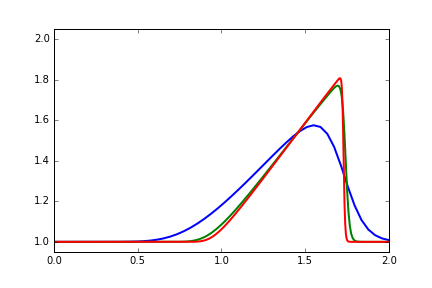
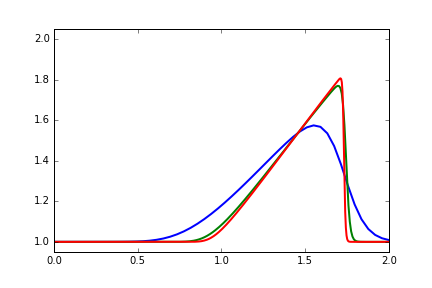
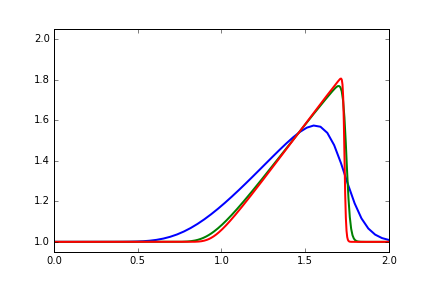
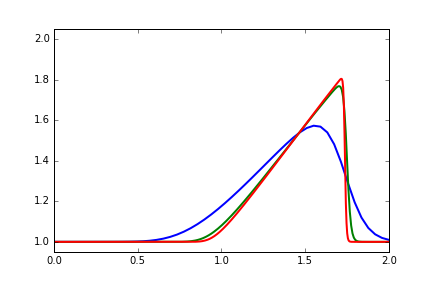
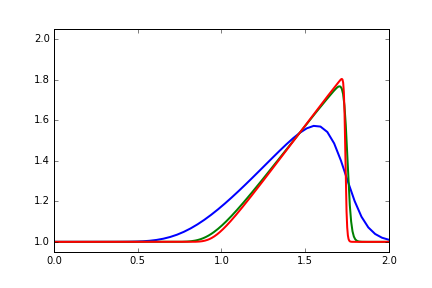
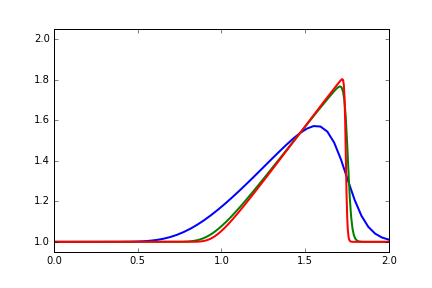
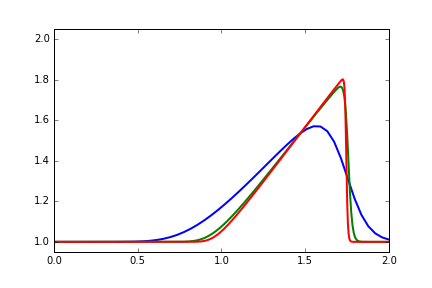
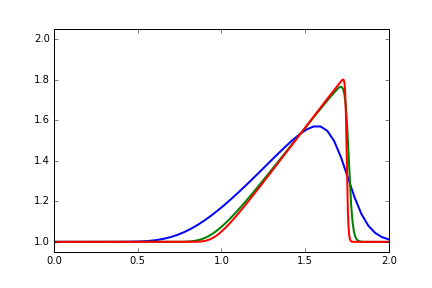
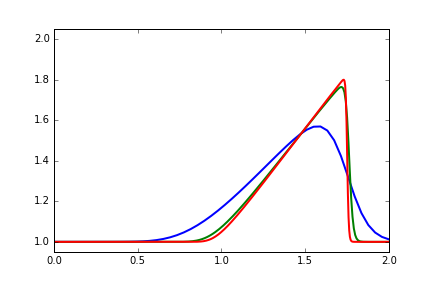
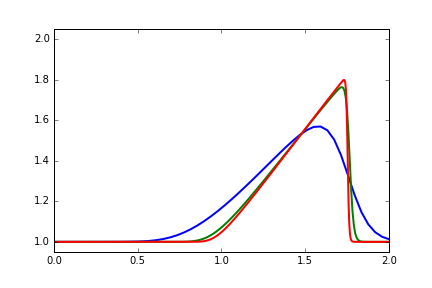
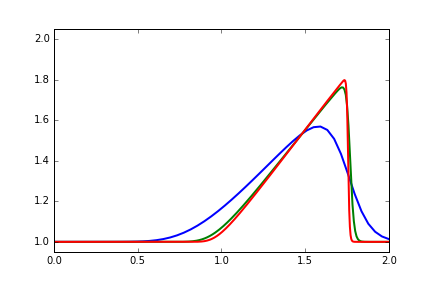
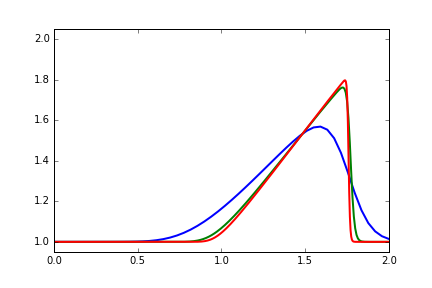
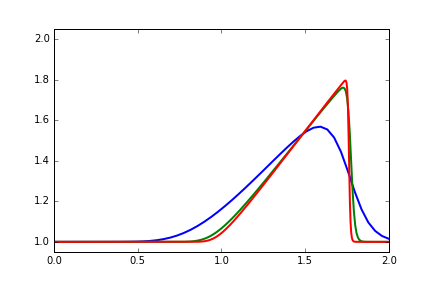
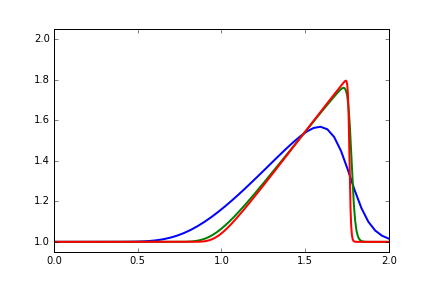
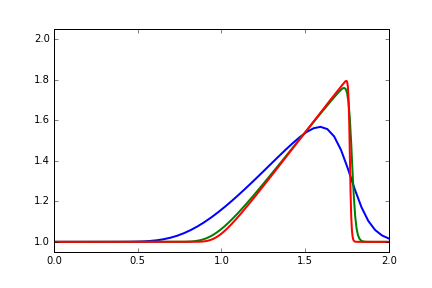
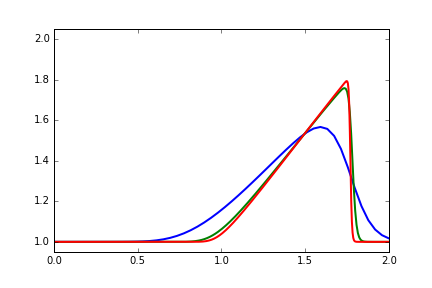
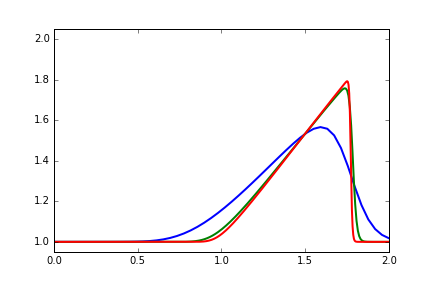
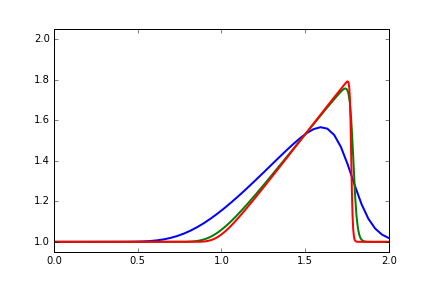
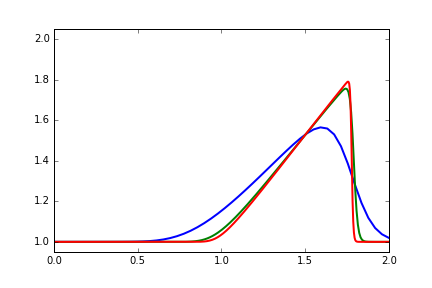
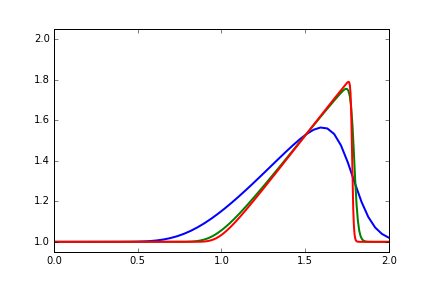
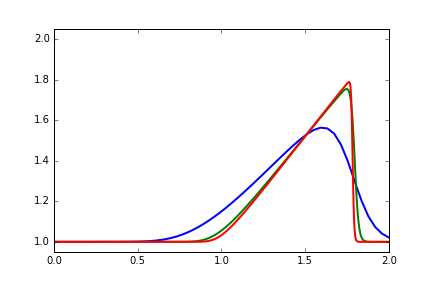
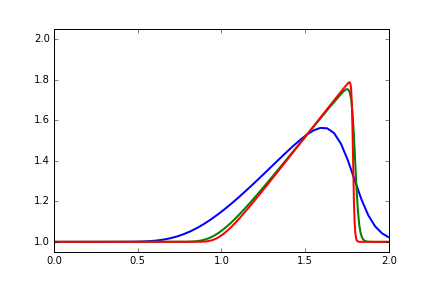
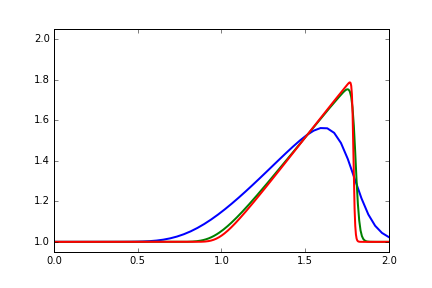
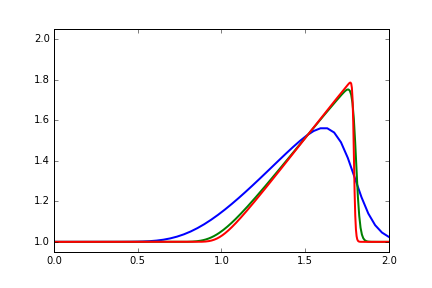
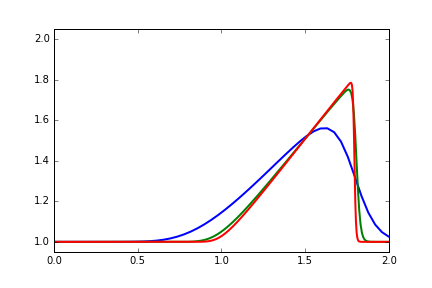
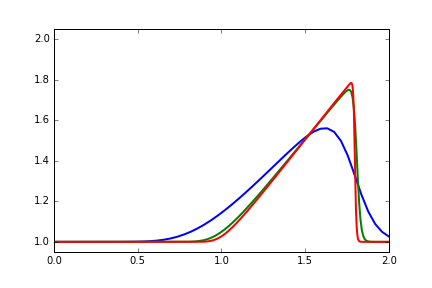
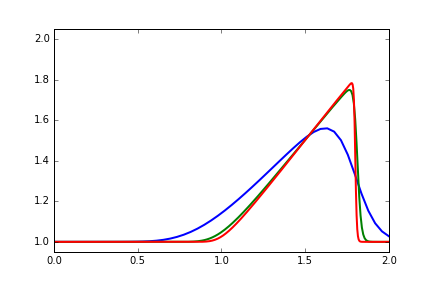
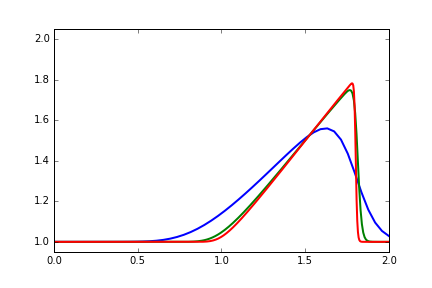
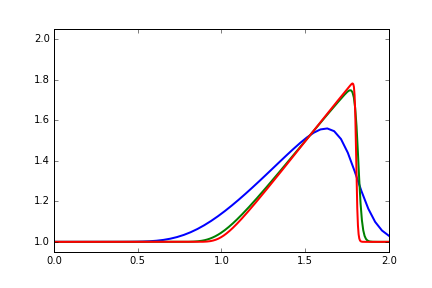
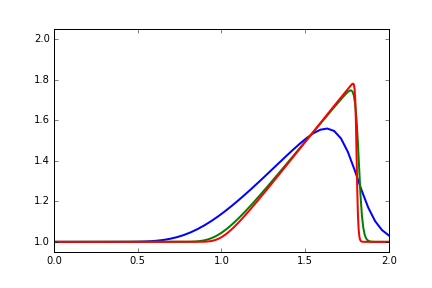
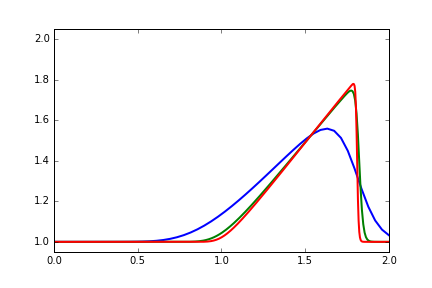
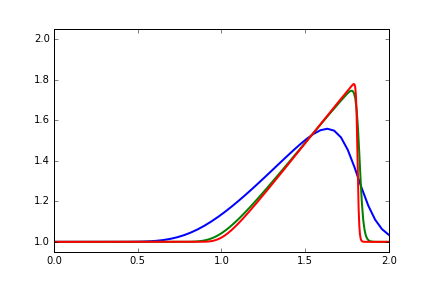
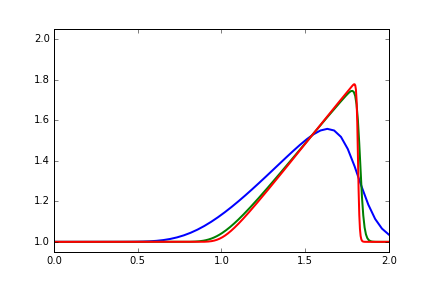
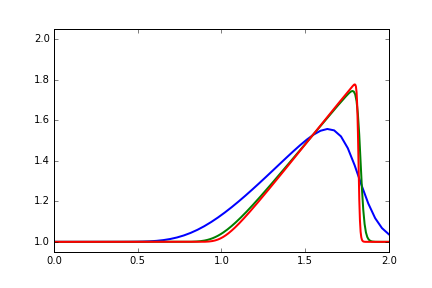
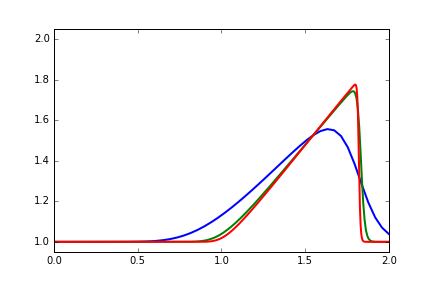
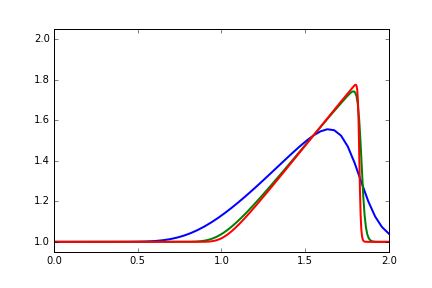
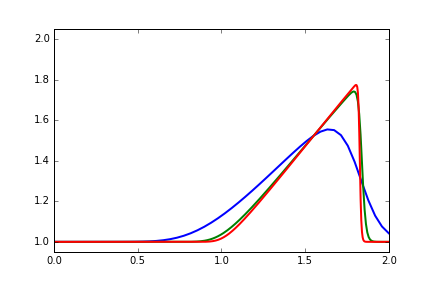
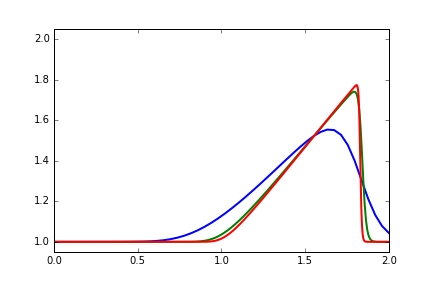
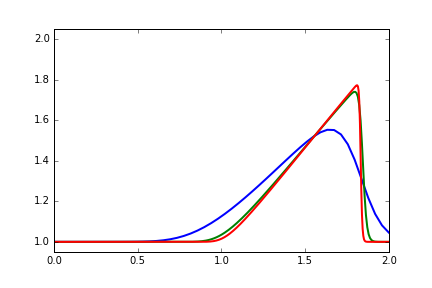
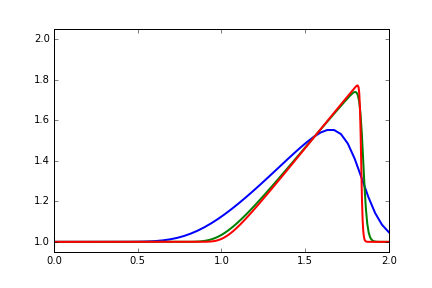
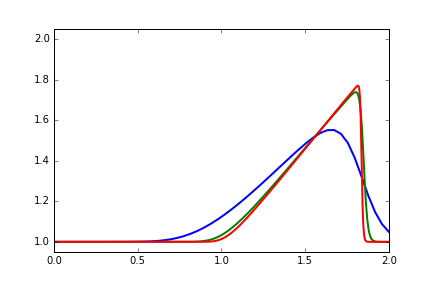
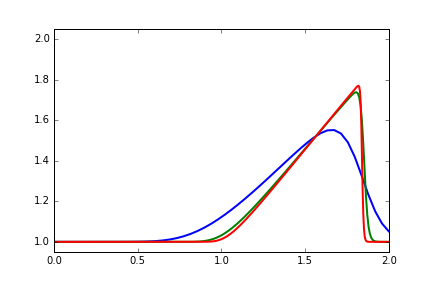
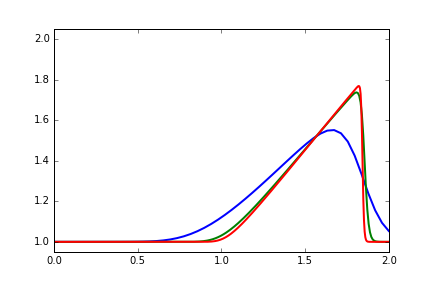
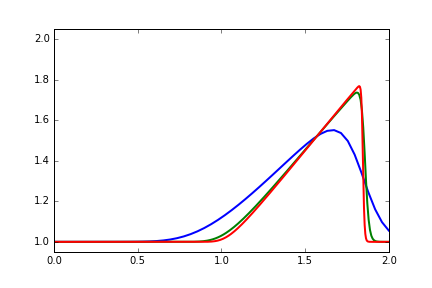
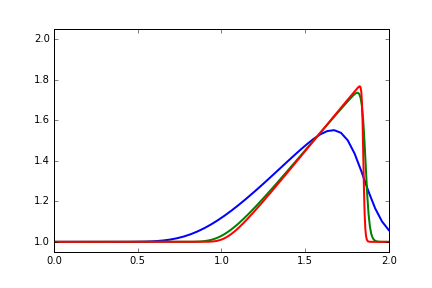
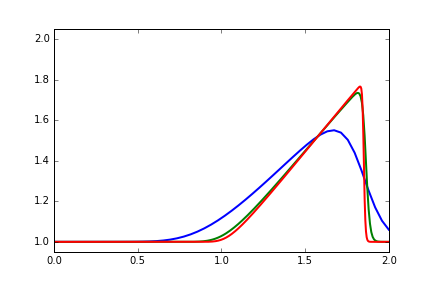
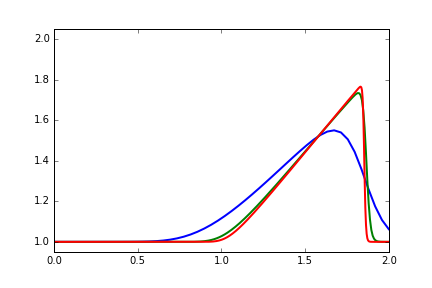
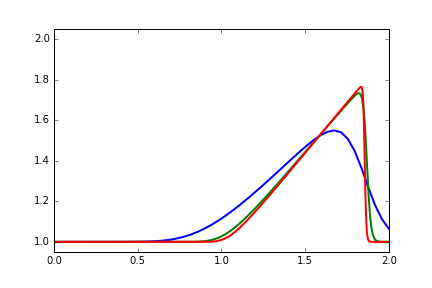
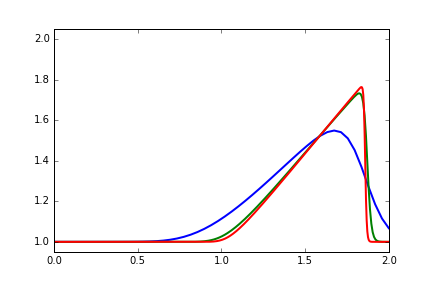
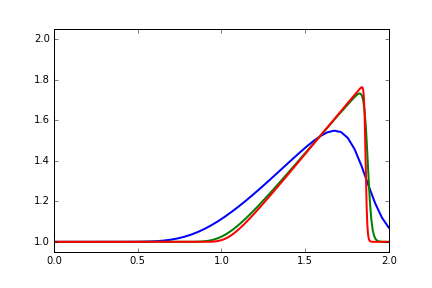
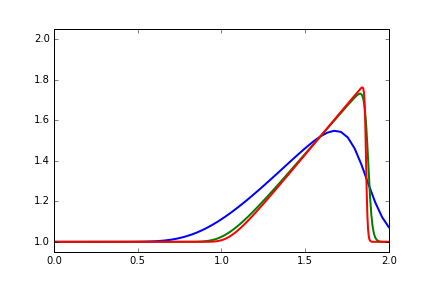
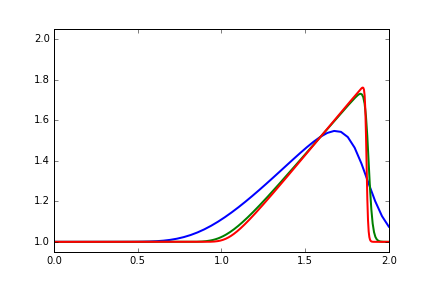
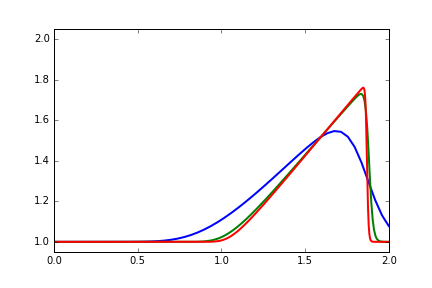
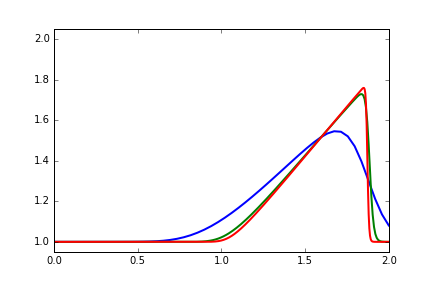
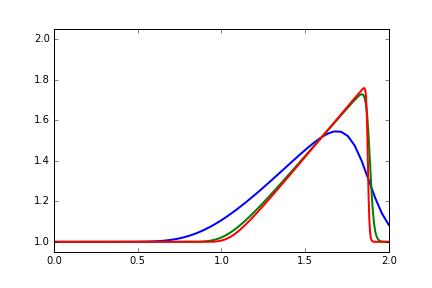
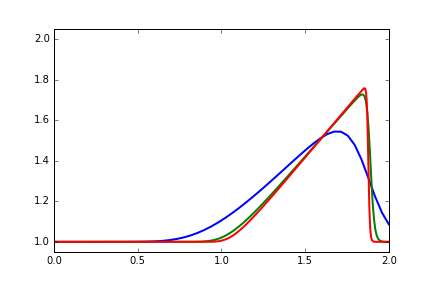
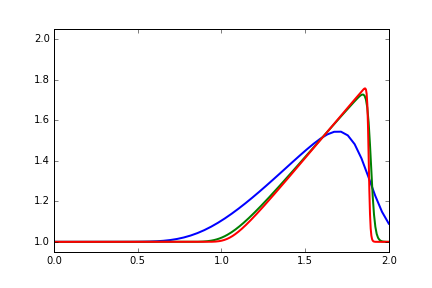
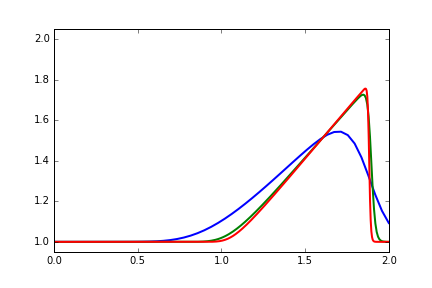
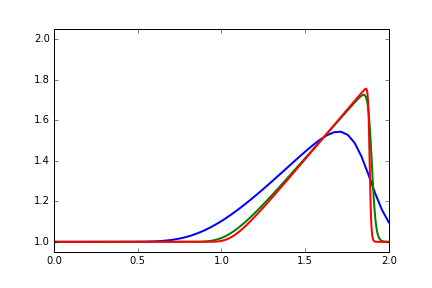
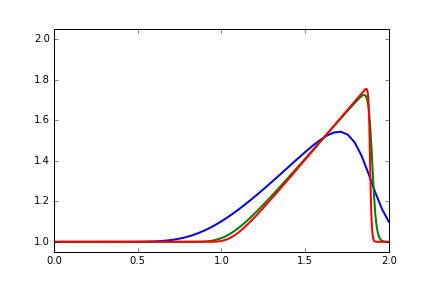

In [11]:
L = 2.          #Longitud de la malla
dt = 0.001       #Separacion temporal, Delta t
Nx1 = 50
Nx2 = 250
Nx3 = 500

#Condicion inicial primer grafico
dx1 = L/(Nx1-1.)
u01 = ones(Nx1)
u01[int(.1/dx1) : int(0.5/dx1+1.)] = 2

#Condicion inicial segundo grafico
dx2 = L/(Nx2-1.)
u02 = ones(Nx2)
u02[int(.1/dx2) : int(0.5/dx2+1.)] = 2

#Condicion inicial tercer grafico
dx3 = L/(Nx3-1.)
u03 = ones(Nx3)
u03[int(.1/dx3) : int(0.5/dx3+1.)] = 2

u1_sol = avance_en_tiempo(u01, 1000, Nx1, dt, dx1, True)
u2_sol = avance_en_tiempo(u02, 1000, Nx2, dt, dx2, True)
u3_sol = avance_en_tiempo(u03, 1000, Nx3, dt, dx3, True)

# Se define el ambiente en el que queremos hacer la animación
fig = figure()
ax = axes(xlim=(0, L), ylim=(0.95, 2.05))
linea1, = ax.plot([], [], lw=2)
linea2, = ax.plot([], [], lw=2)
linea3, = ax.plot([], [], lw=2)

T = 250 # periodo para generar T cuadros

# Funcion para inicializar cada cuadro de la animacion
def init():
    linea1.set_data([], [])
    linea2.set_data([], [])
    linea3.set_data([], [])
    return linea1,linea2, linea3

# Esta funcion se llama de manera secuencial para cada elemento i.
def animate(i):
    x1 = linspace(0, L, Nx1)
    x2 = linspace(0, L, Nx2)
    x3 = linspace(0, L, Nx3)
    
    y1 = u1_sol[2*i]
    y2 = u2_sol[2*i]
    y3 = u3_sol[2*i]
    
    linea1.set_data(x1, y1),linea2.set_data(x2, y2),linea3.set_data(x3, y3),
    return linea1,linea2,linea3,

# Se llama a la animacion.  blit=True es para que solo se dibije las partes de la imagen que tienen cambios.
animation.FuncAnimation(fig, animate, init_func=init, frames=2*T, interval=20, blit=True)

/Users/diego/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: overflow encountered in double_scalars
/Users/diego/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


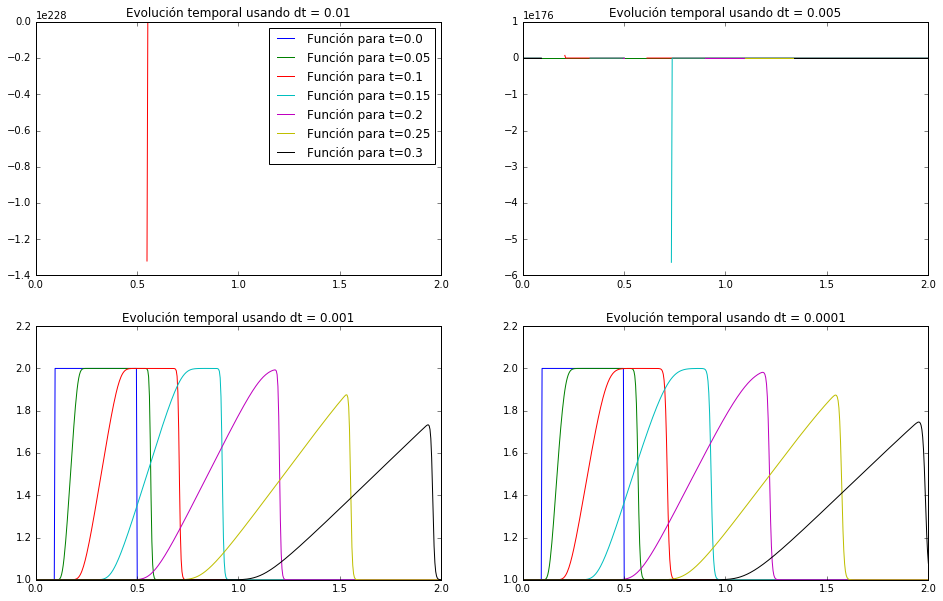

In [10]:
L = 2.          #Longitud de la malla
Nx = 500
dt1 = 0.01       #Separacion temporal, Delta t
dt2 = 0.005      #Separacion temporal, Delta t
dt3 = 0.001      #Separacion temporal, Delta t
dt4 = 0.0001      #Separacion temporal, Delta t

f, ((ax, bx), (cx, ex)) = subplots(2, 2, figsize=(16, 10))

#Condicion inicial primer grafico
dx = L/(Nx-1.)
u0 = ones(Nx)
u0[int(.1/dx) : int(0.5/dx+1.)] = 2

for nt in range(0, 35, 5): 
    ax.plot(linspace(0, L, Nx), avance_en_tiempo(u0, nt, Nx, dt1, dx),label=u'Función para t='+str(nt*dt1))

    
#Condicion inicial segundo grafico
dx = L/(Nx-1.)
u0 = ones(Nx)
u0[int(.1/dx) : int(0.5/dx+1.)] = 2

for nt in range(0, int(35*dt1/dt2), int(5*dt1/dt2)): 
    bx.plot(linspace(0, L, Nx), avance_en_tiempo(u0, nt, Nx, dt2, dx),label=u'Función para t='+str(nt*dt2))
    
    
#Condicion inicial tercer grafico
dx = L/(Nx-1.)
u0 = ones(Nx)
u0[int(.1/dx) : int(0.5/dx+1.)] = 2

for nt in range(0, int(35*dt1/dt3), int(5*dt1/dt3)): 
    cx.plot(linspace(0, L, Nx), avance_en_tiempo(u0, nt, Nx, dt3, dx),label=u'Función para t='+str(nt*dt3))

    
#Condicion inicial cuarto grafico
dx = L/(Nx-1.)
u0 = ones(Nx)
u0[int(.1/dx) : int(0.5/dx+1.)] = 2

for nt in range(0, int(35*dt1/dt4), int(5*dt1/dt4)): 
    ex.plot(linspace(0, L, Nx), avance_en_tiempo(u0, nt, Nx, dt4, dx),label=u'Función para t='+str(nt*dt4))

ax.set_title(u"Evolución temporal usando dt = "+str(dt1))
bx.set_title(u"Evolución temporal usando dt = "+str(dt2))
cx.set_title(u"Evolución temporal usando dt = "+str(dt3))
ex.set_title(u"Evolución temporal usando dt = "+str(dt4))
ax.legend()

Notemos que en el caso se la convección no lineal la solución pierde su forma original como la amplitud original.

Si resolvemos la ecuación de Burgers invísida, proponiendo $u(x,t)=X(x)T(t)$.

Sustituyendo en la ecuación diferencial, y denotando las derivadas de $X$ y $T$ por primas,$'$, obtenemos

$$X(x)T'(t) + X(x)T(t)\left(X'(x)T(t)\right)=0$$
De donde se separamos variables obtenemos:

$$\frac{T'(t)}{T^2(t)} = - X'(x) = - \lambda$$

Donde $\lambda$ es una constante arbitraria.

Resolviendo para $X(x)$ obtenemos que $X(x)=\lambda x + c$ con c una constante de integración.

Para la ecuación temporal tenemos que resolver la siguiente ecuación diferencial ordinaria

$$-\frac{T'(t)}{T^2(t)} = \lambda $$

Por integración directa tenemos que $T(t) = \frac{1}{\lambda t +e}$ donde e es una constante de integración.

Por lo tanto las soluciones de la ecuación de Burgers invísidas son de la forma
$$u_{\lambda, c, e}(x,t) = \frac{\lambda x + c}{\lambda t + e}$$